<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 2 : Modèle de Drude</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Introduction # 
Cette deuxième partie du travail implémente une simulation 2D du modèle de Drude pour décrire le mouvement des électrons libres et indépendants dans les métaux. Des sphères dures sont encore utilisées pour représenter les particules, mais maintenant de deux types différents afin de différencier les coeurs ioniques immobiles des électrons sur leurs trajectoires balistiques. Les collisions entre les deux doivent donc être inélastiques. Les questions sur cette simulation, d'abord de cinétique puis de dynamique des électrons en présence d'une force externe appliquée au cristal, vérifieront quelques résultats analytiques du modèle de Drude obtenus en classe et/ou dans le manuel de cours Ashcroft/Mermin.

- **La remise du présent _Jupyter Notebook_ ET celui de la 1<sup>re</sup> partie, ainsi que tout autre fichier de code produit, se fait sur Gradescope en n'oubliant pas d'y indiquer tous les membres de votre équipe.**

# 2<sup>e</sup> partie - Modèle de Drude #

Faites une copie du script `TDS-2Dsimulation_HXX.py` et modifiez-le pour obtenir une simulation cinétique d'un gaz d'électrons libres dans la matière cristalline selon le modèle de Drude. Spécifiquement selon les pp.4-6 du manuel Ashcroft/Mermin,
1. ajoutez un deuxième type de sphères fixes réparties périodiquement dans la boîte d'animation: celles-ci représenteront les coeurs ioniques,
2. éliminez les collisions entre les sphères mobiles qui représentent maintenant les électrons de conduction indépendants et libres,
3. en faisant appel à la température du gaz, ajoutez des collisions inélastiques entre les électrons libres et les coeurs ioniques fixes. La quantité de mouvement $\vec{p}$ n'est alors PAS conservée et il faut appliquer les hypothèses spécifiques du modèle de Drude à la sortie de chaque collision, notamment: 
- la direction de $\vec{p}$ doit être aléatoire,
- la norme $||\vec{p}||$ est déterminée par la distribution de Maxwell-Boltzmann.

### Votre simulation ###

VII. _(25 points)_ &mdash; Écrivez un appel de votre nouveau script pour l'exécuter avec la cellule suivante:

In [1]:
#

### Question statistique ###

VIII. _(5 points)_ &mdash; Vérifiez numériquement et graphiquement que l'amortissement de la quantité de mouvement moyenne des électrons suit l'équation exponentielle dérivée analytiquement en classe, soit $\langle p(t)\rangle =\langle p(t_0)\rangle \,e^{-t/\tau}$, et comparez-y le comportement d'un seul électron.

In [2]:
#

### Dynamique sous l'effet d'une force externe ###

IX. _(10 points)_ &mdash; Pour passer de la cinétique à la dynamique des électrons libres, modifiez votre code de simulation en ajoutant une fonction qui applique un champ électrique uniforme. Celui-ci devra être de module ajustable et perpendiculaire à deux des côtés de la boîte. À chaque pas de temps $\mathrm{d}t$ sans collision, les électrons devront donc accélérer d'un incrément $\mathrm{d}p_x$ dicté par la force de Coulomb à leur position.

Copiez le code de votre fonction dans la cellule qui suit en n'oubliant pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [3]:
"""...""" ligne 33 fichier: TDS-2Dsimulation_H24_Part2_IX_&_X
# Composantes du champ uniforme (respecté pas plus haut que 1e-4 sinon parfois il y a des sorties du cadre)
dpx = 1e-4
dpy = 1e-4
"""...""" ligne 115
    #### DÉPLACE TOUTES LES SPHÈRES D'UN PAS SPATIAL deltax
    vitesse = []   # vitesse instantanée de chaque sphère
    deltax = []  # pas de position de chaque sphère correspondant à l'incrément de temps dt
    for i in range(Natoms):
        vitesse.append(p[i]/mass)   # par définition de la quantité de nouvement pour chaque sphère
        # Ajout du champ E uniforme de module ajustable
        champ_E_uniforme = vector(dpx,dpy,0)
        deltax.append(vitesse[i] * dt + champ_E_uniforme) # différence avant pour calculer l'incrément de position
        Atoms[i].pos = apos[i] = apos[i] + deltax[i]  # nouvelle position de l'atome après l'incrément de temps dt
    #### CONSERVE LA QUANTITÉ DE MOUVEMENT AUX COLLISIONS AVEC LES PAROIS DE LA BOÎTE ####
"""..."""

SyntaxError: invalid decimal literal (2851897037.py, line 1)

### Question statistique ###

X. _(5 points)_ &mdash; Pour quelques différents modules de champ électrique, présentez graphiquement l'évolution de la position moyenne des électrons en fonction du temps pour ses deux composantes parallèle et perpendiculaire au champ.

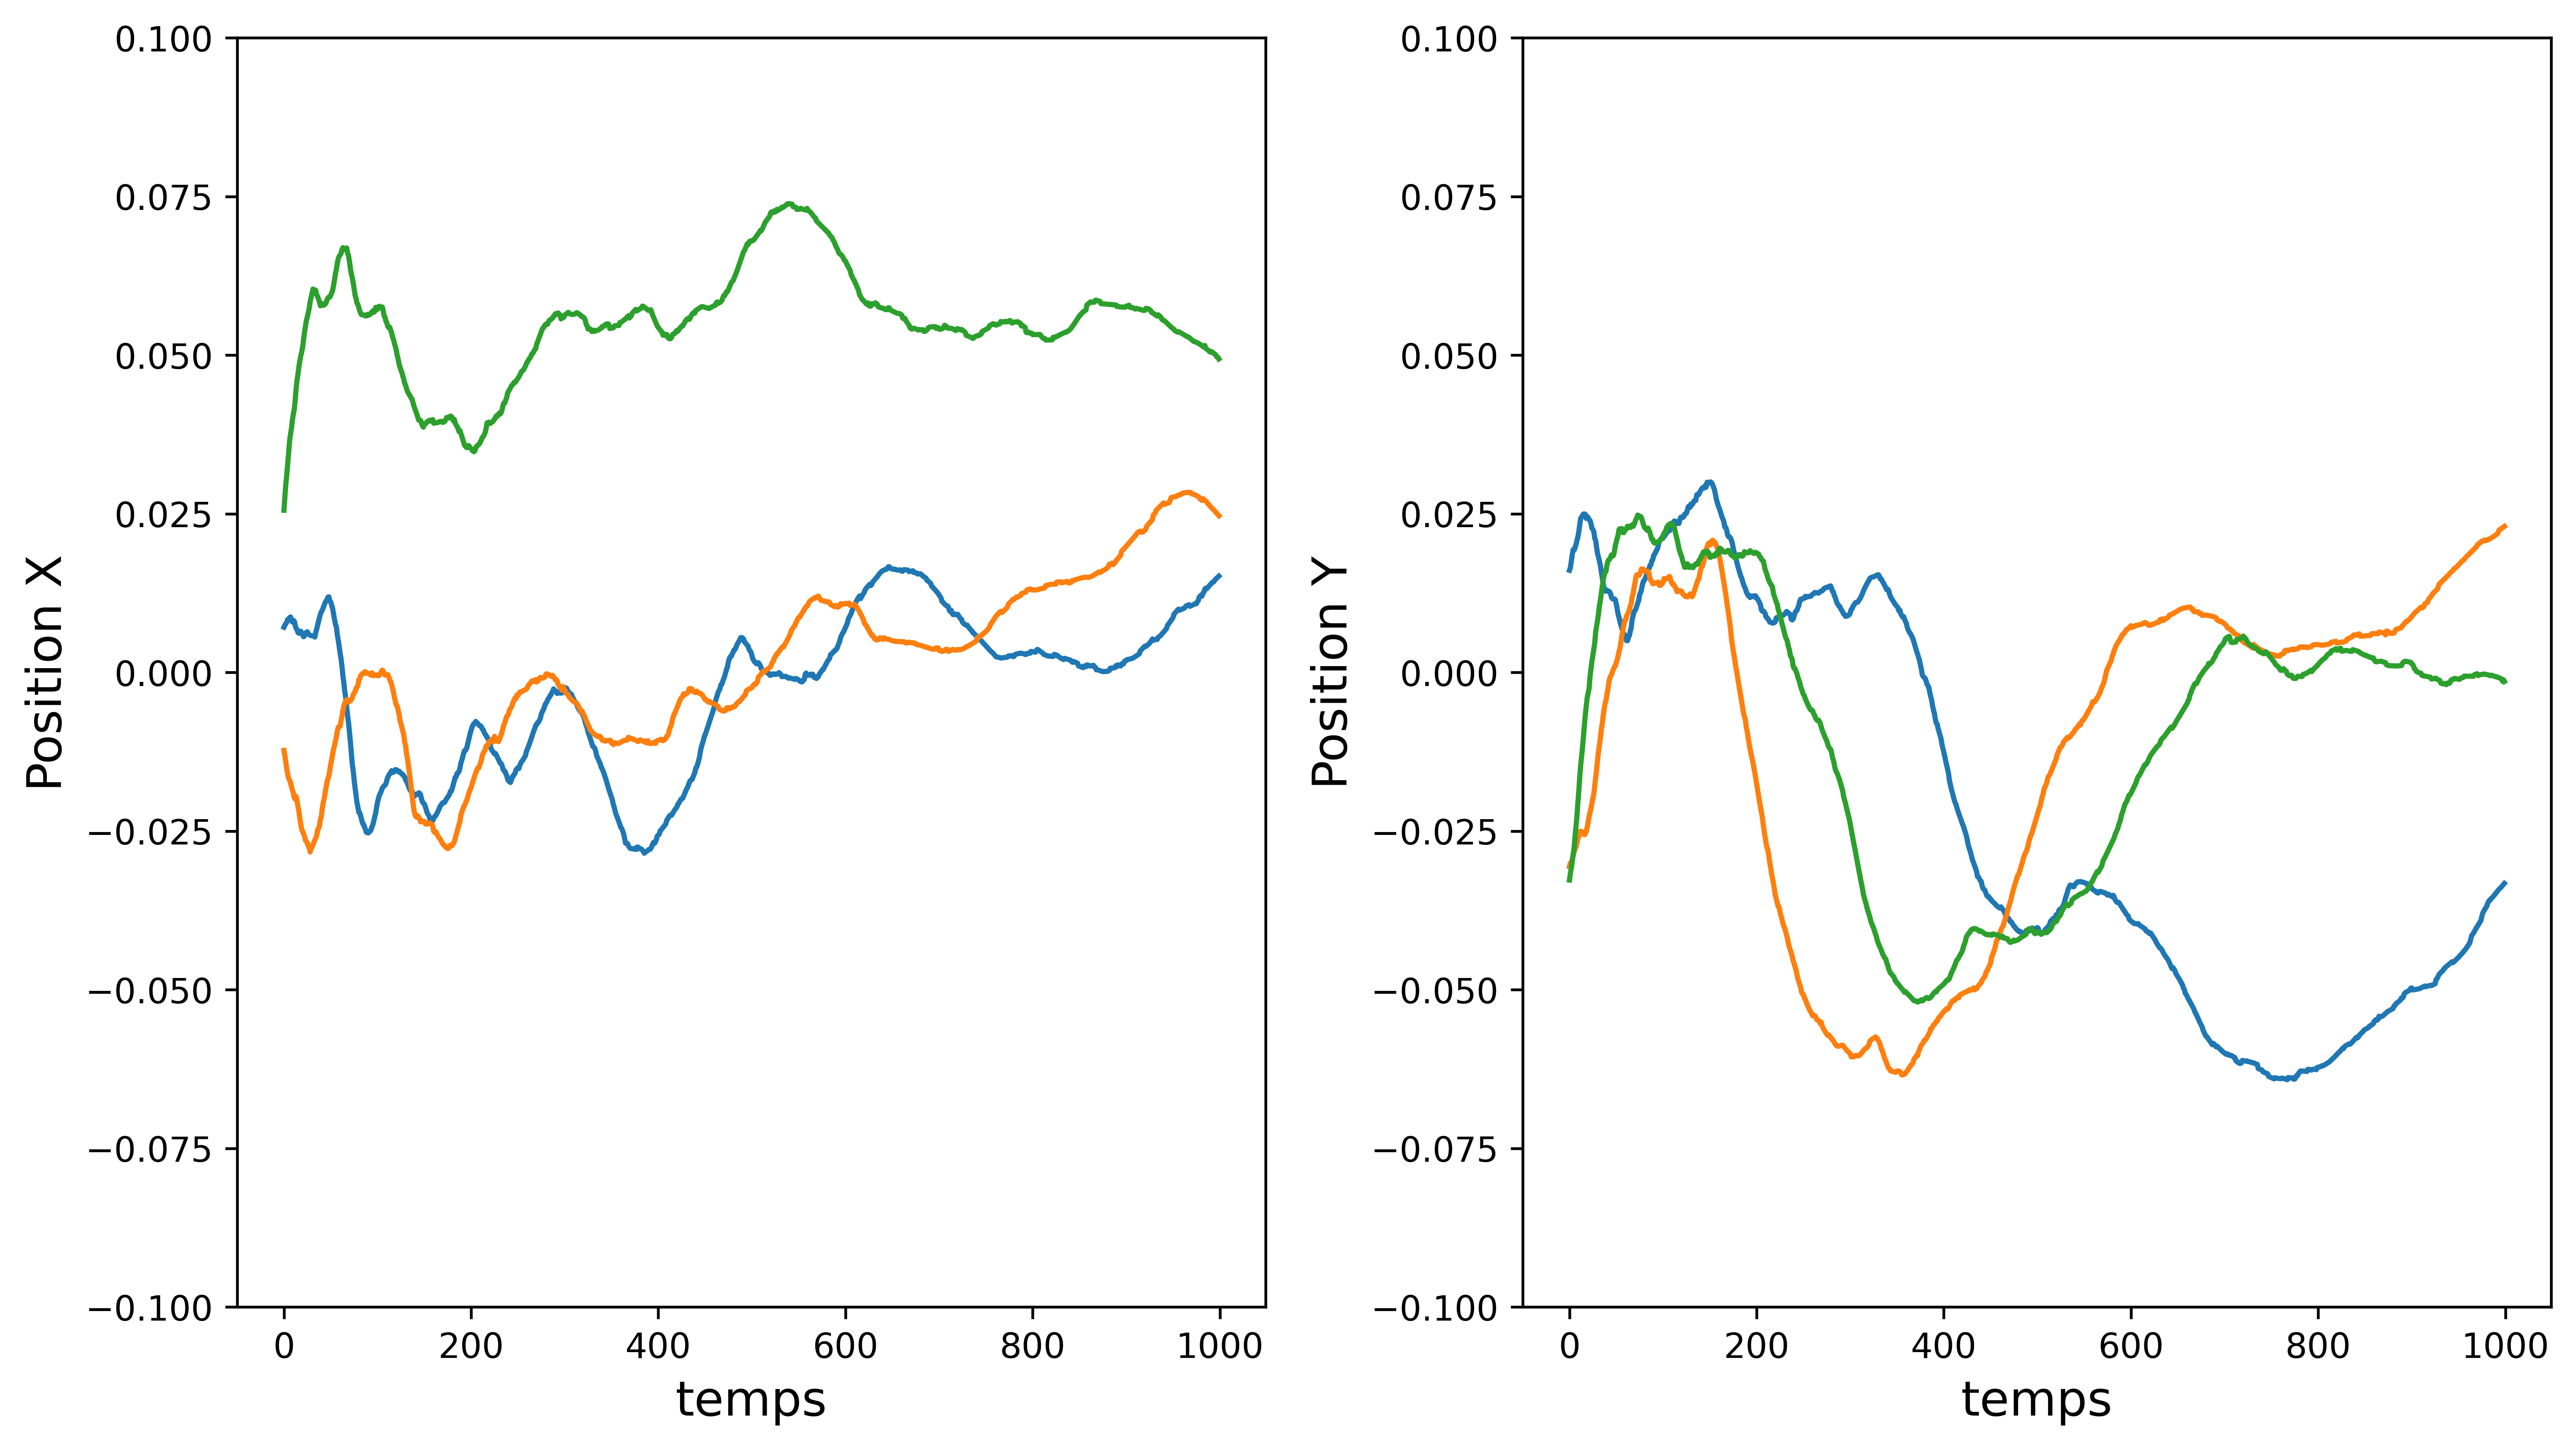

In [23]:
import numpy as np
import matplotlib.pyplot as plt

meanPos1e4 = [(0.007133913301867792, 0.016103562551635708), (0.007445170532102754, 0.016524708315546834), (0.007692538420859775, 0.017574350308792355), (0.00790903720380056, 0.018581937998113238), (0.008359794187242997, 0.019370060376423224), (0.008295519961653538, 0.01927112924519533), (0.008628734754619007, 0.019658747792066073), (0.008749778974302071, 0.02018612877125861), (0.008365259005236018, 0.02080552030614186), (0.00794168875779073, 0.021363980061850186), (0.008203465324676603, 0.022195074928495703), (0.008094861256799202, 0.023302614666328943), (0.007459886332183415, 0.02429512932333212), (0.006948777158108792, 0.024511110427378396), (0.006748845805792872, 0.0247531838862391), (0.006275405698194709, 0.024968621823531684), (0.006179733956093755, 0.024982431473562383), (0.006349430370060896, 0.02490337343160296), (0.006501407841657395, 0.02426895559616722), (0.006099982878331016, 0.024572474970937033), (0.005931427582526506, 0.024371030624839963), (0.005625573443064684, 0.024088219777851333), (0.005772460883004017, 0.023944003734482834), (0.0062446271853679345, 0.023449459618055828), (0.006210961569233605, 0.022723174141888517), (0.006420065088820443, 0.022555278185570255), (0.0060876952245175146, 0.022193227903225393), (0.00596784043973544, 0.02117804269476912), (0.0058662777273751875, 0.02075899541882466), (0.005798423317548579, 0.01968801798050906), (0.005780335926311913, 0.018716568776316143), (0.00576620416368463, 0.0181949912668031), (0.0057919468586000635, 0.017536876680280745), (0.005574519296447173, 0.016887145503018203), (0.006343376564126298, 0.01588229494068947), (0.00682820681551012, 0.014988456072075764), (0.00747950588346882, 0.013982582649047882), (0.008063678463072021, 0.013294985278724948), (0.00868342804244499, 0.01284075485599062), (0.009193234507371972, 0.01280697133291821), (0.00957988551472406, 0.01297668856355034), (0.009835372494175904, 0.01280055359233012), (0.01021988891232136, 0.012801666822097277), (0.010604405330466818, 0.012676863089481665), (0.011029004679132773, 0.012375922993768438), (0.011273668612452204, 0.011782749187582485), (0.011449969162583666, 0.011610341800542079), (0.011859831523758427, 0.011602437181010448), (0.011915384713177908, 0.011594536445235584), (0.011267815412887225, 0.011446506246066112), (0.01109793345170513, 0.010796494329440689), (0.010588959428440396, 0.010031358381240292), (0.01008950346977322, 0.0091754646695148), (0.0092478068642498, 0.008632387904800582), (0.008360015417623136, 0.00794623089481996), (0.007606144439029955, 0.007455887323788442), (0.00721172595922817, 0.006987098460465737), (0.005950258861440425, 0.006473846364991741), (0.005092963533910159, 0.006013776885649504), (0.004114424580447665, 0.005937489128150207), (0.0030417692746913844, 0.0053976105263508255), (0.002161724178803069, 0.005010544350919189), (0.0009626725237480975, 0.005003472059119017), (-0.0005642680827385073, 0.005557358985259036), (-0.0016590052216461754, 0.005839577113914033), (-0.003034004819770123, 0.006506492683117724), (-0.003939031468732845, 0.007088993776797166), (-0.005385680732968483, 0.00838237938150971), (-0.006803270425707815, 0.008925850727530014), (-0.007931746322231637, 0.00955602989716023), (-0.009399836583209566, 0.009725756771607886), (-0.01095003636963925, 0.010049824495044192), (-0.012690735686700419, 0.010499757598145618), (-0.014444643958168859, 0.01094976573091913), (-0.015467367130830613, 0.011361385020159763), (-0.01693649539308623, 0.012292446614360297), (-0.018194878092220045, 0.012569944567921649), (-0.01930636816043278, 0.013115451978875224), (-0.020493157388044355, 0.013887571771603682), (-0.02120498531667067, 0.014365513718380867), (-0.02202914475802777, 0.014544739695021585), (-0.02212753270655314, 0.014801026478784753), (-0.022625293601912455, 0.015278466039600267), (-0.023200333882243983, 0.01571153471088282), (-0.023775374162575504, 0.01614460338216537), (-0.023907034290074347, 0.016341015066438872), (-0.024330535635370975, 0.016845790255860648), (-0.024681782792911108, 0.016957423963456612), (-0.02518714357957676, 0.01761007086725654), (-0.025189499054099042, 0.01776097463838807), (-0.025297374109227753, 0.0184578302424382), (-0.025173791321831084, 0.018624685192501152), (-0.02500700053723378, 0.018956460131552645), (-0.024801857737483574, 0.01924622771316396), (-0.024341468242027348, 0.019480546501989545), (-0.023991008471553683, 0.020045284546175268), (-0.02338455856399838, 0.02070481385995695), (-0.0227359847231687, 0.020857302520161224), (-0.0221918446470619, 0.021111032081612406), (-0.021220757955534245, 0.021062887135006224), (-0.020437169553655585, 0.02118826497381883), (-0.019812350682932973, 0.021393284224243324), (-0.01933448677886096, 0.021604014306522593), (-0.019030044714324665, 0.02181474438880188), (-0.01872560264978837, 0.022025474471081153), (-0.018227010915048285, 0.02235817454187405), (-0.018033561640662926, 0.022358483709758827), (-0.01788539858253905, 0.022337900419465595), (-0.01776268801696042, 0.022681041940946313), (-0.017537928158780206, 0.023026411791906957), (-0.016931637448609274, 0.02341688149196797), (-0.01651572322229466, 0.02365157494287982), (-0.016180989823391504, 0.0238746346956065), (-0.015949991237549928, 0.023745545159837782), (-0.01589260477098667, 0.02378773080585902), (-0.015481322723861489, 0.023497560071123087), (-0.015674074928407822, 0.023491860324290303), (-0.01572960914756055, 0.02348616057745752), (-0.015551138246950402, 0.024101672672000543), (-0.015312861453476857, 0.024471492822268306), (-0.015329302669000455, 0.024449891738163667), (-0.015425073005928968, 0.024409522639227924), (-0.01564205113734228, 0.02454671797592619), (-0.015555937689457889, 0.024936023441109203), (-0.01573023846134675, 0.02497578304021921), (-0.01582909761699272, 0.02510099516850596), (-0.016031104914082644, 0.025572401809053368), (-0.016056696818204416, 0.026113107845657083), (-0.016306110884772993, 0.02625841702792756), (-0.01649641609024812, 0.02602778115233246), (-0.01692162536620591, 0.026564446316502014), (-0.017181552292741195, 0.026428841575617437), (-0.017473506416214254, 0.026669674949290532), (-0.01787085001548878, 0.027030789855509708), (-0.018315042457395334, 0.027041976131305875), (-0.018582456390440136, 0.027111778447339988), (-0.018697231714012216, 0.027973975477395593), (-0.018732474136751547, 0.028104423325454285), (-0.019372960121488533, 0.02802166476499803), (-0.019548441426898502, 0.028288409146676227), (-0.01921265284863352, 0.02865945252939956), (-0.019192699420822582, 0.028854040734125688), (-0.01925761392549968, 0.029078490893641278), (-0.01915221944533921, 0.02915468323214251), (-0.018961395814860567, 0.02905268595373568), (-0.01903811544575724, 0.02944472292981084), (-0.019277364655487267, 0.029199677947470616), (-0.019952066769886333, 0.02996588948805837), (-0.020399481395883122, 0.029852226398214755), (-0.020607057951991595, 0.02984946025845541), (-0.020728088881397246, 0.03002361965306119), (-0.021096947939393606, 0.03000525230794931), (-0.021595416034291746, 0.02986108444820711), (-0.022126214887237677, 0.02956140578195431), (-0.02236787819044924, 0.029164020934991434), (-0.022609541493660804, 0.02876663608802855), (-0.023110660665000157, 0.02804322511535939), (-0.02332069382987283, 0.027252357018262056), (-0.023349904253328745, 0.02675771058945025), (-0.023379114676784666, 0.026263064160638457), (-0.022952966413681598, 0.025880176049746552), (-0.022689069424561698, 0.02548398292752068), (-0.022605939813043718, 0.024988779223977565), (-0.022355022610861693, 0.024475150985620395), (-0.022055008007595123, 0.024167492606001387), (-0.021754019623805642, 0.023701521864576233), (-0.021407683307460214, 0.02292469891054406), (-0.021047704791904303, 0.022848009543363378), (-0.020869661986711696, 0.022422067183188905), (-0.02061766603586899, 0.021674493900849), (-0.02049829261156977, 0.021397699398975494), (-0.02052971690938876, 0.02138074790357274), (-0.020423998679575544, 0.021213546872025608), (-0.020040600371997338, 0.020822393032342103), (-0.01989235877066646, 0.020364520177623073), (-0.019619224084794402, 0.019582436917613546), (-0.019433730817504685, 0.01890043472009203), (-0.01913998198128448, 0.018238730436746814), (-0.018700976506873822, 0.01794217734000693), (-0.018677324805502785, 0.01725553089074548), (-0.018175299898458543, 0.01669812379505768), (-0.017623892154275414, 0.01619269392007368), (-0.017072484410092296, 0.015687264045089685), (-0.016521076665909174, 0.015181834170105686), (-0.016410998247855507, 0.014889307080673047), (-0.015897548649683405, 0.014348730767187269), (-0.01584302853292181, 0.01386258652921718), (-0.01560396301770282, 0.013519675198249566), (-0.01509994442468179, 0.013216061843798373), (-0.014310487962286582, 0.012644576194609024), (-0.013842556650115596, 0.012395628631466702), (-0.013337737034472883, 0.012105838412055328), (-0.01273853265554554, 0.012142656143726378), (-0.01230169121433299, 0.011810831799192125), (-0.012275813900511245, 0.012015780102025224), (-0.012039931769555172, 0.012036345851140827), (-0.011462421233427323, 0.011974702858048403), (-0.01084302824386494, 0.01191974745535852), (-0.010226876911613593, 0.012095272919575904), (-0.009599829610764306, 0.012054595468357935), (-0.009086999408681852, 0.01167161927910196), (-0.008609489355858865, 0.011610022293916212), (-0.00830118295287079, 0.011310766128520605), (-0.008074976537033964, 0.011011509963125006), (-0.007943383130242948, 0.010712253797729398), (-0.007716688276702206, 0.009882596029809424), (-0.007899151072160368, 0.00966593646260256), (-0.008018792229199158, 0.009713835552012034), (-0.00822415295719688, 0.009522889616590778), (-0.008372204654034578, 0.009331943681169496), (-0.008397704930028999, 0.008780786273867101), (-0.008581707936236088, 0.008607261992715616), (-0.008917894000664926, 0.008487185134546365), (-0.0090626765102117, 0.008221191681724582), (-0.009450230012469679, 0.007930071292249558), (-0.009740535327118332, 0.007894768173324301), (-0.009932305707909046, 0.007891577418955105), (-0.010196841736282101, 0.007756574962936002), (-0.010461377764655153, 0.007806316768603128), (-0.010725913793028213, 0.007856058574270249), (-0.010946674090878825, 0.008016123916988489), (-0.011944091932124024, 0.008611551192871937), (-0.012183904348231373, 0.008659329557718929), (-0.012425814413093783, 0.008714397695275074), (-0.012600961923392738, 0.008835655049062892), (-0.012835421256140036, 0.008956912402850712), (-0.012766748629710898, 0.00898342120227329), (-0.013028586419302513, 0.008980360260423375), (-0.01334413586821421, 0.008980120678301366), (-0.013659685317125908, 0.00907911244830425), (-0.013975234766037594, 0.009240518741765789), (-0.014290784214949295, 0.009401925035227346), (-0.01433077765134543, 0.009613417789734357), (-0.01464412239872789, 0.009520892461775898), (-0.015194382462678246, 0.009316404654679401), (-0.015472816855535929, 0.009272247327270042), (-0.015533009098867614, 0.0090842365349836), (-0.01592075306503745, 0.008358708967935155), (-0.016258598462386725, 0.008286421582498694), (-0.01681696858341848, 0.008446220055704858), (-0.01710763080497391, 0.008892104736042966), (-0.017024834209975456, 0.009411164581061225), (-0.017339446914462372, 0.009670397529011046), (-0.016943503195999122, 0.009763549040052435), (-0.01645274613736039, 0.010163095310937278), (-0.01631910520267667, 0.010507218193510595), (-0.016057684915663763, 0.01118668417422728), (-0.015870034718824894, 0.011546108881905636), (-0.01533265695351727, 0.011483289935262016), (-0.0151713096611175, 0.011613986836553467), (-0.015009962368717728, 0.011697866665854826), (-0.015141090831345086, 0.01170937544662304), (-0.01466603861136978, 0.011998051333440124), (-0.014301676358470192, 0.011841529577562526), (-0.0140486210577202, 0.011893554625733584), (-0.013856439706427835, 0.011991896559187455), (-0.013612784055385638, 0.011980778943883452), (-0.013369128404343456, 0.011969661328579455), (-0.013125472753301252, 0.012043210599930325), (-0.012499111759889053, 0.0122174019244615), (-0.012127876294609692, 0.01232188600064319), (-0.011756640829330338, 0.01242637007682489), (-0.011376905208986812, 0.012598478688978058), (-0.01094729208507901, 0.012582566225020164), (-0.010505483852444708, 0.012572751906943562), (-0.010058929317572978, 0.012536538713952126), (-0.009612374782701242, 0.012500325520960703), (-0.009165820247829519, 0.012600333423639648), (-0.008839074579215102, 0.012755943612404716), (-0.00832361449832965, 0.012847884442169166), (-0.008202936761171904, 0.012858686347047238), (-0.007875084462406833, 0.013002474899367072), (-0.007849536838225958, 0.013226959168703156), (-0.007523432359168978, 0.01331052038414761), (-0.007204967727099653, 0.013392570420753779), (-0.006553424670441339, 0.013378698400227802), (-0.006228373504663345, 0.013456461394842946), (-0.005903322338885361, 0.01353422438945811), (-0.005578271173107363, 0.013611987384073276), (-0.0050824838245964584, 0.013640133165384295), (-0.004841545149259299, 0.013281926017487754), (-0.00461032043542579, 0.012786582490750799), (-0.004217700119403775, 0.012688890921861611), (-0.004039781730959039, 0.012100511129361611), (-0.003758652834656486, 0.011841861376091384), (-0.003568284006842739, 0.011331551368591875), (-0.0032487707982567027, 0.01088917321599483), (-0.003069827400993011, 0.010704945354478556), (-0.0025928203417108107, 0.010439596167257653), (-0.0027835637120332078, 0.010372943218625183), (-0.002922487344987734, 0.009981142292245405), (-0.0029669750070236904, 0.009794665795912202), (-0.003305455016975872, 0.009490519457729208), (-0.003148743303185758, 0.009213907446637193), (-0.003103821411673183, 0.009125326695399553), (-0.0032389888393742467, 0.008840086190361283), (-0.0032397359806521386, 0.008863352378202419), (-0.003241237173647089, 0.008916772878266426), (-0.0029010163818005497, 0.008988245883033673), (-0.0029205700930661034, 0.009093957376647916), (-0.002356017849237842, 0.009395568922276254), (-0.0024376775874306524, 0.009899123191795128), (-0.002488324419211766, 0.010032306352519076), (-0.0029135030959308666, 0.010433622613543678), (-0.002996139199655339, 0.01064550909420562), (-0.0032055286304251518, 0.010857395574867555), (-0.003414918061194969, 0.011038911845752128), (-0.0034146086872175736, 0.011066015410712308), (-0.003755200879189168, 0.011081110757672511), (-0.00406997804154342, 0.01130488293830334), (-0.004384755203897667, 0.011528655118934165), (-0.004699532366251919, 0.011752427299564983), (-0.00472785233528379, 0.012106906694083113), (-0.0050763370631215846, 0.012418538441122602), (-0.005499684911254571, 0.012794651952298569), (-0.005768353896932394, 0.013125810648333791), (-0.006037022882610222, 0.013456969344369005), (-0.00618566433731901, 0.013740081441709105), (-0.006334305792027805, 0.014023193539049204), (-0.0065640969189126, 0.014265958450120138), (-0.006885282615740137, 0.014519702398998087), (-0.007274733742289901, 0.014821629609737834), (-0.007911317869219898, 0.014935290797144578), (-0.008336404245166401, 0.014995046342926144), (-0.008761490621112906, 0.015054801888707703), (-0.00944173623629075, 0.015059276018003378), (-0.0098254578200276, 0.01513883913373987), (-0.010280545370500794, 0.01521840224947638), (-0.010735632920973985, 0.015297965365212874), (-0.011190720471447176, 0.015377528480949374), (-0.011645808021920369, 0.015411506544947535), (-0.011727408680193363, 0.015236638172798179), (-0.011917253896832777, 0.014754146090732206), (-0.01231727591139757, 0.014772517423949501), (-0.013035685455659887, 0.014479527749011843), (-0.013384264955600488, 0.014212211073946747), (-0.013732844455541095, 0.013944894398881635), (-0.014081423955481705, 0.013677577723816543), (-0.014375801515949225, 0.013329244453131061), (-0.014943562158007096, 0.013047285634551944), (-0.01517512114712332, 0.013143005590951445), (-0.015549082505293637, 0.012940065948891846), (-0.01593101809256222, 0.012364619114021353), (-0.01638293258908904, 0.011960880053164744), (-0.01683484708561586, 0.011681113991852461), (-0.017344212620785827, 0.011449009410713768), (-0.0178535781559558, 0.011216904829575073), (-0.018362943691125774, 0.010984800248436384), (-0.018787524160389965, 0.010739356709844298), (-0.01923076161893477, 0.010562500511955284), (-0.01967399907747959, 0.010385644314066262), (-0.02011723653602441, 0.010208788116177241), (-0.020859954586063777, 0.009713860133812724), (-0.021284588439457096, 0.009834739697268535), (-0.021917173065706314, 0.00925099919592677), (-0.022397782617840645, 0.00899469397545308), (-0.022800942055990106, 0.008738388754979396), (-0.023172968187560074, 0.008830586163527322), (-0.023583809083119755, 0.008425305631385452), (-0.02399464997867944, 0.008071058595998848), (-0.02440549087423912, 0.007716811560612233), (-0.024602922421878556, 0.007069986419696831), (-0.02502912474717491, 0.006717615587194654), (-0.025441778120054735, 0.006365244754692475), (-0.026173291026515187, 0.0061824376022742), (-0.026902628573607357, 0.0059174541098911786), (-0.02693107133270466, 0.0056301075590476654), (-0.026936079003259936, 0.005321036163659802), (-0.02728381460919059, 0.004823322746337972), (-0.02753640752721601, 0.004323383703254318), (-0.027727374676885054, 0.00379096941069601), (-0.027755920958328642, 0.0033252239746516077), (-0.027784467239772254, 0.0028594785386072304), (-0.027813013521215853, 0.0023937331025628396), (-0.027793099588513413, 0.0019279876665184458), (-0.027860707794390423, 0.0012044513319545294), (-0.02761801337520206, 0.0005103414487727457), (-0.027875948366866167, -0.0003707246338759168), (-0.027499735642951828, -0.0006382485347868032), (-0.02757795553415948, -0.0007983713491312796), (-0.027741507947979725, -0.0008965758548445037), (-0.027785796698482478, -0.001279052669258831), (-0.027830085448985225, -0.0018570008672974024), (-0.028007832805171707, -0.002069926804739077), (-0.028203385229139618, -0.002353639655895922), (-0.02848840953298673, -0.003170082797008646), (-0.028307892023239817, -0.0037893321183495613), (-0.028255649481088656, -0.00433817193221422), (-0.02812729499873181, -0.005296169154222213), (-0.028007730923499084, -0.005936388105170356), (-0.027885598950012795, -0.006511654362628383), (-0.02789646276071267, -0.007407250669385725), (-0.027731406087413743, -0.007999136501440917), (-0.02743614007206925, -0.008163930899611531), (-0.027056313199679514, -0.008888807467189865), (-0.026761275980698315, -0.009399932512445438), (-0.02691884935995468, -0.00989890899369983), (-0.026690097973694975, -0.010414210973093687), (-0.026288131747307583, -0.011331413233036429), (-0.02576526279063225, -0.011948095683830031), (-0.0256180064367303, -0.01254821623565419), (-0.025470750082828352, -0.013200641305327467), (-0.024966493883922976, -0.013939233525830798), (-0.024816190287042118, -0.014591580975649714), (-0.024621753062213023, -0.015243928425468631), (-0.024427315837383935, -0.015896275875287552), (-0.024261805640596913, -0.017028110426689943), (-0.024075428504823214, -0.017653216183185386), (-0.023866310867600146, -0.018352037055167567), (-0.023316401024011203, -0.018854281883892918), (-0.023093629158907628, -0.019459179731130646), (-0.02281654692737664, -0.02000544195946178), (-0.022587564553270538, -0.020488004348878958), (-0.022471525082264573, -0.020789120647238608), (-0.022527791946498902, -0.021330394901096845), (-0.02228800558399652, -0.021776209947848835), (-0.02204821922149414, -0.02222202499460082), (-0.021808432858991766, -0.022667840041352805), (-0.021555503861419783, -0.023056431488857023), (-0.021382017102839025, -0.023481627294703048), (-0.02115827253090842, -0.023921184368484175), (-0.020731211450048876, -0.024251065471256487), (-0.020582977688226, -0.02472785274343922), (-0.020299919227452636, -0.025204640015621952), (-0.02001686076667928, -0.025681427287804683), (-0.019890699286217516, -0.0263451384575364), (-0.019854552620746813, -0.027129693991912927), (-0.019501186362918883, -0.027610627746454463), (-0.019147820105090953, -0.028091561500996006), (-0.018794453847263005, -0.02857249525553754), (-0.018421839016559305, -0.029208176681978927), (-0.01819923832295802, -0.029703119136362338), (-0.017821670401932083, -0.030097622392191783), (-0.017410218876722228, -0.030487747514383882), (-0.01707760109498029, -0.030880546922444643), (-0.01692665893080249, -0.031370233007565654), (-0.016868266134994606, -0.03216795631926907), (-0.016498594943736247, -0.03220016877234383), (-0.016143586469857148, -0.03249987944862889), (-0.01578857799597804, -0.03279959012491395), (-0.015090749133803972, -0.032938669681418044), (-0.014918487784094294, -0.03365007941094035), (-0.014458899949529334, -0.034076222906090775), (-0.013914490482662311, -0.03417784110712609), (-0.013384376180640112, -0.03437198040106349), (-0.012440161520644888, -0.034779308058684295), (-0.011728839434983707, -0.035181152736166676), (-0.011289630451834357, -0.03531101915132009), (-0.010787705604284124, -0.03531693287186473), (-0.010218700331381525, -0.03561611735453621), (-0.009812348004291956, -0.03568228000008408), (-0.009419558777375152, -0.03595146538305896), (-0.00896383958327205, -0.03608802157987627), (-0.008508120389168938, -0.03622457777669358), (-0.008052401195065837, -0.03636113397351088), (-0.007596682000962721, -0.036520433025032294), (-0.00716000728824296, -0.03667973207655369), (-0.0067233325755232, -0.03683903112807511), (-0.00628665786280344, -0.036940821338493086), (-0.005814325362284568, -0.03704261154891106), (-0.005341992861765708, -0.037144401759329045), (-0.004559693364019568, -0.03693484193016281), (-0.004076715162538455, -0.0371286206908744), (-0.0035937369610573354, -0.03733103811943173), (-0.003110758759576225, -0.03753345554798905), (-0.0028316086521286542, -0.037766671926812545), (-0.0024986027261286146, -0.03828165092799098), (-0.0019030607386104762, -0.03834351035932791), (-0.0018441373042077638, -0.03859320573436678), (-0.0013212900205621133, -0.03872028444650673), (-0.0009741902140369416, -0.03894911015650259), (-0.0005405960088245485, -0.03925016562236672), (1.688533161838951e-05, -0.039266441942725695), (0.0005089192362917519, -0.039521411439393195), (0.0009376181717280966, -0.03976197651863736), (0.00172149616405653, -0.0400007552403848), (0.002222193104934708, -0.04009010833395675), (0.0024888927586749947, -0.040373456393332924), (0.0025395289708461865, -0.04049798605007359), (0.0029235230872060036, -0.040679873653782284), (0.0032265587309894994, -0.04070822613404923), (0.0035559774292674663, -0.0409011713699512), (0.0036339565381327287, -0.04083444727931321), (0.003947414370670057, -0.041040796753237754), (0.004342480224867021, -0.04110072592918824), (0.004609642557943954, -0.041087197252393855), (0.004876804891020881, -0.041032788004265706), (0.005143967224097812, -0.04097837875613758), (0.005491035016746793, -0.040670940377755226), (0.005503288974452989, -0.04058901986480766), (0.005430742044320465, -0.04054114515757741), (0.005306705895158914, -0.040751969084756874), (0.004844615071555093, -0.040547620503727566), (0.0046615969595796124, -0.040513900931181394), (0.004491136362089626, -0.04027555521191264), (0.004312219471508731, -0.04029419947308156), (0.004133302580927835, -0.040312843734250495), (0.003619244678202871, -0.04041969217521664), (0.003419982733606307, -0.040419893201581104), (0.0032207207890097424, -0.04044690273247932), (0.0026787348798514867, -0.040192237263589406), (0.0021472462729148715, -0.040375029377309704), (0.0018975649095853144, -0.04104697780652285), (0.0016289742261927857, -0.040980411036089064), (0.0015575635675522583, -0.04126282221207668), (0.0013639685140896531, -0.041104477508527235), (0.0015308095175664352, -0.04096590592092478), (0.0015305406148899906, -0.04083029497071632), (0.0013058510465902842, -0.04061729891839931), (0.0010811614782905812, -0.040404302866082265), (0.0005790928742319371, -0.04032988723047921), (0.0004514878486612375, -0.04013153066101718), (0.00032388282309055356, -0.039933174091555175), (0.00019627779751985402, -0.03973481752209317), (0.00018401730065872009, -0.03921302855429772), (4.109462363174138e-05, -0.03905996170850775), (-9.254912383753477e-06, -0.038906894862717784), (-5.9604448399241674e-05, -0.03875382801692782), (-0.000127517021450739, -0.03895065302221958), (-0.00041918897330371657, -0.038690692472354675), (-0.0004549376721589063, -0.038186442071946866), (-0.00025502599414921806, -0.0381875617896864), (-0.0003204385590905542, -0.03801498814891284), (-0.00022350080728935823, -0.03749532889149142), (-0.00022992815273906593, -0.037309331253996034), (-0.0003134901752429572, -0.037310375650527985), (-0.0002459827369138898, -0.03709482985125527), (-0.0002631637337595802, -0.03688584151201495), (-0.00021084275551892266, -0.03661822306782107), (-2.4929050077483194e-05, -0.036158807046367515), (-0.0001734483054571398, -0.03557318433109198), (-0.00031320208284591947, -0.03512574083391298), (-0.0006715060524436763, -0.034650373251617364), (-0.0006121490777585767, -0.03410555215147829), (-0.000633137857328964, -0.033801769259320595), (-0.0006541266368993567, -0.033497986367162905), (-0.000588405727056456, -0.03355000059477102), (-0.0006738620357078037, -0.033611011849607804), (-0.0007937123081731021, -0.03376289387955764), (-0.0008982257165318755, -0.03376370880054716), (-0.0008366225493899435, -0.03341001958923431), (-0.0008802736148405341, -0.03329957556283112), (-0.0009239246802911197, -0.033144662241754365), (-0.0009675757457417131, -0.032989748920677575), (-0.0010112268111922987, -0.03300122827172887), (-0.0010548778766428888, -0.03297377277679651), (-0.0010985289420934782, -0.03294631728186417), (-0.0009394544033741411, -0.03301452868963393), (-0.001008494892850468, -0.033029607196049644), (-0.001077535382326796, -0.03304468570246536), (-0.001175270807024905, -0.03311695630044667), (-0.0013456292046498872, -0.03318407906238222), (-0.0014164329183147, -0.03321847131415431), (-0.0014872366319795202, -0.03325286356592641), (-0.0014547044831992315, -0.03364309241293371), (-0.0011535250798084804, -0.033585178694637924), (-0.0011269011925235863, -0.03366016163240021), (-0.0002765797801974887, -0.03365435771673378), (-9.448738245505822e-05, -0.03401849571579369), (-0.0004354731789212826, -0.0341953251416093), (-0.00043448932418597844, -0.034276569785398905), (-0.0004335054694506821, -0.034357814429188525), (-0.0004325216147153807, -0.034439059072978125), (-0.00025922288481041914, -0.03462450040429669), (-0.000278972723711354, -0.034730241227937324), (-0.00027809871218686694, -0.034758793287850163), (-0.0007142988010040926, -0.03451945019114436), (-0.0007962439690602516, -0.0345111583433324), (-0.000675622931572584, -0.03450286649552043), (-0.0009512739552260416, -0.034586816909941386), (-0.0007997187870154018, -0.03464777034346458), (-0.0006481636188047555, -0.03470872377698779), (-0.00027663904162454373, -0.03469597467768576), (-7.626440389144035e-05, -0.034827227061725426), (0.00012411023384166248, -0.03495847944576511), (0.0003837966940231155, -0.03508973182980478), (0.0004404005997673008, -0.03494148715094273), (0.0007149307079155412, -0.03504495768498574), (0.0009894608160637777, -0.03514842821902875), (0.0012639909242120242, -0.03525189875307176), (0.0015385210323602685, -0.03535536928711477), (0.0018381559655010907, -0.035115940351068346), (0.0019829279188474515, -0.03534130374052277), (0.002197071150184952, -0.035814431906855675), (0.002796880194790322, -0.03602339502357122), (0.0028784124136809618, -0.03622352731855899), (0.0030571411249513646, -0.036229990797762686), (0.003235869836221763, -0.03623645427696638), (0.0033194095525677803, -0.036455316286236814), (0.003548200722285233, -0.03671419367194682), (0.003610294635528332, -0.036945707684826974), (0.003814428923543025, -0.03716657222701664), (0.00421510487913906, -0.03738743676920629), (0.004615780834735081, -0.03760830131139596), (0.005016456790331102, -0.0378291658535856), (0.005607440317833805, -0.03811482094515646), (0.005908938282296149, -0.03824524398947465), (0.0062104362467585, -0.038375667033792846), (0.0064178577593856975, -0.03887125219582261), (0.006752634311753045, -0.039037686143799634), (0.007087410864120399, -0.03920412009177664), (0.007422187416487742, -0.03928336427319641), (0.007756963968855085, -0.039362608454616164), (0.008420570961211026, -0.039546974580589686), (0.008700539266080064, -0.03955219584020773), (0.008980507570949084, -0.039593294926072276), (0.009260475875818106, -0.039634394011936816), (0.009736041664398067, -0.03957171006073072), (0.010042395224854526, -0.03961350960345116), (0.010483037550663581, -0.039806936565341164), (0.0107584665703822, -0.039907181169570934), (0.011033895590100817, -0.040007425773800724), (0.011309324609819435, -0.040107670378030515), (0.011584753629538052, -0.040207914982260305), (0.011822453935359831, -0.040308159586490096), (0.012060154241181604, -0.04040840419071987), (0.011627418066692792, -0.04069212931807253), (0.011862017673030491, -0.040823736084856774), (0.012157393834904287, -0.04082457520597531), (0.012383890019832684, -0.04099690007514944), (0.012610386204761086, -0.041169224944323596), (0.013008129093083392, -0.04105829859108538), (0.013236493593711731, -0.04128631712228073), (0.013403707831732632, -0.04151433565347607), (0.013570922069753542, -0.04174235418467141), (0.013738136307774443, -0.04197037271586676), (0.013905350545795343, -0.042198391247062095), (0.01368809714814056, -0.04252814073157413), (0.01384564458322368, -0.042784939655381375), (0.014248272240755238, -0.04301175450238289), (0.01440982221494824, -0.0432268158286809), (0.014571372189141245, -0.04344187715497891), (0.014758721179198709, -0.04348566683820156), (0.014932254396196755, -0.043720868341892746), (0.015088577398234191, -0.04400052162205284), (0.01530115438600625, -0.04430043895639837), (0.015523584970694858, -0.04452442830393296), (0.01567194218712104, -0.04474841765146757), (0.015820299403547206, -0.044972406999002186), (0.015969724165570867, -0.04515535197802678), (0.016046544863296177, -0.04540490667739381), (0.016123365561021466, -0.04570512833983141), (0.016193101042263233, -0.04605878736349418), (0.01623002387082957, -0.04639666112898153), (0.016266946699395914, -0.04667923985275357), (0.016487283481765688, -0.04651057421496946), (0.016671107092180854, -0.04675773444619602), (0.016644009393824516, -0.04700292308971925), (0.016412482568322985, -0.04745028100129043), (0.01636200797545069, -0.04769171391242006), (0.016311533382578396, -0.047933146823549704), (0.016261058789706108, -0.04817457973467933), (0.01629529075482429, -0.0484147476537425), (0.01624773318761072, -0.04870529933328768), (0.016200175620397144, -0.0489587204241841), (0.01615261805318356, -0.049212141515080486), (0.016141274200198542, -0.04970766729617858), (0.016117550296622592, -0.04997521103554494), (0.016177182784949323, -0.05056899381970599), (0.01606800896588699, -0.05074412477843332), (0.01598192943281362, -0.05102457666346875), (0.01593478091798824, -0.0513685910483982), (0.016193950190895173, -0.051602431419945555), (0.016186888090130212, -0.051878658652513565), (0.016179825989365248, -0.05215488588508158), (0.016172763888600283, -0.052431113117649586), (0.016165701787835326, -0.0527073403502176), (0.01609474075376655, -0.05296083346261168), (0.015889021116198755, -0.053384380348788125), (0.01592403461267601, -0.0536836803190552), (0.015959048109153263, -0.05398298028932229), (0.01599406160563053, -0.054282280259589345), (0.01602907510210778, -0.05460284900907806), (0.015760731464729595, -0.054980725503202564), (0.015735295117358657, -0.05526365285316965), (0.015709858769987716, -0.055546580203136735), (0.01568442242261678, -0.05582950755310381), (0.015519681335664767, -0.056348290680382246), (0.015529519044433148, -0.05666489865647879), (0.015539356753201537, -0.05698150663257531), (0.015549194461969916, -0.05729811460867186), (0.015456746679258126, -0.05738880662009857), (0.015310391008843112, -0.05760180549392025), (0.015164035338428082, -0.05781480436774196), (0.015069743896864198, -0.05802780324156363), (0.014975452455300318, -0.058240802115385334), (0.014881161013736433, -0.05845380098920702), (0.014509216729838386, -0.05866793181868581), (0.014456846970333179, -0.05844873090550033), (0.014317789141323417, -0.05859036918603176), (0.014178731312313652, -0.05873200746656321), (0.014068287806352109, -0.05899533214694072), (0.013614852660657262, -0.0588938038173526), (0.013457371694393285, -0.05903983941361513), (0.013299890728129317, -0.05918587500987768), (0.013142409761865344, -0.05933191060614024), (0.012980656415699777, -0.059469256375080805), (0.01278793199390077, -0.05958838655887547), (0.01266087890664182, -0.0597577295403907), (0.012440101382759012, -0.05986762791319106), (0.012219323858876191, -0.05997752628599141), (0.011998546334993383, -0.06008742465879175), (0.011777768811110565, -0.0601973230315921), (0.011255224770254037, -0.060093624749014134), (0.011089806626981951, -0.0602089662949616), (0.010924388483709867, -0.06032430784090905), (0.01075897034043779, -0.06035856177612947), (0.010620724237324802, -0.06033679072033199), (0.010501585626625502, -0.060409936296262255), (0.010484971580899694, -0.06052316295461949), (0.010289443376524791, -0.06069524282534359), (0.009796445751385028, -0.060659000166669454), (0.009595140850127193, -0.06119778937550831), (0.009793218422998587, -0.061216070289358646), (0.00930402990845779, -0.06143449536816236), (0.009114362264748288, -0.06149271055102641), (0.009250451642290767, -0.06160739547284981), (0.00911545901941772, -0.061610625695300986), (0.00918221328542457, -0.06152453667190887), (0.009103252761006297, -0.06113705025609905), (0.009159577564152517, -0.0611724909983868), (0.0088947347645089, -0.06119959730682531), (0.008682456158341945, -0.06122587432702389), (0.008470177552175, -0.06125215134722248), (0.008368335554469853, -0.06121933085258823), (0.007922393935409656, -0.06131500294409606), (0.0077650811321043935, -0.06134100743989334), (0.007607768328799131, -0.06136701193569064), (0.0075794712938898135, -0.06139920295847003), (0.00743713840970129, -0.06147576921260508), (0.007462483591572916, -0.061481791324629), (0.0072635096164885525, -0.061531613218049716), (0.007064535641404185, -0.06158143511147042), (0.006860536563275332, -0.061653811466520096), (0.0067152988563703945, -0.06170472424252811), (0.006570061149465469, -0.06175563701853615), (0.006307299013864448, -0.062432049095649006), (0.006171361352779332, -0.06248747080662346), (0.006035423691694221, -0.06254289251759791), (0.005879765626201283, -0.06259831422857237), (0.005724107560708342, -0.06265373593954685), (0.005525702224408735, -0.06293211757123887), (0.005396887148687165, -0.06299369960762527), (0.0052680720729655905, -0.06305528164401165), (0.005139256997244016, -0.06311686368039805), (0.00501044192152245, -0.06317844571678444), (0.004881626845800871, -0.06324002775317082), (0.004647195026731745, -0.06365528626352789), (0.0045240532294472, -0.06372082648276414), (0.00435999955624854, -0.06378636670200039), (0.004195945883049881, -0.06385190692123667), (0.0040318922098512245, -0.06391744714047291), (0.0038678385366525646, -0.06398298735970917), (0.0037037848634539016, -0.06404852757894544), (0.0035494791997671515, -0.06385330015167497), (0.003399194153299653, -0.06389439924359551), (0.003248909106832164, -0.06393549833551601), (0.003140817950790945, -0.06397659742743653), (0.0029827595948919514, -0.06398091497438732), (0.0028058005644675233, -0.06400085582510989), (0.002628841534043087, -0.06402079667583245), (0.0024683698094266917, -0.06394087312862055), (0.002433892030249081, -0.06393838039801718), (0.0023994142510714626, -0.06396257809669742), (0.002364936471893852, -0.06402285248849393), (0.0023304586927162477, -0.06408312688029048), (0.0022959809135386323, -0.06413068014689725), (0.0022615031343610195, -0.06417823341350407), (0.0023199548519533524, -0.06382546808183856), (0.0023379616375469904, -0.06385505388504314), (0.0023559684231406267, -0.06388463968824774), (0.0023739752087342707, -0.06391422549145237), (0.0023919819943279156, -0.06388428370201982), (0.0024099887799215606, -0.06385434191258724), (0.0025949688874545816, -0.06410181677275523), (0.002601740487597556, -0.06407706604948755), (0.0026480773735291898, -0.06384638489123483), (0.002607446484811766, -0.06350914645369894), (0.0026094903094923305, -0.06352394301333968), (0.002500893976616655, -0.06316283290277798), (0.0025210819727689293, -0.06305439021217263), (0.0028224808919244406, -0.06282380241160221), (0.002853867421727875, -0.06279409637950127), (0.00293191688083133, -0.06282315926295305), (0.0029432719117901598, -0.06281833834720368), (0.0029546269427489836, -0.06281351743145429), (0.003040209820617088, -0.06283573686972992), (0.0030329906833012122, -0.06285771929399382), (0.003025771545985333, -0.06287970171825771), (0.0029893915560427918, -0.06253397885384925), (0.0029609127586500837, -0.06254624410427284), (0.0029324339612573714, -0.06255850935469646), (0.0028397296402246797, -0.06264397196939123), (0.002846327130647035, -0.06265102714743348), (0.003008440934511747, -0.06256247811895266), (0.003008806282109745, -0.06253107566651896), (0.003009171629707742, -0.06249967321408521), (0.0030095369773057478, -0.06246827076165148), (0.003310467000666916, -0.062604886542337), (0.003299575819699393, -0.06224790410994352), (0.0032716755016549627, -0.062207034719973325), (0.0032437751836105286, -0.062166165330003124), (0.0032158748655660998, -0.06212529594003294), (0.0031879745475216713, -0.062084426550062737), (0.0034904277112304915, -0.0619713189714154), (0.00363131501325889, -0.06198302728322841), (0.0035756952027037447, -0.06192624363513474), (0.0034586229992511807, -0.06183072540181471), (0.0033415507957986245, -0.06173520716849468), (0.003224478592346056, -0.06163968893517466), (0.003124418469815853, -0.06154417070185463), (0.0030243583472856508, -0.0614486524685346), (0.00284059641545915, -0.061360539468392), (0.0027816710625259778, -0.0612148601127138), (0.002722745709592801, -0.061069180757035574), (0.002663820356659626, -0.06092350140135735), (0.002604895003726451, -0.06079712591247872), (0.002590102297518513, -0.06067075042360011), (0.0025753095913105817, -0.06051060840412788), (0.0025605168851026493, -0.06035046638465569), (0.002545724178894714, -0.06019032436518345), (0.0025309314726867805, -0.060030182345711246), (0.0025161387664788494, -0.059870040326239014), (0.002845376040542279, -0.05978336838552268), (0.0028079325191371993, -0.059603272980123155), (0.0027704889977321167, -0.05942317757472368), (0.002733045476327045, -0.05924308216932416), (0.0025590938842380427, -0.059292883202117945), (0.0024797608414358434, -0.05899216187816189), (0.0023796525740918044, -0.05887565022446917), (0.002279544306747761, -0.058759138570776415), (0.0021794360394037163, -0.0586745038629607), (0.0021062562076480844, -0.05863333653090201), (0.0020353537612185606, -0.058531494640340326), (0.002230881333027676, -0.05858349554575417), (0.0021888306443066576, -0.058461811683062456), (0.0021355916964678648, -0.058317419851721855), (0.0020908234932629347, -0.05815039985663084), (0.002046055290058007, -0.05798337986153981), (0.0020012870868530755, -0.0578163598664488), (0.0019565188836481477, -0.057649339871357765), (0.0018669343391655771, -0.05748231987626675), (0.0016623622316784994, -0.057592488154939926), (0.0015995897840470877, -0.0574448497563463), (0.0017214143709710064, -0.05714438662561402), (0.001656342245295004, -0.05700555458442702), (0.001591270119618993, -0.056866722543239996), (0.0015261979939429895, -0.056727890502053), (0.0014611258682669874, -0.056589058460865996), (0.0010377906619671586, -0.05635275393147125), (0.000979924318944118, -0.056268940090010086), (0.0009220579759210653, -0.05618512624854893), (0.0008641916328980329, -0.05610131240708774), (0.0008063252898749876, -0.05601749856562658), (0.000748458946851949, -0.0559336847241654), (0.001025970767809998, -0.05571437576450183), (0.0009641937591137953, -0.05563612640615744), (0.0009024167504175887, -0.055557877047813065), (0.0011884481430139951, -0.055440703367512174), (0.0011787827439407909, -0.055328890246655396), (0.0010759973878806664, -0.05494508102074994), (0.0010463759987767865, -0.05482560829274021), (0.0010167546096729043, -0.054684496392302794), (0.0010692083416914979, -0.054806200295729524), (0.0010634620461749448, -0.05466109166924988), (0.0011292883821198588, -0.05417718718100889), (0.000846963379851621, -0.054327258273046235), (0.0008078356932999578, -0.054203629257653756), (0.0004149844620822876, -0.054198579573793884), (0.0004397695418633721, -0.05413295051476404), (0.0003886308420755982, -0.05399845876999314), (0.00033749214228782437, -0.053863967025222254), (0.0002863534425000461, -0.05372947528045136), (0.00023521474271227666, -0.0535949835356805), (0.0001840760429245028, -0.053460491790909594), (0.00013293734313673118, -0.05337833336612584), (0.0001416194615775082, -0.053296174941342055), (0.0001503015800182808, -0.053214016516558285), (0.0001589836984590512, -0.05313185809177453), (0.00016766581689982602, -0.05304969966699075), (0.00017634793534060083, -0.052967541242206984), (0.00030243380632748813, -0.05258031706917352), (0.00030477876469752336, -0.052474648939086474), (0.0006755270035566011, -0.05221765993142987), (0.0006800667408780928, -0.052097570073142335), (0.0006846064781995823, -0.05197748021485484), (0.0007120907155824668, -0.051857390356567314), (0.0007395749529653492, -0.051737300498279806), (0.0007670591903482338, -0.05161721063999229), (0.0010709944951437826, -0.05127828472138268), (0.0009168210441874153, -0.051326859306226984), (0.001206835644487881, -0.051125954022666203), (0.001145409639935705, -0.05062004447070589), (0.00108563212588671, -0.05048766704992278), (0.0010258546118377192, -0.05035528962913967), (0.0013326572881893514, -0.05031171662595433), (0.001304639753194743, -0.05020635678407011), (0.0013471111154026551, -0.05014273691673318), (0.0017448493718077043, -0.05004456806354957), (0.0018549725678393334, -0.04974885822755648), (0.001851632290492681, -0.049720484537027654), (0.0020506489671494633, -0.05003513515906341), (0.002053809712952134, -0.0500087550498208), (0.002091709094862639, -0.04998237494057818), (0.0021296084767731416, -0.049955994831335566), (0.0021675078586836398, -0.049929614722092966), (0.0022054072405941465, -0.04990323461285033), (0.002243306622504649, -0.04987685450360774), (0.0023416406317907416, -0.04983833833371166), (0.0024399746410768354, -0.049767033403637945), (0.002538308650362918, -0.049695728473564224), (0.002636642659649013, -0.04962442354349051), (0.0027349766689351005, -0.04955311861341678), (0.002833310678221188, -0.049481813683343076), (0.0029316446875072757, -0.049410508753269376), (0.003413341058009719, -0.04952868545542142), (0.0035632331563580175, -0.049461157136965805), (0.003713125254706319, -0.049422040020999536), (0.003863017353054626, -0.04938292290503324), (0.004012909451402927, -0.049343805789066976), (0.00416280154975123, -0.04930468867310068), (0.004089640786149689, -0.04933720885916101), (0.004219903269334604, -0.049267865769133126), (0.004350165752519517, -0.04919852267910525), (0.0044804282357044315, -0.049129179589077365), (0.004610690718889351, -0.04905983649904949), (0.004857768469590279, -0.048374361839639723), (0.004959551064944112, -0.04825741533795228), (0.005280012037121542, -0.04796953543992601), (0.005082870244216358, -0.04761721193667318), (0.005126790144619195, -0.04745743188572434), (0.0051707100450220445, -0.04729765183477547), (0.0052146299454248835, -0.0471378717838266), (0.005188469896456957, -0.04705145499776272), (0.005522821465055513, -0.04677162220147509), (0.0056179634397513925, -0.046658110446435835), (0.005706253314292911, -0.04645387251596735), (0.005875495696110336, -0.04633041062911424), (0.006044738077927761, -0.04620694874226111), (0.00621398045974519, -0.046083486855407994), (0.006383222841562618, -0.04596002496855486), (0.0065524652233800405, -0.04583656308170174), (0.00672170760519747, -0.04571310119484862), (0.0069161410388710485, -0.0455896393079955), (0.00738969960262236, -0.0457314819102833), (0.007597313384705416, -0.04560330829186298), (0.007804927166788469, -0.04545878034988118), (0.008012540948871523, -0.04531425240789938), (0.008220154730954573, -0.04516972446591755), (0.008427768513037628, -0.04502519652393576), (0.008635382295120682, -0.044880668581953935), (0.00917394672978515, -0.04472988363916678), (0.009344030669275456, -0.044562313743783194), (0.009514114608765762, -0.04439474384839963), (0.009684198548256067, -0.04422717395301606), (0.009854282487746375, -0.04405960405763249), (0.009969625582731961, -0.04384762564728028), (0.009808456832908968, -0.04372005560904591), (0.009875002325965214, -0.04350223123894268), (0.009941547819021455, -0.04328440686883947), (0.0100080933120777, -0.043066582498736225), (0.010074638805133944, -0.04284875812863302), (0.010141184298190194, -0.042630933758529804), (0.010290085034142414, -0.04206343837708745), (0.010495919196616214, -0.041487391236185875), (0.010553622169821808, -0.04127460141171277), (0.01061132514302739, -0.04104073072429111), (0.010669028116232986, -0.040806860036869466), (0.010421086570175746, -0.04051403656018649), (0.010492618744651657, -0.04027248087431425), (0.010564150919127567, -0.04003092518844199), (0.01063568309360348, -0.03978936950256974), (0.010707215268079391, -0.03954781381669749), (0.01077874744255531, -0.03930625813082524), (0.010850279617031213, -0.039064702444953), (0.010841842340039747, -0.03837408822310011), (0.011173219772627524, -0.03787050711065992), (0.011317933324151198, -0.03762164696687102), (0.011868222662548363, -0.0373241301089316), (0.012029778084304873, -0.03710621835941644), (0.012191333506061393, -0.03688830660990128), (0.012032885199099326, -0.03644226964438526), (0.012487865900926409, -0.03614035404248172), (0.012656408749790776, -0.03589690953860827), (0.01314094713462419, -0.035842053869262154), (0.013286386901382756, -0.03559363968090295), (0.013187967946115127, -0.03549833695190603), (0.013357765597591094, -0.03531410413503575), (0.013527563249067072, -0.03512987131816549), (0.013697360900543042, -0.03494563850129521), (0.013867158552019011, -0.034761405684424936), (0.014036956203494978, -0.03457717286755466), (0.014206753854970952, -0.03439294005068438), (0.01422370102020377, -0.034208773367749606), (0.014402437594710995, -0.03405238978894686), (0.014616203965036762, -0.03392592867691136), (0.014757683690599543, -0.03375457647342816), (0.014899163416162327, -0.03358322426994496), (0.015040643141725107, -0.03341187206646175), (0.015182122867287888, -0.033240519862978546)] 
meanPos2e4 = [(-0.012279849927825534, -0.030577207070963727), (-0.013135452028638337, -0.03001720229338115), (-0.014152701134683796, -0.03017802644067169), (-0.015239968241605966, -0.02941032513665831), (-0.01603569927766319, -0.028806757514691427), (-0.01667944752715965, -0.028321415769919235), (-0.016983025296065008, -0.027786324662973986), (-0.017302738728049775, -0.0275021139286832), (-0.017976315856844446, -0.026881220077860476), (-0.018508120986040825, -0.026174129934781), (-0.01898686683698362, -0.0258257391584852), (-0.019733080875487755, -0.02544305699867049), (-0.01997305638695314, -0.025005941696757877), (-0.019535360533003976, -0.025111064194782963), (-0.020304030714984708, -0.0251479463420943), (-0.02113428633481532, -0.02518482848940564), (-0.021906448548956056, -0.025567831629735926), (-0.02300999534996105, -0.025434245358057227), (-0.023924932899617363, -0.0250000905601798), (-0.024788899451902376, -0.024314954953918506), (-0.02505994019347337, -0.023555946204264884), (-0.025406872834843913, -0.022673056890675537), (-0.0258327429488827, -0.022086797808882026), (-0.02645406350199678, -0.021435652375629704), (-0.026630911244317094, -0.020606824853830568), (-0.02687750772229576, -0.01983344544837177), (-0.027350338949302864, -0.0191237726144331), (-0.027643103617644126, -0.01784322743290831), (-0.02828981382139105, -0.016543620456810938), (-0.02765115042545906, -0.015329540453294129), (-0.02754185132137508, -0.013819149445155287), (-0.027142053928182232, -0.012481089518771495), (-0.02676913546672859, -0.011418288298200645), (-0.026396217005274964, -0.010355487077629802), (-0.026134246008935037, -0.00895572174730343), (-0.02565522426967739, -0.008096146120656728), (-0.024774111865820982, -0.0068663804817216244), (-0.024590395287552563, -0.005842229292035177), (-0.02411380764052912, -0.004932849286135606), (-0.023103226545698442, -0.0044242322751142605), (-0.02264004838289212, -0.0034858685823606008), (-0.02135131862852301, -0.002702403303163955), (-0.02048281251684982, -0.0016838612864624092), (-0.01986252876162763, -0.00091585455115996), (-0.018984115998201698, -0.000588170315277056), (-0.018060863471905945, -0.0002926508399234083), (-0.01734334673922741, 0.0001434330114060041), (-0.016709376752783788, 0.0004944692148884558), (-0.0163063165980734, 0.0008821424733210756), (-0.0153936358639041, 0.0010407738366534716), (-0.0144255012495102, 0.0015658831020952796), (-0.013695742316723903, 0.0019996530386695403), (-0.01292378803222439, 0.0026164464497997323), (-0.012102897828561434, 0.003345678722065438), (-0.011507279019457872, 0.003876816884225402), (-0.010777467884695212, 0.004834674028122674), (-0.010165359700204806, 0.00584565133863721), (-0.009239123436102782, 0.006603413346749475), (-0.00862794745664326, 0.0073997160950468), (-0.00861014758331905, 0.008253176893132562), (-0.008475464842163813, 0.008228046071625831), (-0.007626015064440443, 0.008884144516529784), (-0.006907706133566708, 0.009166048169908993), (-0.006038563488473779, 0.009446497489200976), (-0.005237576146758302, 0.009880411418164934), (-0.004772246203553645, 0.010475584222986055), (-0.004557776759343345, 0.010877030643450128), (-0.00428305122076119, 0.011919556865930199), (-0.004397118480479868, 0.01240073927536588), (-0.004700741840253841, 0.013364884207158992), (-0.004531671744598085, 0.014115574994166437), (-0.004470087828261077, 0.015002489710521982), (-0.0042386448949637045, 0.015396371154366463), (-0.004007389059142851, 0.015392993897269334), (-0.003480837472713072, 0.015308204282083938), (-0.0032504410009229715, 0.015457061281480673), (-0.0030020716929497846, 0.01588568640885067), (-0.0025302141791510376, 0.01632718044441261), (-0.0023354503763367783, 0.016156016686790613), (-0.002070875916895877, 0.016268323523055305), (-0.001170830473646936, 0.016006902355805323), (-0.0009639514556435541, 0.015943670514314365), (-0.0004674320198305931, 0.015920096449298343), (-0.0003125022666848337, 0.015930102590032948), (-0.0001575725135390743, 0.015940108730767552), (-0.00021832205747875978, 0.015629175425376528), (7.351063643356082e-05, 0.014827126204098724), (0.0001237651932324285, 0.01448729084069898), (-0.00011558207591313264, 0.014302426121469876), (-9.578802169036448e-05, 0.01397681210771143), (-0.00014304431429420117, 0.014082137195865702), (-0.00018225451836838825, 0.014088982144693216), (-0.00031358205515602923, 0.014104369263047247), (-0.00044490959194367464, 0.014119756381401267), (-5.9197041268737596e-05, 0.014119324806050246), (-0.00033707148779798135, 0.014235973116627361), (-0.0005070890308350201, 0.013730227981329337), (-0.0003642371894055668, 0.013712153249555426), (-0.0004428742502737376, 0.01382429226551782), (-0.0003659121959761752, 0.013970573938894235), (-0.000502431605464665, 0.014187088853018559), (-0.0005050331851494599, 0.014797848177827365), (-0.0004434360463068132, 0.014702234993559361), (-0.00014120585088156889, 0.01471313421514691), (0.00010904365432522212, 0.014830965072717998), (0.00036025047966016077, 0.014897984385904657), (0.00027490223005899707, 0.015037489644814148), (-0.00019571310770881534, 0.015129924702113808), (-0.00041123954442338407, 0.01466364475214785), (-0.00039458780334715893, 0.014197364802181896), (-0.00037793606227094046, 0.01389833471884256), (-0.0003266004356740909, 0.013932811955129722), (-0.000711504441280898, 0.013695868327667868), (-0.0011220492195476155, 0.013458924700206034), (-0.0014327180903019232, 0.013084943240822305), (-0.0018441848426981116, 0.012729026060921926), (-0.0024961319431315333, 0.012754699797248348), (-0.00308780968966838, 0.012924303509311744), (-0.003940236293484842, 0.012854126862780984), (-0.004530517453107062, 0.012848193936931773), (-0.005109010899473, 0.012749265373766312), (-0.0052812888019140615, 0.012416872445927558), (-0.005938936027172922, 0.01221599742176573), (-0.00659658325243179, 0.012130807172173417), (-0.007555563479050381, 0.011952816203387734), (-0.008065721981316384, 0.011982373601104886), (-0.008650018803914411, 0.011912181036232601), (-0.009268592005223723, 0.011977619790239636), (-0.009812952786760884, 0.012227444632239771), (-0.011012420435813573, 0.012377344134506784), (-0.011481575119029608, 0.012318284502288284), (-0.012891272395895017, 0.011939477574737132), (-0.013583611898042131, 0.01222045279380719), (-0.014631401342876766, 0.012645481126776199), (-0.01576734220012025, 0.013060478116687525), (-0.01702276351577807, 0.013593698066981262), (-0.01815717407950075, 0.014002125636760714), (-0.019554244745052025, 0.014488648453782515), (-0.020702346685855647, 0.01466925902834295), (-0.02182312758450386, 0.015368390371900832), (-0.022398211067774038, 0.016059211866289783), (-0.022727458575487084, 0.016684648418030523), (-0.02282612617362747, 0.016714509396376816), (-0.02256143524273313, 0.01720628441888011), (-0.02284828192554567, 0.017834694505174508), (-0.02307318497476609, 0.0188341193342887), (-0.023546742752997406, 0.019312748008194842), (-0.023416316945826833, 0.019734320330626148), (-0.02342054271283947, 0.020202085676419852), (-0.023502920200451468, 0.02043052799183713), (-0.023467760841083388, 0.020198364670548224), (-0.023850327261401204, 0.02014121520845199), (-0.023911142930991284, 0.02071336884623098), (-0.02371110289943154, 0.020820888512946372), (-0.023858328578751142, 0.020715628670205946), (-0.023806610931490915, 0.020581351221905297), (-0.023723279020014212, 0.020332610393730417), (-0.02385083377646594, 0.019951329214535633), (-0.023898103822165107, 0.019633601053187243), (-0.024174983232034743, 0.01930522665564595), (-0.025012057035634666, 0.018430854463440446), (-0.025210159401661908, 0.017675058588893768), (-0.025054138302423846, 0.016810085769374948), (-0.025263278499667294, 0.016002699280860743), (-0.02562588280346132, 0.015090972967431018), (-0.025894130580317115, 0.014144888615232316), (-0.026101395273417604, 0.013217917342599826), (-0.026296927529640978, 0.012353987079610964), (-0.026543221780067773, 0.011170228012236409), (-0.026829340427203495, 0.010199889028188107), (-0.027054139943568353, 0.009246358277095627), (-0.027238478010164366, 0.008198109167928024), (-0.0272850344807691, 0.007013596113682122), (-0.027567744073637254, 0.005454453788880998), (-0.027591514925468935, 0.0043735127284658904), (-0.02775754833586757, 0.0034083777677722483), (-0.027676229577320476, 0.0025983470090496564), (-0.027389629247688646, 0.001572616842491648), (-0.027189953497993847, 0.000625152092637255), (-0.027336808327617756, -0.00010663773207371011), (-0.027205117104341668, -0.0010890220997348354), (-0.026952474724005998, -0.001964108469180817), (-0.026699832343670307, -0.0028391948386267685), (-0.026161330124307325, -0.003714281208072732), (-0.025622827904944332, -0.004589367577518696), (-0.02508432568558134, -0.005518926959230858), (-0.02454582346621835, -0.006448486340943036), (-0.023983214737732236, -0.0069878895821621975), (-0.02354637001332205, -0.007517204518532517), (-0.022502329014418166, -0.008700676722155182), (-0.022037917663029812, -0.009317417875847504), (-0.02161555780906089, -0.010427158254686581), (-0.021160313821413076, -0.011208723739063016), (-0.020955673318553854, -0.012103998501477177), (-0.020586871393755438, -0.012826902554018613), (-0.020218069468957038, -0.013499158560223067), (-0.019849267544158628, -0.0141714145664275), (-0.01928323796034638, -0.014953651960965424), (-0.018845001720973573, -0.015782463819298792), (-0.018472112889020204, -0.016606799547591766), (-0.018084323845662748, -0.017543227368849203), (-0.017618106904995122, -0.018479655190106633), (-0.01715188996432751, -0.019446927137040198), (-0.0166856730236599, -0.020306708726461772), (-0.016219456082992266, -0.02110473269553372), (-0.015833470665420922, -0.02196578731221645), (-0.015378626532112229, -0.02274274099412115), (-0.015065582618383772, -0.023913181800175192), (-0.015066220787261695, -0.024943931142879072), (-0.014669465362461583, -0.02589488993653745), (-0.014272709937661476, -0.026845848730195847), (-0.01377926574489511, -0.027577891160748), (-0.013056437748003514, -0.027969147755813228), (-0.012738363331863733, -0.028844005310704187), (-0.01241791813063019, -0.029953904051455007), (-0.012183476110540294, -0.030731746328946718), (-0.011603457102317763, -0.03175499271559312), (-0.0115291238334206, -0.032465646104372886), (-0.011453124477714323, -0.033275084863935794), (-0.010959436340878002, -0.03415088105074729), (-0.011000653006102734, -0.03514521981910831), (-0.01073405273123496, -0.035700725048426446), (-0.010535672551878796, -0.03629479494750556), (-0.010754668227628545, -0.03688824901081337), (-0.010912019454727586, -0.03695338632229672), (-0.010066188942733314, -0.03774380777022675), (-0.010434964910149351, -0.03832423804620718), (-0.010487596683028497, -0.038852796651338485), (-0.010773934727973384, -0.039490492941449226), (-0.010904574525666315, -0.04001304800621721), (-0.010664367098589169, -0.04027199089807158), (-0.010236444475459228, -0.0408447464245799), (-0.009808521852329295, -0.041417501951088204), (-0.009380599229199349, -0.04193216746716506), (-0.008782303143114257, -0.042748031036007605), (-0.008259709910801064, -0.04328478936087276), (-0.007914650953196023, -0.0437798131800952), (-0.0073905240358481065, -0.0441944503919911), (-0.006925230253493675, -0.04472836360615782), (-0.0067808902491479925, -0.04541136792729085), (-0.006516029569808155, -0.04582185441148307), (-0.00594566027796484, -0.046370819625022076), (-0.005664490262049932, -0.04682290360729704), (-0.005494566591740285, -0.0475508374416132), (-0.005049010889102517, -0.04824443082681169), (-0.004647425506087797, -0.048702784368270614), (-0.004328233534662227, -0.04916113790972954), (-0.00400904156323666, -0.04961949145118846), (-0.004111465394858647, -0.05037292358023399), (-0.0035517413769767347, -0.05066454833936162), (-0.0036115174997185303, -0.05076627359610044), (-0.003371079532120724, -0.0512243258659487), (-0.0030934298665263164, -0.0515613658599734), (-0.0031016400399592136, -0.051898405853998124), (-0.0030253133033336494, -0.05235152613220051), (-0.002949154384650362, -0.052662095735670184), (-0.0028201922437601397, -0.052972665339139885), (-0.002801113352763096, -0.053295359092848306), (-0.0027103464137940487, -0.05351699587750378), (-0.0026195794748249956, -0.0538189805320958), (-0.002441885034019831, -0.054120965186687825), (-0.0020610973642567333, -0.05401023783547469), (-0.0018847380420035054, -0.05410267180468474), (-0.0017083787197502865, -0.05419510577389479), (-0.0015512775245740012, -0.054696518235345444), (-0.001323154970575302, -0.054725131433499906), (-0.0012902979567826589, -0.054847943413061706), (-0.0012881730193627938, -0.05497075539262352), (-0.0014368083289359895, -0.05532596384972029), (-0.0011243622243978524, -0.05509857770721606), (-0.0014977212732657263, -0.05570580089966408), (-0.0013370184423814125, -0.0560240552604763), (-0.001274932134295839, -0.05627326149253168), (-0.0008865313282574272, -0.0565089355690894), (-0.0007610607700942352, -0.05678193930159853), (-0.0009281165410652736, -0.056987164917494365), (-0.0008294147600333429, -0.057197166202196115), (-0.0008836836748970656, -0.05712526487672358), (-0.0007857785550968289, -0.05729451210499513), (-0.0006878734352965965, -0.05746375933326669), (-0.00024312226881575416, -0.05773764123382443), (-0.0002201844488940663, -0.057864026892388135), (-0.0002620919312966807, -0.05806374416042103), (-0.00034247367521200055, -0.05830243564573737), (-0.000431807316696613, -0.05854112713105372), (-0.0005402499197687805, -0.05876000535529803), (-0.0006489515883477004, -0.05887956425724819), (-0.000445827902024214, -0.05889874671990044), (-0.0006460668859404639, -0.05888575203271227), (-0.0008651575943636147, -0.05885451781136791), (-0.0011592859100105191, -0.058763699194823486), (-0.0011131783692941452, -0.05876065247528861), (-0.001343438777514801, -0.05875117758642746), (-0.0018615243768270765, -0.05890511442865658), (-0.002114859926839263, -0.0591270527888252), (-0.00236819547685144, -0.05931357289665534), (-0.0025766316457494836, -0.05950009300448551), (-0.0027850678146475426, -0.059686613112315656), (-0.002205014882487746, -0.059748761993839675), (-0.002476458675799756, -0.059921792314981556), (-0.0027479024691117395, -0.06009482263612341), (-0.003105134901130273, -0.060551963517328264), (-0.0033488682017371735, -0.06059689596476976), (-0.003405870753170057, -0.06043878184075441), (-0.0036122394505621936, -0.06057091386166609), (-0.003935129909638101, -0.06037519227518333), (-0.0040608172138051285, -0.060360558490792894), (-0.004186504517972157, -0.06034592470640246), (-0.0044218253250647935, -0.060436870202552555), (-0.004519407626869496, -0.06038196617121685), (-0.004616989928674208, -0.0603270621398811), (-0.004714572230478909, -0.060189279684551705), (-0.004812154532283612, -0.05999454385523755), (-0.0049097368340883215, -0.05979980802592341), (-0.005148426214182826, -0.05960507219660927), (-0.005387115594277333, -0.05941033636729515), (-0.005749466161983888, -0.05926935572936115), (-0.006126876867355804, -0.059250838853474666), (-0.005989337465770077, -0.05908795271637047), (-0.006259532238206482, -0.05886178121956959), (-0.006567865401804507, -0.0586701069637358), (-0.006828761413234397, -0.058111367489309645), (-0.007196620730867916, -0.05793112140875528), (-0.007564480048501435, -0.05785837580214144), (-0.007932339366134945, -0.057717631227891), (-0.008300198683768465, -0.05763075827254201), (-0.008515352691486433, -0.057554478756940135), (-0.008997698677304971, -0.05743861449621299), (-0.009167892248273565, -0.05753962277437747), (-0.009338085819242165, -0.05773609736515524), (-0.009539339660296978, -0.057990948999667856), (-0.009678622260127416, -0.05822131317674128), (-0.00974085345435407, -0.05864796788790674), (-0.009937627582260416, -0.05919160609400123), (-0.010002171869606747, -0.05955840348136562), (-0.010010758941886029, -0.05994830163227894), (-0.010124203569020924, -0.06042856734359124), (-0.010045424312595318, -0.06091186805118128), (-0.010087057548813195, -0.0612096870942081), (-0.010317583338911123, -0.06162347163104836), (-0.01065069504635629, -0.06202219983330415), (-0.010715667908974819, -0.06237198495421992), (-0.010757489102658406, -0.0624654314286952), (-0.010825405596612929, -0.06277674316238588), (-0.010703030532096107, -0.06274391260169626), (-0.010725221218577694, -0.06287145074225864), (-0.010747411905059274, -0.06291217775859534), (-0.010769602591540868, -0.06295290477493204), (-0.010690135888525415, -0.06299363179126873), (-0.010688842372094023, -0.06299013813185271), (-0.011123233686536229, -0.06283573140977759), (-0.01116089749007819, -0.06277286749667618), (-0.011374039346162313, -0.06282648261560939), (-0.011073615810483304, -0.06288118284763165), (-0.011114296128999366, -0.06304419225758308), (-0.01116746292954371, -0.06341283893225537), (-0.01117074458247603, -0.06339965366563301), (-0.011218649556851961, -0.0633610554926613), (-0.011134600052567391, -0.06325324768965364), (-0.011049752411352974, -0.06321005742573513), (-0.010999116629198098, -0.06291611555367282), (-0.01091093058164738, -0.06274645255722243), (-0.010830141970649552, -0.06253184473650002), (-0.010727758624785344, -0.06228119703297492), (-0.010705562156549418, -0.062086018425468875), (-0.010683365688313491, -0.061890839817962846), (-0.010661169220077572, -0.061695661210456804), (-0.010638972751841651, -0.061500482602950754), (-0.010221862134017578, -0.06097752568443264), (-0.010287898709973346, -0.060780708936974806), (-0.010353935285929119, -0.06058389218951695), (-0.010460931626727012, -0.06030961820791962), (-0.010479476005039177, -0.0603702790921689), (-0.010458098695971245, -0.05975442056501261), (-0.010603188878393404, -0.0594381154417489), (-0.01063676227362952, -0.05902450091746427), (-0.010695360079421299, -0.05872147767284099), (-0.010730171374258142, -0.05853118240433193), (-0.010890515402290307, -0.05836536506517775), (-0.010859200989383746, -0.05800019911584051), (-0.010654376614905158, -0.0579566583364133), (-0.010637326466211277, -0.057728905619879096), (-0.010714105549215232, -0.057501152903344926), (-0.010780505039121278, -0.057230745889493895), (-0.010846124424719933, -0.056956974219456516), (-0.010911743810318598, -0.05668320254941916), (-0.010783619163525935, -0.056164075159804004), (-0.011063871740552875, -0.056099014558543436), (-0.011077710991097486, -0.0558105857193065), (-0.010763141287844766, -0.055517965719230115), (-0.011132704483856434, -0.055435398110360704), (-0.011168936117125099, -0.055216422179432574), (-0.011205167750393772, -0.05499744624850443), (-0.011188987908704, -0.05495201691769539), (-0.011077268186716059, -0.054532953648592765), (-0.011038323441873865, -0.054354429878834924), (-0.010999378697031669, -0.054175906109077084), (-0.01119119754347513, -0.054083956210785745), (-0.010821578504548507, -0.05378567807401468), (-0.010763019790560215, -0.053621502668616455), (-0.010704461076571931, -0.0534573272632182), (-0.010645902362583635, -0.053293151857819965), (-0.010587343648595347, -0.05312897645242174), (-0.010528784934607056, -0.05296480104702349), (-0.010613470699314877, -0.05307735546860932), (-0.010751836545283434, -0.05284875961129959), (-0.010588199548620402, -0.05264040513778409), (-0.010575613591271422, -0.05225222782058033), (-0.010346474108587977, -0.052035180145617595), (-0.010069933648861789, -0.051818132470654865), (-0.009962576735581728, -0.051694464642638834), (-0.009599760967323775, -0.05173135486268212), (-0.008912407409511025, -0.051477013601112225), (-0.008610797324932994, -0.051443188410817006), (-0.00822026602277219, -0.05126293505288597), (-0.007437341390335561, -0.0511550164184019), (-0.006979035008032855, -0.05126015609468046), (-0.006528156248814103, -0.050878590047582765), (-0.006278289458692877, -0.0507309982543942), (-0.00591583802377462, -0.05066152233451568), (-0.005553386588856374, -0.05059204641463718), (-0.005190935153938115, -0.05052257049475867), (-0.004828483719019873, -0.05045309457488017), (-0.004466032284101611, -0.05038361865500167), (-0.004103580849183361, -0.05032992129959851), (-0.003957208406952146, -0.050276223944195356), (-0.0038108359647209245, -0.05011964810436693), (-0.0033737858044491737, -0.05014667024771), (-0.003454340316974135, -0.049964924832311394), (-0.003476626279191048, -0.0500546647491464), (-0.0033386036655759766, -0.04998535168825033), (-0.0032058145477245462, -0.04987781998004044), (-0.0030730254298731163, -0.04969170211647479), (-0.002550335638259506, -0.050009600463093606), (-0.0025120074801937373, -0.04983913913616383), (-0.002594455998406698, -0.049823998617244805), (-0.002582354811449571, -0.04964402179557656), (-0.003005522714420194, -0.04936113300322468), (-0.0029907482138542083, -0.04919195609109878), (-0.003081890787521054, -0.049022779178972894), (-0.003189555796720396, -0.048861977569596364), (-0.0029568590523481237, -0.048481149945757515), (-0.0030742329191191533, -0.048278575673449085), (-0.003191606785890187, -0.048076001401140676), (-0.0033089806526612254, -0.04787342712883227), (-0.0032682082845229238, -0.047313784954846796), (-0.0034134374404211697, -0.047054827184978866), (-0.003558666596319414, -0.04679586941511094), (-0.003802640471589498, -0.04644672384006505), (-0.0040381972080754, -0.046127742583321876), (-0.0042737539445613145, -0.045808761326578705), (-0.0042759519237978785, -0.044882049323307756), (-0.004484648475416519, -0.04456483213999648), (-0.00454928545628378, -0.04405976025101558), (-0.00469470799321109, -0.04371919251887926), (-0.004551567393546039, -0.04315536180598682), (-0.004749127047786932, -0.042477492304208456), (-0.004806027192483284, -0.04212357129184996), (-0.004862927337179635, -0.04176965027949146), (-0.004919827481875988, -0.04141572926713299), (-0.004976727626572333, -0.04101035526765697), (-0.005033627771268689, -0.04060498126818096), (-0.005141216111951296, -0.04027067102657293), (-0.005282928632417512, -0.0400178610796005), (-0.005371040263384745, -0.0396426751907695), (-0.005788662600032945, -0.03911082055485744), (-0.005876503729332536, -0.038705428270883455), (-0.005930824486065309, -0.03830003598690946), (-0.005953452788575141, -0.0376903522550147), (-0.006075722117691311, -0.037127328021486744), (-0.006089462770759344, -0.03664213609256546), (-0.005954706330409374, -0.036142822485610356), (-0.005979361526472452, -0.03565807802081387), (-0.005587076736139207, -0.0349407467233862), (-0.0055631449958135, -0.03441716065891775), (-0.005539213255487778, -0.03389357459444928), (-0.005733198917695585, -0.03338537347209467), (-0.00563440261197409, -0.03291756811768404), (-0.005535606306252588, -0.0324497627632734), (-0.005436810000531096, -0.03198195740886276), (-0.005484974577586185, -0.03179767015918607), (-0.005406086617134056, -0.03134003621608983), (-0.0053271986566819154, -0.0308824022729936), (-0.005042718913329658, -0.03033097824759371), (-0.004905667840121296, -0.02995157246022254), (-0.004701984463372928, -0.029288081275420774), (-0.004623399521528623, -0.028859977136454253), (-0.004571206111266281, -0.028490972204296975), (-0.00434185023370332, -0.02825278184653143), (-0.004163074630307522, -0.027800010940053337), (-0.004015236120162692, -0.027349121374494797), (-0.0037830854800872536, -0.0265583700079039), (-0.0036511593983961877, -0.026098777089561497), (-0.0035336032800223015, -0.02560990897288713), (-0.00290183286878031, -0.02537616880876758), (-0.0027941972230849797, -0.02487274004006614), (-0.0026865615773896422, -0.02436931127136468), (-0.002578925931694316, -0.023865882502663215), (-0.002550131797282709, -0.023362453733961765), (-0.0025005228400399758, -0.022921803511586288), (-0.002377085899488632, -0.022441569727025025), (-0.002141800827519411, -0.021864158018624225), (-0.0019597165423226137, -0.021410569529749828), (-0.0017892794106739295, -0.021009749092041296), (-0.001862749582356852, -0.020304674537892305), (-0.0016410360238395083, -0.019621402779834523), (-0.0014691517654533926, -0.019230189471276322), (-0.0006986844023641247, -0.018427616081855887), (-0.0005463606881262212, -0.01808592600115984), (-0.0003940369738883176, -0.01774423592046379), (-0.00024171325965041346, -0.01740254583976773), (2.3445316329066545e-05, -0.01668776616998413), (0.00019567363319166587, -0.016339550873694465), (5.934836510221031e-05, -0.016175951118034926), (0.0001643292926844886, -0.015827880180508413), (0.0003168354920210142, -0.015467470874997008), (0.00043604993507484756, -0.01510073330390337), (0.0005552643781286687, -0.014733995732809726), (0.0006744788211825048, -0.014367258161716093), (0.0007936932642363243, -0.014000520590622446), (0.0008699899337017475, -0.013633783019528813), (0.0013222767391935025, -0.012968757442540573), (0.0016421404467007739, -0.012657813059041307), (0.0018135029668604457, -0.012303377979267893), (0.0022897538038286116, -0.01194273911518942), (0.0024717275671231826, -0.01169602371286773), (0.002838969959515144, -0.011624510116157427), (0.0028941663489142418, -0.011344848793918146), (0.003124851780200788, -0.010970030207428054), (0.003315703332260937, -0.010772254059713715), (0.003506554884321088, -0.010574477911999397), (0.0037064411338683517, -0.010416801857980152), (0.003936619498847664, -0.010214179862035221), (0.004071001008343489, -0.010366483033987439), (0.004040969188362292, -0.01026451438241531), (0.0043303965165321385, -0.010096370433767295), (0.004612169706752869, -0.00990506828595179), (0.004893942896973593, -0.009713766138136284), (0.005175716087194307, -0.009522463990320777), (0.00545748927741504, -0.009331161842505266), (0.005739262467635759, -0.00909249945956705), (0.006021035657856482, -0.008853837076628828), (0.006546007000643742, -0.008755890201912616), (0.006807326240982121, -0.008563475771367271), (0.00702848976487393, -0.008337670872294051), (0.007249653288765749, -0.008111865973220823), (0.007400165071404626, -0.008273226267250099), (0.007843930453695918, -0.007822751732958998), (0.00808917176764646, -0.0075512850481893375), (0.008432485156211818, -0.007537206532713676), (0.008662955504438442, -0.007238503696285775), (0.008698977533960331, -0.0070512485850142805), (0.008944067775333221, -0.006782272579561737), (0.009189158016706106, -0.006513296574109206), (0.009434248258078991, -0.006244320568656664), (0.009679338499451875, -0.00597534456320412), (0.009924428740824753, -0.005706368557751592), (0.010169518982197643, -0.005437392552299045), (0.010414609223570521, -0.00516841654684651), (0.010439964990573229, -0.00466707389484311), (0.010669153742428437, -0.004550862470453763), (0.011047056933418795, -0.004653214128364557), (0.011247346193403365, -0.004434816749312499), (0.011353236967983127, -0.004216419370260437), (0.01145912774256289, -0.003998021991208368), (0.01156501851714265, -0.003716576323743746), (0.01167090929172241, -0.003435130656279113), (0.01177680006630217, -0.0031536849888144803), (0.011713310268273847, -0.00265871040520441), (0.011883784373175466, -0.0023324024104661163), (0.011959338346949178, -0.0019772492169876726), (0.012034892320722867, -0.0016220960235092286), (0.011752823976884503, -0.0010087069532773993), (0.011536457678296419, -0.0003544184633421904), (0.011355738365819722, 0.00030322590175054317), (0.011327326714347748, 0.0006307449920241659), (0.011286817534058323, 0.0009582640822978087), (0.011246308353768879, 0.0012857831725714447), (0.011205799173479454, 0.0016133022628450763), (0.01116528999319003, 0.0019408213531187123), (0.011151124062800494, 0.002614072726285047), (0.01109349745293155, 0.0029050973753169647), (0.011137189329880323, 0.0035000916127318937), (0.011047066402678732, 0.0037851973350431813), (0.010708912154338966, 0.004226549233537039), (0.010630739348325046, 0.004462868947409308), (0.010552566542311128, 0.004699188661281583), (0.01047439373629721, 0.004935508375153857), (0.01039622093028329, 0.005171828089026127), (0.01035652237024311, 0.005430186948665103), (0.010567598539365963, 0.005763510099112846), (0.010518420337043732, 0.005969646518421389), (0.010280608620334176, 0.006018540450090108), (0.010494304423896528, 0.006302930674472673), (0.010484665457531888, 0.0064568483693268185), (0.01084705141192127, 0.006755386660472923), (0.010709394324976213, 0.006766899984627978), (0.010753830927999865, 0.006918714553953982), (0.010798267531023508, 0.007070529123279982), (0.01084270413404715, 0.007222343692605985), (0.010887140737070804, 0.007374158261931979), (0.010818116374821787, 0.007090980700875806), (0.010854215418348712, 0.007151404896188763), (0.010890314461875637, 0.0072118290915017215), (0.010926413505402561, 0.0073115440090711905), (0.01056635327100889, 0.007389813314560269), (0.010598835504751564, 0.0074237500593377), (0.010631317738494253, 0.007457686804115126), (0.01066379997223694, 0.0074916235488925505), (0.010696282205979615, 0.007525560293669983), (0.010728764439722295, 0.007559497038447408), (0.010339857195073686, 0.007570732696696899), (0.010316488942952274, 0.0076496739597683334), (0.010077041698143812, 0.007728615222839766), (0.009837594453335353, 0.00780755648591121), (0.009598147208526893, 0.00788649774898265), (0.009216665455613749, 0.00774541713346928), (0.00902383827437776, 0.007736050535302538), (0.008682483639930176, 0.007512946425688742), (0.008406626111452448, 0.0074485524802639334), (0.007847860679325731, 0.007434319728096804), (0.007597902985851981, 0.00745973127036175), (0.007458514112556547, 0.007533400624543508), (0.00719130950016185, 0.007590329839584885), (0.006924104887767148, 0.00764725905462626), (0.006656900275372456, 0.0077041882696676275), (0.006389695662977754, 0.007761117484709004), (0.0061224910505830584, 0.007818046699750378), (0.005855286438188364, 0.00787497591479175), (0.0058759976105779346, 0.007900483313043856), (0.005608998394976544, 0.00793113728500448), (0.0053214875967513954, 0.00832337426534334), (0.005224481259054042, 0.008377021595614632), (0.005119036214707987, 0.008430668925885931), (0.005241543493852739, 0.008174375000152735), (0.005148629748589935, 0.008240304075403979), (0.005380282831418789, 0.008479611174084013), (0.00547170023433201, 0.008426255130795876), (0.005384476806192454, 0.008529635193247233), (0.0052972533780528885, 0.008633015255698585), (0.005210029949913331, 0.008736395318149941), (0.005465183502392806, 0.009010165637726641), (0.005394265561049348, 0.009078869715828362), (0.005323347619705883, 0.009147573793930094), (0.005252429678362427, 0.009216277872031813), (0.005245688963963705, 0.009283098376768866), (0.005219592096477007, 0.009370800464632617), (0.005193495228990302, 0.009458502552496367), (0.0051321202252981825, 0.009546204640360106), (0.005070745221606071, 0.009633906728223857), (0.0050093702179139455, 0.009721608816087602), (0.004976472821772071, 0.009809310903951356), (0.004943575425630208, 0.009897012991815102), (0.004910678029488329, 0.009959184573617198), (0.004877780633346454, 0.010021356155419301), (0.004884563567511359, 0.010101471186648583), (0.004877885621184104, 0.010129374667630484), (0.004871207674856852, 0.010157278148612399), (0.0048645297285295815, 0.01018518162959431), (0.0048578517822023305, 0.010213085110576227), (0.004851173835875074, 0.01024098859155814), (0.004844495889547806, 0.010268892072540054), (0.004837817943220555, 0.01029679555352196), (0.0048311399968932875, 0.010324699034503882), (0.004665018115613081, 0.01018907517430338), (0.004681669754148155, 0.009972623063840254), (0.004631688766254371, 0.009985348018764873), (0.004759600330750898, 0.009605222035216413), (0.004738803629998179, 0.009592356045762297), (0.004718006929245453, 0.009579490056308171), (0.004697210228492733, 0.009566624066854046), (0.004705237198015112, 0.00955375807739991), (0.004713264167537497, 0.009540892087945787), (0.00457905111194096, 0.009298906951733032), (0.004572264051394177, 0.009295467526648817), (0.004565476990847382, 0.009292028101564593), (0.004406867953585217, 0.009000516486479078), (0.004373774571224491, 0.00901496011004199), (0.004340681188863769, 0.009029403733604906), (0.004307587806503039, 0.009043847357167817), (0.004274494424142311, 0.00905829098073072), (0.004241401041781583, 0.009027416211650626), (0.004194251972263107, 0.00899654144257052), (0.004147102902744636, 0.008965666673490412), (0.004099953833226167, 0.008934791904410315), (0.004052804763707688, 0.008903917135330213), (0.004005655694189214, 0.00887304236625011), (0.003958506624670736, 0.008842167597170002), (0.0039113575551522626, 0.008811292828089894), (0.0038642084856337915, 0.008746251094071985), (0.00381705941611532, 0.008681209360054063), (0.0037699103465968415, 0.008616167626036146), (0.0037029216709114194, 0.00827145917606825), (0.0036823984675829384, 0.008194891489041725), (0.0036618752642544466, 0.008118323802015177), (0.0036413520609259527, 0.008041756114988642), (0.0038318099888389684, 0.00808561678602318), (0.003836106523819299, 0.007983157096422546), (0.0038828854582494405, 0.007898890016133628), (0.0038692302835822974, 0.007775516294232197), (0.003468458504386847, 0.007661611035946798), (0.0034682395643608993, 0.007515440216583518), (0.0034680206243349583, 0.007369269397220226), (0.0033102625017966563, 0.007039663408733198), (0.0033471841279000096, 0.00697059543642913), (0.00338410575400336, 0.0069015274641250745), (0.0034210273801067175, 0.006832459491821014), (0.003644552227678644, 0.006613936290541836), (0.00364648656273106, 0.006533010909016672), (0.0036484208977834746, 0.006452085527491498), (0.003313755730310662, 0.006198062378813656), (0.00338595797925969, 0.006112958482823052), (0.0034581602282087315, 0.006027854586832442), (0.003530362477157763, 0.005942750690841852), (0.0036025647261067957, 0.005857646794851246), (0.003640422349972424, 0.0058276967860979535), (0.003533179094009536, 0.005569888918364228), (0.0035317498789303498, 0.005486343594805127), (0.0035264434036264007, 0.00507783571266065), (0.003520332084947017, 0.004996112545272286), (0.003621916430052002, 0.0047867074110036064), (0.0036001429362382204, 0.004702486429936243), (0.00357836944242444, 0.004618265448868864), (0.003603547624043609, 0.00453404446780149), (0.003628725805662794, 0.004449823486734113), (0.00369522831085739, 0.004365602505666728), (0.0037617308160519986, 0.004281381524599362), (0.003828233321246605, 0.00419716054353199), (0.0039283521623173, 0.004112939562464609), (0.0040176340426171355, 0.003948580950420768), (0.004132790270083628, 0.0038431518253530224), (0.004144664878195792, 0.004415417780664311), (0.004235940216258325, 0.004297417598338496), (0.004327215554320846, 0.00417941741601269), (0.0044184908923833675, 0.00406141723368688), (0.0045097662304458925, 0.00394341705136106), (0.004601041568508422, 0.003825416869035257), (0.00469231690657094, 0.003707416686709446), (0.004783592244633472, 0.0036126865681023906), (0.004874867582695986, 0.0035574266342400106), (0.004966142920758521, 0.0035021667003776297), (0.005530533842411014, 0.003192804584077824), (0.005435608226037674, 0.003315563953451149), (0.005565874849625281, 0.00324327298190741), (0.005696141473212894, 0.003170982010363675), (0.00582640809680049, 0.003098691038819936), (0.005956674720388095, 0.003026400067276192), (0.006086941343975702, 0.0029541090957324536), (0.006211803877355388, 0.002884554419630974), (0.006308196348627937, 0.002895013911120805), (0.006464124981747535, 0.0028706530320314542), (0.006609908118875258, 0.0028462921529420915), (0.006770368869165655, 0.0027665389496639064), (0.006979557905483931, 0.0027623537869283597), (0.007188746941802204, 0.002731220694781951), (0.0075567792357386174, 0.002587983210435134), (0.007789200046653799, 0.002584353405401741), (0.00802162085756896, 0.0025807236003683575), (0.008218685214879728, 0.002577093795334973), (0.008415749572190503, 0.0025734639903015766), (0.008719655624037084, 0.002815219657461892), (0.00889330354550954, 0.0028673735618209004), (0.009066951466982004, 0.002919527466179895), (0.009197858938960276, 0.0029716813705388946), (0.009381072025622321, 0.003401158625308021), (0.00951305288504249, 0.003463753440026687), (0.009645033744462652, 0.0035263482547453423), (0.009446794316309216, 0.0033848156662749816), (0.009566997207435304, 0.0034527337134810203), (0.009687200098561378, 0.0035206517606870802), (0.009835381782373665, 0.0035642301159659957), (0.00998356346618593, 0.0036078084712449243), (0.01013174514999823, 0.003651386826523832), (0.01027992683381051, 0.0036949651818027653), (0.01075987115069349, 0.0035800072317005976), (0.01090939136354091, 0.003618144312270489), (0.011058911576388341, 0.0036562813928403774), (0.01120843178923576, 0.0036944184734102824), (0.011357952002083182, 0.0037325555539801654), (0.0115468017501599, 0.0037706926345500657), (0.01148673857023965, 0.00399067638630361), (0.011647389892629867, 0.004008281412322394), (0.011808041215020073, 0.004025886438341151), (0.01192179348831019, 0.004043491464359926), (0.01189250150788624, 0.0039576254910869075), (0.011968228264552763, 0.003987769678971626), (0.0120439550212193, 0.004017913866856326), (0.012102312284923214, 0.0040480580547410305), (0.012417677988605779, 0.003903708955793809), (0.012470294868527257, 0.0039380925239013535), (0.012522911748448747, 0.003972476092008893), (0.012575528628370226, 0.0040068596601164274), (0.01262814550829172, 0.004041243228223964), (0.012680762388213203, 0.004075626796331512), (0.013024887142741547, 0.004304162534253517), (0.013059421811757187, 0.004348418486371839), (0.013093956480772842, 0.004392674438490148), (0.013128491149788488, 0.004389090966209168), (0.013163025818804136, 0.004385507493928165), (0.013020937212760604, 0.004412725302301134), (0.01301302784661855, 0.004389591861327945), (0.0130051184804765, 0.004366458420354754), (0.012997209114334447, 0.004343324979381568), (0.012989299748192375, 0.004320191538408374), (0.013021689911696846, 0.004297058097435183), (0.013041510794724013, 0.004298489898443198), (0.013080057611620207, 0.004326353084539306), (0.013118604428516402, 0.004354216270635417), (0.013157151245412599, 0.004382079456731516), (0.013195698062308794, 0.004409942642827624), (0.013234244879204991, 0.004437805828923722), (0.013272791696101177, 0.004465669015019837), (0.013311338512997374, 0.004493532201115935), (0.013349885329893571, 0.004521395387212044), (0.013706316838555213, 0.004767579239984592), (0.01374400529285188, 0.004791882047935926), (0.013781693747148542, 0.004816184855887256), (0.0138138645447418, 0.004840487663838585), (0.013846035342335052, 0.004864790471789914), (0.013875665728193973, 0.0049165463441170985), (0.013902117584607975, 0.004624691463306504), (0.013905931332945367, 0.004660600344783277), (0.013909745081282758, 0.004696509226260031), (0.013913558829620152, 0.00473241810773679), (0.013917372577957549, 0.004768326989213555), (0.01392118632629495, 0.004804235870690318), (0.014261846238995892, 0.00474739680129957), (0.01426630127057491, 0.00480213490964404), (0.014270756302153933, 0.004856873017988506), (0.014275211333732956, 0.004911611126332973), (0.014279666365311978, 0.004966349234677448), (0.014121303287567206, 0.005265940237538779), (0.014165176012837025, 0.00530820606069369), (0.014204009424480803, 0.005384155906354286), (0.014242842836124585, 0.005460105752014872), (0.014281676247768358, 0.005536055597675462), (0.014320509659412128, 0.005612005443336048), (0.014359343071055908, 0.005687955288996631), (0.014144599701310318, 0.005920667673841551), (0.014104929002485214, 0.005888054633897259), (0.014142881176223102, 0.005879949589772044), (0.014180833349960995, 0.005871844545646821), (0.014463119045652426, 0.006022085045965937), (0.01448011526268281, 0.006047234308390929), (0.014497111479713188, 0.006072383570815905), (0.014589699451392359, 0.0057151628674062625), (0.014633677007934203, 0.005725717880419329), (0.014677654564476035, 0.005736272893432394), (0.01472163212101788, 0.0057468279064454755), (0.014765609677559728, 0.005757382919458535), (0.014809587234101555, 0.005767937932471598), (0.014853564790643384, 0.00577849294548467), (0.014897542347185226, 0.005789047958497737), (0.014929889487114987, 0.005799602971510807), (0.014962236627044753, 0.005810157984523865), (0.01499458376697451, 0.005820712997536942), (0.01502693090690427, 0.0058312680105500015), (0.014987117947664403, 0.006097048260605115), (0.014991853258821243, 0.006119163190043186), (0.014996588569978077, 0.006141278119481283), (0.015001323881134933, 0.006132567952514052), (0.015029602684021603, 0.006123857785546822), (0.015091846782529686, 0.006115147618579573), (0.015154090881037773, 0.006106437451612351), (0.015216334979545849, 0.006097727284645111), (0.015311287135453653, 0.006367533561143731), (0.015402009223850705, 0.006347429920243468), (0.015492731312247763, 0.006327326279343204), (0.015583453400644827, 0.006307222638442931), (0.0156741754890419, 0.006265675252081382), (0.015764897577438965, 0.00624631604136406), (0.015855619665836027, 0.006226956830646747), (0.015745286097095704, 0.0059131829233173595), (0.015847140130338912, 0.006540644746004248), (0.015949430077363224, 0.00649277938078783), (0.016051720024387536, 0.006444914015571414), (0.01611664376629485, 0.006173763445413278), (0.01619529267965442, 0.0061764446550006055), (0.01627394159301399, 0.006179125864587931), (0.0164034447553449, 0.006181807074175257), (0.016532947917675823, 0.0061844882837625926), (0.016662451080006746, 0.006187169493349919), (0.017066984633591405, 0.006448869150945222), (0.01697236746958184, 0.0067683096239710226), (0.01710913301391331, 0.006826316244745448), (0.017245898558244786, 0.006884322865519876), (0.016991181888101684, 0.006882681270988424), (0.017151928136839002, 0.0069537640587403115), (0.01731267438557631, 0.007024846846492219), (0.0176242084355593, 0.007057799916634144), (0.017727821793398643, 0.007359982567385268), (0.017909669010754692, 0.007497383495218302), (0.018112110218574843, 0.007634784423051315), (0.018263871043843447, 0.007879648917468961), (0.01844582455415322, 0.00803047929330636), (0.019079971568272173, 0.00804696526759645), (0.019260705899403267, 0.00819177443073688), (0.019377449331746104, 0.008294382003892401), (0.019548387505810123, 0.008460827551422889), (0.019719325679874142, 0.008627273098953366), (0.019890263853938175, 0.00880773715196973), (0.020061202028002198, 0.008988201204986081), (0.020232140202066224, 0.009168665258002457), (0.020403078376130254, 0.00934912931101881), (0.020574016550194276, 0.009485288186266703), (0.020744954724258302, 0.009621447061514608), (0.020915892898322325, 0.009757605936762524), (0.021086831072386344, 0.009893764812010427), (0.021257769246450377, 0.01002992368725832), (0.02142870742051441, 0.010166082562506215), (0.021599645594578436, 0.010302241437754123), (0.021827000402389024, 0.010159569920612043), (0.021994566075140175, 0.010291128145319904), (0.022162131747891323, 0.010377652902170673), (0.02212747057142639, 0.010808051608503712), (0.022276345018799958, 0.010925325153713902), (0.022091486581554798, 0.010946713150151641), (0.02222998692365252, 0.011091681414133794), (0.022148640922891167, 0.01153962795761395), (0.022303668210569436, 0.011706227358316102), (0.02245869549824769, 0.011872826759018247), (0.02261372278592596, 0.012039426159720402), (0.023073704932419538, 0.012347672326801411), (0.02324339721727642, 0.012499863330060581), (0.023413089502133323, 0.012652054333319753), (0.023582781786990203, 0.01280424533657894), (0.023752474071847107, 0.012956436339838118), (0.023922166356703994, 0.013108627343097291), (0.024091858641560895, 0.013260818346356465), (0.02482020365952923, 0.013874167662296412), (0.024970965473833692, 0.014008775125413334), (0.025121727288138156, 0.014143382588530252), (0.025545008682439724, 0.014305106117066878), (0.025692072838749653, 0.01445287054408341), (0.025839136995059592, 0.014600634971099945), (0.02598620115136951, 0.014748399398116478), (0.026133265307679437, 0.014891343969468807), (0.026280329463989373, 0.015034288540821152), (0.02642739362029929, 0.01517723311217348), (0.026574457776609228, 0.015320177683525817), (0.02672152193291916, 0.01546312225487814), (0.026487066298487225, 0.015673577435530356), (0.026549887362706116, 0.015809550905672945), (0.026612708426925015, 0.015945524375815524), (0.026675529491143903, 0.016081497845958102), (0.02673261362965564, 0.01628186285925329), (0.026767523441754634, 0.01642309915435519), (0.027180110939856304, 0.016479663026704904), (0.027562936520510693, 0.016641158224123022), (0.027595803021873557, 0.01679933507201768), (0.027628669523236424, 0.01695751191991232), (0.02766153602459928, 0.017115688767806968), (0.027694402525962145, 0.017273865615701604), (0.027727269027325016, 0.017432042463596267), (0.027760135528687876, 0.017590219311490914), (0.027908090977075882, 0.017651177138594067), (0.027953527089148823, 0.017823467589561895), (0.027998963201221777, 0.017995758040529754), (0.028044399313294707, 0.018168048491497595), (0.028089835425367644, 0.01835373206688038), (0.028247595228874357, 0.01845863719257278), (0.02827440316570622, 0.018606408431882028), (0.028301211102538075, 0.018754179671191255), (0.02832801903936992, 0.018901950910500488), (0.02835482697620178, 0.0190497221498097), (0.02838163491303363, 0.01919749338911894), (0.028375985404893344, 0.01934526462842817), (0.028370335896753057, 0.0194930358677374), (0.028364686388612777, 0.01964080710704662), (0.028359036880472505, 0.019788578346355862), (0.028138712963559437, 0.02007562650303802), (0.028110028364617463, 0.020199041967512484), (0.028081343765675507, 0.02032245743198695), (0.0280128600168305, 0.020445872896461426), (0.02794437626798548, 0.020569288360935887), (0.02787589251914045, 0.020692703825410372), (0.027794543615040482, 0.020714794803464415), (0.02770731595771443, 0.02079109650730947), (0.027620088300388375, 0.020867398211154516), (0.027313390329540322, 0.020755872185935175), (0.027213037389109487, 0.020845707958991704), (0.027112684448678676, 0.020935543732048235), (0.02738597215741496, 0.020916402390016523), (0.027260493720735877, 0.021013216688069488), (0.027135015284056797, 0.02111003098612244), (0.027009536847377724, 0.021206845284175407), (0.026884058410698644, 0.021303659582228365), (0.026650683561114098, 0.021362536401492202), (0.026483182330448708, 0.021474013572098175), (0.026313726706531676, 0.021585490742704154), (0.026144271082614644, 0.021696967913310123), (0.025974815458697603, 0.021808445083916096), (0.02580535983478056, 0.021919922254522075), (0.02570885198542224, 0.02238187122562394), (0.025540183577941855, 0.02248852074800066), (0.02537151517046146, 0.02259517027037737), (0.025202846762981075, 0.022701819792754097), (0.025034178355500685, 0.022808469315130808), (0.024865509948020302, 0.02291511883750752), (0.02469684154053992, 0.023021768359884235)]
# meanPos2e4 = [(0.015807967693264997, -0.02433187511162952), (0.016416244213001432, -0.023302473390969008), (0.01731368722834548, -0.02232516576708951), (0.01805484210185851, -0.02115891692803692), (0.018727601301471997, -0.020096409788989175), (0.019964077441221303, -0.018823952884725617), (0.0209033737122898, -0.01823740177937192), (0.02203083342696164, -0.0168934142882578), (0.022725999583625603, -0.015822745081304036), (0.023516678829269194, -0.01432631569088663), (0.024558577791241976, -0.013072412714877895), (0.025502286622050913, -0.011945921358830089), (0.02644599545285986, -0.010819430002782291), (0.027525896450685847, -0.0096929386467345), (0.02866023425776263, -0.008701671604520924), (0.029705478751110466, -0.007481005663698613), (0.03052360165327932, -0.00634053295914771), (0.03196247637453413, -0.005184722119686811), (0.0333242412630853, -0.004382279105034137), (0.03485450995794716, -0.0031874261632246405), (0.03583379827017154, -0.0024862184026096684), (0.03689136309382436, -0.0018385031696162486), (0.037818653748260635, -0.00010109389692341667), (0.03893361042950287, 0.0013132454124959506), (0.0403980712375432, 0.0026069613693370138), (0.04135549659238858, 0.0040281226986105916), (0.041915333548864356, 0.0054686411493920254), (0.04223615289636421, 0.006637772255365766), (0.04191105156655195, 0.007797658721442526), (0.04194364623684074, 0.00907759015426024), (0.04248363937649012, 0.010393762319094373), (0.042475528714236016, 0.011014839910709054), (0.04244036027130394, 0.012199014249500952), (0.042057523323235105, 0.01367352258222167), (0.0414587011489719, 0.014592563121961846), (0.04104526214512021, 0.01580636710325229), (0.040681483120334594, 0.016974637051456253), (0.039910885031847115, 0.017903286015663794), (0.03932732230644545, 0.01825252383625148), (0.038805231021658976, 0.01907683152082612), (0.03850881076186402, 0.01966692444485625), (0.03820598574662984, 0.02053893527070007), (0.03821013248483254, 0.02163465569669676), (0.03752817643440724, 0.02264601431042598), (0.03708928523361339, 0.023122409958678192), (0.03648428691559416, 0.023306023735802008), (0.03565392438011238, 0.023233966236170297), (0.03496945940633924, 0.023241613093468394), (0.03439245021796196, 0.022979733992468686), (0.0345484525464586, 0.023105017518069496), (0.03486726126498387, 0.022987718279372328), (0.035481461808736514, 0.02299541557651751), (0.03557701720961571, 0.023048694099035105), (0.0358740592985118, 0.0231019726215527), (0.036171101387407915, 0.023155251144070303), (0.03661766634327013, 0.02327521604294372), (0.03692962859303925, 0.02371767214352373), (0.03744688644577198, 0.02393345586529342), (0.03799173456387597, 0.024035822580556254), (0.038211777628816467, 0.024388801332062962), (0.038362326768991754, 0.024790539958071723), (0.03835211933855045, 0.0251359287484042), (0.038282993346546994, 0.02621796310925146), (0.037793566101777226, 0.02690711727400191), (0.03759347870339505, 0.027634057405548473), (0.03728668308865146, 0.028469507081085726), (0.03698811725627515, 0.029053067007324452), (0.03673767798766988, 0.029415585791571223), (0.03652408606429728, 0.029938378937529785), (0.03668136745785, 0.030445370528227916), (0.03629244214221326, 0.03161028281232273), (0.03648995488948045, 0.03253890770087384), (0.03616655924260249, 0.033350958392497854), (0.0348593810961134, 0.03379101846400342), (0.03426820002881339, 0.03440854825317007), (0.03354643613964633, 0.0350782335360341), (0.033224595231580126, 0.034987888742531004), (0.03272262282038053, 0.03535148483734487), (0.03231402362299558, 0.035232908613155416), (0.0318447644183386, 0.035466291575010626), (0.031197547851763107, 0.03534112262111185), (0.030390118135748944, 0.035496540680106665), (0.030240772853111744, 0.034718151821542455), (0.0298047250192417, 0.03423457971136958), (0.02944959926763188, 0.03406156367801988), (0.029016471787703238, 0.033986541026262945), (0.02896575514141129, 0.033788084000597705), (0.02905664572459998, 0.033658115366518644), (0.028292374350796665, 0.03318085844220431), (0.02833565406996501, 0.03346489276346908), (0.028279699036457547, 0.034221100528017155), (0.02854850341252889, 0.03442744325418619), (0.02909866369024997, 0.03466379935275166), (0.02921042361904101, 0.03507743961596495), (0.029589923827792033, 0.03512520936423933), (0.029990946082443168, 0.0355718573496145), (0.030124937088420137, 0.03537638804329856), (0.030526296710844655, 0.03538549770178167), (0.03107701390019801, 0.03574976647540421), (0.031504675026162096, 0.03606930655386258), (0.031932336152126164, 0.036388846632320934), (0.032292718042172944, 0.03663752748795224), (0.032653099932219744, 0.036589498577852285), (0.03314886720787468, 0.036502882090098374), (0.03371888143928034, 0.0364860089639164), (0.03434963970577474, 0.03617993036242094), (0.034980988554758084, 0.03593183630337271), (0.03535046072814267, 0.035842838767628796), (0.03567171432282294, 0.03595579468806883), (0.03606563459825151, 0.03588056435764964), (0.03637583629202217, 0.035881268704335605), (0.03668603798579282, 0.035881973051021566), (0.036859761137081955, 0.036139697297740844), (0.037111895788846286, 0.035973170595011726), (0.03759709748792741, 0.037003013635376794), (0.03773877614686666, 0.037286152784711646), (0.03809601635302954, 0.03784984267897739), (0.038170620608506026, 0.038076805126072547), (0.03812021340775477, 0.03816623304970633), (0.03812874576646055, 0.038476199904983216), (0.03798169797180488, 0.03894508293259844), (0.03800007578312477, 0.039045391562670353), (0.038227754414458415, 0.03939050557705909), (0.03836693145509537, 0.039607076414757296), (0.0385752316514999, 0.03956183842818751), (0.038729138017312266, 0.03919566049703857), (0.03883387936517791, 0.03883405941818559), (0.038881701762146025, 0.038175556834340756), (0.039188571682884324, 0.03750792120893066), (0.0393272665067887, 0.03676105458938796), (0.03991478996978165, 0.035702351887610645), (0.040495155244644636, 0.03481239549720889), (0.04076026833814928, 0.03409371505598322), (0.041025381431653886, 0.03341679126331236), (0.041778230764310045, 0.032983795066980376), (0.04208191635366236, 0.032399934235301575), (0.04219698144404672, 0.03165066413868316), (0.042739516610259834, 0.0311237916091121), (0.043138316281533265, 0.03060224083485814), (0.043537115952806696, 0.0300806900606042), (0.04378769946148773, 0.029559139286350265), (0.04387268587625947, 0.02906759247138648), (0.0442045925107925, 0.028441615593983595), (0.04454203141387419, 0.027926050582831926), (0.044429942310682397, 0.02687875085194823), (0.04462011901002614, 0.025879161557252818), (0.04466349307459904, 0.02522857331901556), (0.044485168297205356, 0.02467967012261238), (0.04437550794184958, 0.023979690662087102), (0.044265847586493795, 0.02327971120156185), (0.04415618723113803, 0.022579731741036578), (0.044425993424825616, 0.02135946588897807), (0.044569965500640345, 0.020585481900404243), (0.045074603928598515, 0.01988774052556022), (0.04499950944808303, 0.019151219908826612), (0.04480885284380201, 0.018120481645990026), (0.0448514184333162, 0.017521675463403264), (0.04489398402283042, 0.016922869280816502), (0.044933284006285525, 0.0164813627597251), (0.04484281797783299, 0.016077775013086323), (0.04440801657900569, 0.015662797325605608), (0.04425934995225526, 0.015158661993589416), (0.04428823060404355, 0.014396036516015866), (0.04423350844267306, 0.013903736881660295), (0.044178786281302555, 0.013411437247304705), (0.044124064119932055, 0.012919137612949128), (0.043971360181224925, 0.01243518084214661), (0.04346056859155143, 0.011562119646888224), (0.043860572638542636, 0.01096181046498168), (0.04391476581990706, 0.010253546698623762), (0.04375716153402874, 0.00925265477290107), (0.04319723802082346, 0.008218582426007435), (0.04350460075503799, 0.007513586161447601), (0.043782933383962004, 0.006894483335118643), (0.04378937258098919, 0.006408424603405639), (0.043529141996785946, 0.0058263864363498575), (0.04328986510749125, 0.005271506493847539), (0.0431240318350764, 0.0047518187475017746), (0.04355471981069183, 0.003971431528042239), (0.043585649015144, 0.00338196319404244), (0.04345670887262162, 0.0028764117157586734), (0.0436603079891113, 0.0022813288167812347), (0.04367981696346339, 0.0015371799187940038), (0.04365111544695632, 0.0011647938495780203), (0.04351979479453665, 0.0006426542611849673), (0.04359592146535052, 0.00021680429605206776), (0.043799243608445185, -0.0005623328719952792), (0.044002565751539845, -0.0013414700400426133), (0.044205887894634525, -0.0020925665643325665), (0.044015143645790955, -0.0028905181569785147), (0.04393206660795915, -0.0036913184516233), (0.04403108576672422, -0.004419488697763562), (0.044163682832703104, -0.005147658943903833), (0.04451210827533012, -0.006134047951477663), (0.04429212987587471, -0.0069779966263826135), (0.04389535451663273, -0.007778756808503715), (0.04365720173991898, -0.00850715328306667), (0.04324028389713342, -0.009646566997075995), (0.042791763926864144, -0.010770983920782582), (0.04241813988055339, -0.011932799074992477), (0.04219662677010887, -0.012856951067030711), (0.04223653075506038, -0.0137174474611794), (0.042153606002676425, -0.01459223291620896), (0.04207068125029251, -0.015467018371238525), (0.04193513789857312, -0.016375125268109626), (0.042114651822848785, -0.01748862504223375), (0.04210413036460539, -0.01830985057011776), (0.041976535568967306, -0.018943623336228312), (0.04172959040829029, -0.019445943958181697), (0.04152838575703573, -0.020166330828889082), (0.041379753839897386, -0.02099606037797973), (0.04136760861423954, -0.021922228793240933), (0.04119935088676189, -0.022647376642115552), (0.04114680634753312, -0.023655223381113717), (0.04108699303156448, -0.024927608880921274), (0.041006466323269326, -0.026076692231070675), (0.040513133949743534, -0.0273421328322126), (0.04058651863022836, -0.028593494600809555), (0.04050477578950274, -0.02967749777498377), (0.04030218746469979, -0.030706179836924113), (0.04010300367612679, -0.031847917048453724), (0.039903819887553815, -0.032989654259983334), (0.03965388562255822, -0.03400790265440882), (0.03929054816382437, -0.03502203786512373), (0.039311937380805, -0.036086574604043305), (0.03949385122934398, -0.03697319740314087), (0.03949279346986782, -0.0380228107511861), (0.039459733670139815, -0.03916031171638833), (0.03958765294670786, -0.04031227744245489), (0.0393533962916044, -0.04141209079237421), (0.03927761905166342, -0.042203151725814445), (0.039582971838861405, -0.0431904690561039), (0.03953384664125209, -0.044254436642940126), (0.03918556898323349, -0.04531840422977634), (0.03883729132521489, -0.046382371816612575), (0.03812709260797028, -0.047437138129181315), (0.03790591359884307, -0.04791419584314768), (0.03780071963044937, -0.04830493015012866), (0.037608006507257916, -0.04906518553372101), (0.03708667237929422, -0.04969844937117452), (0.03695176990193059, -0.05045882568722389), (0.036816867424566975, -0.0511536675122525), (0.036777924070218265, -0.05177654469910475), (0.03697602760237268, -0.05287688350462514), (0.03686216539484448, -0.053450941668299966), (0.036696931195994556, -0.05402499983197478), (0.03653169699714461, -0.05450176522696646), (0.03656218565281102, -0.05521374997057275), (0.03632449076491064, -0.055579541312822674), (0.03604288118798912, -0.05577500889940563), (0.035677891306114796, -0.056109897191193844), (0.03531290142424048, -0.05644478548298211), (0.035047882262237456, -0.056627292036615026), (0.03467918218189706, -0.056809798590247935), (0.034130722434946456, -0.0570034268869216), (0.0333236063169116, -0.056919057589043386), (0.032789626881389575, -0.05726697124416114), (0.03186157484313625, -0.05761185229678298), (0.031244131203147407, -0.05763474987560458), (0.030719759134251064, -0.057941727792670414), (0.02982051885859355, -0.058879091778074474), (0.02947785207155094, -0.05955326232198978), (0.028956322305333227, -0.06001964018324956), (0.02818059759142093, -0.06021242574137971), (0.027597156941413986, -0.060463771290052225), (0.027013716291407017, -0.06071511683872471), (0.02696652957953112, -0.06100811996082171), (0.026165464430798625, -0.061567886375085416), (0.02578014322380703, -0.062118725388224334), (0.02503554132349913, -0.062260637958344155), (0.02395627059947321, -0.06271616792151412), (0.023312985956539564, -0.06335825272765999), (0.02205775063088965, -0.06392591180722043), (0.021239594857217107, -0.06477958682618659), (0.0205323307138904, -0.06523781923923071), (0.01997197211343452, -0.06562889345393837), (0.019434715806384596, -0.06624048391337928), (0.018897459499334683, -0.06685207437282015), (0.01798687990317392, -0.06712321539989312), (0.017041999137645522, -0.06754038899754315), (0.01653051053402034, -0.0677562254718437), (0.016116452085121972, -0.06770159755867335), (0.016020306366816766, -0.06787424401959102), (0.015598577797190032, -0.06780536415737724), (0.01444915917592159, -0.06767485468609985), (0.014068134298651112, -0.0672448804629481), (0.01368710942138063, -0.06671419979241867), (0.013175633516887584, -0.06590732845516485), (0.012790767004182921, -0.06528898456079194), (0.012385731709904575, -0.06491698325185356), (0.0123326001367955, -0.06448731456187505), (0.011880949847956712, -0.06410023255214423), (0.01142929955911792, -0.06371315054241342), (0.010977649270279125, -0.06324079461580227), (0.011010864619667611, -0.06233821347701848), (0.01091483442931537, -0.062182590938100565), (0.01045299940770259, -0.06103165044134368), (0.01013634974043123, -0.060368242580347856), (0.010095049536517369, -0.0594379143566533), (0.010242951697616177, -0.05871059354420874), (0.010387869058940109, -0.05774558941837705), (0.010502197761040867, -0.05709532362527387), (0.01061652646314163, -0.056445057832170666), (0.010436999504504718, -0.055134297281437164), (0.010373725787198956, -0.05423139254867353), (0.010502117637204504, -0.053570503619389476), (0.010713667638915797, -0.0529312675346932), (0.010901818146969769, -0.05238707672500342), (0.011127593157121266, -0.0523084106238354), (0.011588655466317844, -0.05168880460802543), (0.01131914826909896, -0.0512978180693344), (0.011354749624664847, -0.05092368327455321), (0.011104941984691355, -0.05022777636487195), (0.011075728010945654, -0.04987396914145758), (0.011046514037199967, -0.04948015839751438), (0.01135370684165717, -0.04903968704114748), (0.011374044111652281, -0.04863047689605291), (0.011470160467787689, -0.04817201032369597), (0.01163454528474996, -0.047713543751339016), (0.011798930101712245, -0.04725507717898208), (0.01179280903763916, -0.04653152388631889), (0.012259688758285203, -0.0461962229168143), (0.012319765447583602, -0.045784641616909025), (0.01263853145219958, -0.04551359058315933), (0.013016544250173269, -0.045015870665680066), (0.013043505472818575, -0.04466085062632453), (0.013156516897893045, -0.04423936753706923), (0.013564719857932488, -0.04384786390844233), (0.013814258605139207, -0.04267940391424154), (0.013867967146811584, -0.04246045991855144), (0.01376680466380921, -0.04211253246741805), (0.013758792904620983, -0.041936906749224526), (0.01375721380052956, -0.0417211703809874), (0.013850199446540203, -0.041473573511054386), (0.01394318509255085, -0.04122597664112134), (0.014464631375170369, -0.04107367856750856), (0.01499673686128383, -0.040792500163974725), (0.015810595599878303, -0.040337833261470786), (0.016313233397767093, -0.040072168415683666), (0.01688291641918342, -0.03998287672055501), (0.01752657020716231, -0.03969465073730974), (0.018411733497116983, -0.03948220520868509), (0.019013805279646412, -0.03919330176705126), (0.019458647638604262, -0.03869916935459191), (0.020043270106417075, -0.038517986021318666), (0.020661161341731987, -0.03836411333002014), (0.021636884835383216, -0.03801577691624995), (0.022381673318337375, -0.03788262169151149), (0.023334177538883408, -0.03746984024041669), (0.02407522851584923, -0.03732585122371832), (0.024816279492815035, -0.03718186220701995), (0.025557330469780846, -0.037037873190321584), (0.026298381446746656, -0.036893884173623215), (0.027039432423712456, -0.036553006177321656), (0.027780483400678277, -0.036212128181020084), (0.028521534377644073, -0.03595343766316338), (0.029736203853107154, -0.03559112439449447), (0.03051736189506507, -0.03527596328173062), (0.03129851993702298, -0.03496080216896676), (0.03181584749338967, -0.0342278006958419), (0.0321796393482841, -0.03390642882159745), (0.03289307561332879, -0.03356512454460358), (0.0336164577485691, -0.03315290533412984), (0.03422766426422472, -0.03261573538841964), (0.0348681577531399, -0.03193065338002196), (0.03540934991019052, -0.03154471821751473), (0.03595054206724113, -0.03115878305500748), (0.03649173422429174, -0.030796913968129606), (0.03703292638134236, -0.030435044881251747), (0.03741596012780618, -0.030306508121141072), (0.03791730589189155, -0.03001137586117213), (0.03841865165597694, -0.02965298518970032), (0.03891999742006231, -0.029294594518228526), (0.03942134318414769, -0.028973206297961976), (0.03992268894823307, -0.028568068790844697), (0.04070726863007946, -0.028374790963032775), (0.040795807628611354, -0.027994687885093104), (0.04123706790606746, -0.027549748366834766), (0.041678328183523565, -0.027104808848576422), (0.04211958846097967, -0.026659869330318074), (0.04256084873843577, -0.026214929812059733), (0.042986379071608495, -0.02582342468247432), (0.04329224614278579, -0.025369937057900187), (0.0435981132139631, -0.024916449433326052), (0.04383683217174586, -0.02446296180875193), (0.04403835610406962, -0.024009474184177808), (0.04426953014587465, -0.023527317222135205), (0.0445084236248596, -0.023140063403354217), (0.044651795117593075, -0.022823979738279272), (0.044795166610326564, -0.022507896073204317), (0.04493853810306006, -0.02219181240812937), (0.045048537336482654, -0.021798478702937444), (0.04507452098036367, -0.02140514499774552), (0.045062137519666826, -0.021017300130918105), (0.04505267920249621, -0.020656858607863114), (0.04504322088532559, -0.020296417084808126), (0.04514108323042964, -0.019570712540645872), (0.04511062899513392, -0.019170765331608608), (0.04538053335153561, -0.018593145422439963), (0.04488213714502791, -0.018381126038544762), (0.045055880115606274, -0.017975990478395775), (0.044878793145690675, -0.017584394476609852), (0.044607372188167016, -0.017192798474823925), (0.04433595123064335, -0.016801202473038), (0.04408202759775062, -0.016409606471252072), (0.043933616840393694, -0.016018010469466146), (0.04378520608303675, -0.015626414467680226), (0.0436367953256798, -0.0152348184658943), (0.043696669711886196, -0.015059337453754342), (0.043424578472840175, -0.01509592047941072), (0.043226773459558394, -0.014762397376681231), (0.042941234208350706, -0.014335938349598074), (0.04254366244001288, -0.013819947951576024), (0.04229731352404064, -0.013591780013430279), (0.04205096460806841, -0.013363612075284524), (0.04197333926582903, -0.01271806244072864), (0.04156046300308286, -0.012170361808178693), (0.04141735914691427, -0.012220452816221958), (0.04087521480355196, -0.01172003585870442), (0.04088550689813097, -0.01162362507777776), (0.04087188547295487, -0.01142127057054902), (0.04085826404777876, -0.011218916063320284), (0.04084464262260267, -0.011077061815682137), (0.04060788637820546, -0.010975225222225223), (0.04063113290647709, -0.010777695016794793), (0.04061978073933749, -0.010688053265126816), (0.04050508481541784, -0.010433463445966944), (0.0408366177403004, -0.010144445100034654), (0.04076800041404326, -0.009499511692670987), (0.04069364542376104, -0.009066800986197247), (0.04078647883836105, -0.00859720426325815), (0.040838971029338526, -0.008051702422925725), (0.04085028198719664, -0.007252691248513696), (0.041022180952544895, -0.006710269983525396), (0.04088642408904824, -0.006543375028493619), (0.0411065619148427, -0.006205784797532048), (0.04132669974063716, -0.005868194566570481), (0.041546837566431634, -0.005530604335608907), (0.04209830396561461, -0.005021237416325322), (0.04229045239241361, -0.004678281369538516), (0.04248260081921258, -0.004335325322751709), (0.042999056166052665, -0.004239723979225429), (0.0432102744368214, -0.004058307777290536), (0.04342149270759012, -0.0038768915753556476), (0.04396505779828415, -0.0034752574808537212), (0.04420907861174441, -0.0033290621600400748), (0.0445377254294079, -0.0031828668392264396), (0.044916729844691486, -0.0030020522127937157), (0.04531027069555927, -0.002874418521966638), (0.04582272542042588, -0.0029792087559341518), (0.046644489604026285, -0.002538960494330659), (0.047050526981994995, -0.0024056704066798764), (0.047288043656547867, -0.001826918961341442), (0.04760637530332223, -0.0015434429600880018), (0.04770695468812789, -0.001462527913125276), (0.04808592631287586, -0.0010711994774049672), (0.04846489793762379, -0.0006798710416846504), (0.0484060802869125, -0.0006475561414316466), (0.04887235700172269, -0.0005888541926979423), (0.0490449285919316, -0.00013549207488628638), (0.049145358861851826, 0.0003521360840660055), (0.049245789131772064, 0.0008397642430182972), (0.0493916748680384, 0.0013144957767386928), (0.04953028904731298, 0.0016338477630936333), (0.04950353482299364, 0.001891540854948583), (0.049594227007834106, 0.0022453359778762017), (0.049289536500713195, 0.0025199868254718164), (0.04939557474956441, 0.002830786214763721), (0.049452973617349655, 0.003141585604055625), (0.04951037248513493, 0.0034706494703232067), (0.04956777135292021, 0.003707353524714157), (0.049327211639859515, 0.0038588867817547163), (0.049400839710859124, 0.004068838819070834), (0.04927907522402822, 0.0044537410761944), (0.049243877780220206, 0.004607631480553518), (0.04889985137604058, 0.004946500264950369), (0.04902437728090367, 0.005089755844647572), (0.04951833975414438, 0.005246080396782732), (0.04970619599217054, 0.005330047092475122), (0.04989405223019672, 0.005414013788167506), (0.05008190846822287, 0.005497980483859906), (0.05055335613096694, 0.005632798600681403), (0.05107738464599604, 0.0055137005362390626), (0.051664050267431844, 0.005600422199020497), (0.051903356811779516, 0.005692512578531956), (0.05214266335612719, 0.005784602958043422), (0.05267971968010312, 0.00603620992417461), (0.05259831008369698, 0.005791049913823624), (0.052817879230955794, 0.005828990195727852), (0.0530374483782146, 0.0058669304776320765), (0.05326109634039055, 0.005925089045327438), (0.05309606134304822, 0.0056313775592323565), (0.05320299716931332, 0.005375350955312303), (0.05332589313490942, 0.005313193317970141), (0.053571025957643764, 0.00558344131178964), (0.0541618781631614, 0.005645072547486462), (0.05462214856150292, 0.005714563200568481), (0.05494358280444343, 0.005754079276806557), (0.055240116635381406, 0.00579359535304463), (0.055205422050076176, 0.0056478669813744085), (0.05550071174754368, 0.00570793472974439), (0.055727046704723414, 0.0061197224846326805), (0.056049618905417625, 0.006198966924677366), (0.05622104573062048, 0.006339509681695605), (0.05646940226641448, 0.006263463457646983), (0.05671775880220847, 0.006187417233598366), (0.056987265396160273, 0.006100530314739009), (0.057293695668203026, 0.00605026532348341), (0.05753555926374892, 0.006075677586989894), (0.05777742285929478, 0.006101089850496377), (0.058258205254563836, 0.006303842717856506), (0.05858743088867863, 0.006118034697848582), (0.058566019780974025, 0.006001501437209895), (0.05854113845564564, 0.005928307042931328), (0.05863323875488016, 0.006006858676802936), (0.05906490236389086, 0.005949084314722267), (0.05918775522863154, 0.006059469172027859), (0.059266155472709706, 0.005969695272677494), (0.0594507361387332, 0.006065532033101521), (0.0595948858455598, 0.006161368793525554), (0.05962440205428973, 0.0063014814402842225), (0.059608600021239716, 0.0062590744801826505), (0.05977127705898329, 0.006388969280089268), (0.05993395409672684, 0.006518864079995893), (0.06009663113447042, 0.006648758879902524), (0.060143467501005216, 0.006778653679809153), (0.060190303867540026, 0.006908548479715777), (0.06023714023407486, 0.007038443279622405), (0.06028397660060967, 0.007130473142954797), (0.06033081296714448, 0.007137229089406861), (0.060377649333679305, 0.007239370958757838), (0.06080180036542804, 0.007307711323264497), (0.06087088396995552, 0.007471601731988472), (0.06093996757448299, 0.007635492140712447), (0.060699152529102705, 0.008098474244002814), (0.060811058653334166, 0.008229112847958882), (0.06078763961359654, 0.00835975145191495), (0.060764220573858906, 0.00849039005587103), (0.06073191256472493, 0.008263045398718584), (0.061177943365316796, 0.008314910210385324), (0.06124313751310133, 0.008368544101291552), (0.06126271489093868, 0.008312893850275713), (0.06133332609588261, 0.008424126285340868), (0.06132270270135131, 0.008535358720406025), (0.061312079306820005, 0.00864659115547119), (0.06131389670668949, 0.008797454156474089), (0.061322652007160236, 0.008981424746888572), (0.061477197480953885, 0.00912307656035222), (0.061496297369244515, 0.009235378811952615), (0.06151539725753511, 0.009270629021844584), (0.06153449714582572, 0.00930587923173655), (0.061675579151310174, 0.00948630490765663), (0.06175166369828235, 0.009624505541068808), (0.0618254770743869, 0.009712108048025497), (0.06187566067018771, 0.009837691169523781), (0.0623692918601877, 0.009168777561763205), (0.062363362984338616, 0.00929368340256297), (0.06235743410848951, 0.00941858924336274), (0.06235150523264041, 0.009543495084162508), (0.06234557635679134, 0.009668400924962265), (0.06257497710686884, 0.009996787519227468), (0.06259361787005356, 0.010082431775739704), (0.062378526788117394, 0.010059813165685686), (0.06258978602067937, 0.01040919563103428), (0.0625633033303073, 0.010573270692167942), (0.0621835856616779, 0.010582070543199422), (0.06218436844701524, 0.010807127302633546), (0.06216030944437408, 0.011045603532240371), (0.06225922773171815, 0.011272007244999573), (0.062366816091927284, 0.011412820156471855), (0.0623896142615174, 0.011533175356518509), (0.06268294199625637, 0.0121283371893992), (0.06251431775140645, 0.01226931194714184), (0.06234569350655654, 0.01241028670488447), (0.06231734185726042, 0.012877804510194097), (0.06213437334293026, 0.013024294666631953), (0.06176032456309216, 0.013499588497604076), (0.06172421381694018, 0.01369811108852397), (0.06153709900896802, 0.01370292127250169), (0.06134998420099584, 0.01370773145647942), (0.06153858866353113, 0.013622799315037317), (0.06135040270521414, 0.013542494210908813), (0.06116221674689713, 0.013510139861509594), (0.06101172025220288, 0.01348783280236932), (0.06085876932146119, 0.0133946365889997), (0.06086750391008558, 0.013293666473984628), (0.06087623849870998, 0.01319269635896956), (0.06086916508827687, 0.013152139214171181), (0.06060862323140377, 0.012919539475889988), (0.06056556638926737, 0.013190272557743661), (0.06061662409756052, 0.013048827857374769), (0.06066768180585368, 0.012907383157005885), (0.06071873951414682, 0.012765938456637009), (0.06076979722243998, 0.01262449375626812), (0.06082085493073312, 0.01248304905589924), (0.06078388325358594, 0.012303599095146257), (0.0607474752686606, 0.012112619556860566), (0.06071106728373525, 0.011921640018574866), (0.06059959131666293, 0.011685821969589274), (0.060237842642249274, 0.011358147522992761), (0.060069164980230044, 0.011150444423794127), (0.060073854697861265, 0.011217384434509472), (0.059794282677018175, 0.010974544999821161), (0.05949686802239249, 0.010803099667788635), (0.05925667659879969, 0.010566092211265714), (0.05892720393364008, 0.01004308835612832), (0.059199809750887636, 0.009501140887141638), (0.059446850461537804, 0.009294226046569154), (0.059362726795011894, 0.009142184823537833), (0.059278603128486006, 0.009055085078155856), (0.05919447946196008, 0.00896798533277388), (0.059110355795434194, 0.008880885587391904), (0.05899012414949351, 0.008793785842009938), (0.05909158609274134, 0.008624482932000853), (0.059142702314103505, 0.00857224034628401), (0.05919381853546568, 0.008519997760567168), (0.05930386293470935, 0.00846775517485033), (0.05941390733395303, 0.008415512589133487), (0.05952395173319672, 0.008363270003416644), (0.05958842648929232, 0.008311027417699806), (0.05971445955123114, 0.008258784831982963), (0.05945694020429254, 0.008093191560287405), (0.059599534455718445, 0.008040176015087209), (0.0600748859291336, 0.007842925353739207), (0.06026918739895822, 0.007827415506493567), (0.060276221659579216, 0.007692004346440794), (0.060501152453880394, 0.007648691864347919), (0.06081796403934696, 0.0076082038341939795), (0.0612900376572863, 0.007322622643079837), (0.061478244713962085, 0.007240647141564348), (0.0615981587568714, 0.007158671640048853), (0.061696788883892587, 0.007086272703152164), (0.06178750831987127, 0.007060750621939189), (0.06187822775584994, 0.007035228540726199), (0.061968947191828605, 0.007009706459513215), (0.0620596666278073, 0.0069841843783002315), (0.06215038606378595, 0.006958662297087247), (0.06227980417631459, 0.006933140215874267), (0.06251602101068934, 0.007062294064433979), (0.06269610931056961, 0.007088086960959019), (0.06287619761044988, 0.007113879857484049), (0.06305628591033015, 0.007139672754009091), (0.06277392352258354, 0.007390343094707312), (0.06303162460605234, 0.007422622779177834), (0.06323579234631428, 0.007803219346095627), (0.06341227417122891, 0.007839774768699365), (0.06358784068071931, 0.007786975086986669), (0.06381959733672377, 0.007817856550914703), (0.06405135399272818, 0.007848738014842722), (0.06427504214934333, 0.008047572968584384), (0.06444178070992766, 0.008073701983707417), (0.06482545190997785, 0.007863073439789314), (0.06492997404211329, 0.0074930516714459975), (0.06492764877440496, 0.007781683799299668), (0.0650836220522922, 0.007777869628669246), (0.06519408662064946, 0.007642735136057705), (0.06541988225227785, 0.007599395063058147), (0.06597509071572279, 0.008051731885062306), (0.06619187206749809, 0.00797994215060617), (0.06613323680390444, 0.007771863693982051), (0.06640833630580428, 0.0077555420413723975), (0.06644849972683149, 0.007724122462370587), (0.06676099002805262, 0.007552767919357787), (0.06692208498460046, 0.007295116582048631), (0.06721716591766275, 0.007103938049253469), (0.06751224685072499, 0.006829092010701068), (0.06787848076621117, 0.006896322726336912), (0.06821498337537264, 0.0066400743220314876), (0.06832572570338283, 0.006456316856119102), (0.06866528271586853, 0.006169212648942699), (0.06900483972835421, 0.00588210844176629), (0.0693443967408399, 0.005595004234589879), (0.06968395375332563, 0.005307900027413475), (0.06998163912398159, 0.005020795820237072), (0.06998567065879387, 0.004998222290068862), (0.07025676509842714, 0.004696481461281433), (0.07065937805305625, 0.004153994955676435), (0.07088287183809742, 0.00382542922790019), (0.0711063656231386, 0.003496863500123949), (0.07132985940817976, 0.003168297772347702), (0.07155335319322093, 0.002839732044571459), (0.07177684697826212, 0.002469508465971299), (0.07195822648906046, 0.0017508234103002693), (0.07221641406730685, 0.001345149928501621), (0.07247460164555322, 0.0009394764467029675), (0.0727327892237996, 0.0005338029649043161), (0.07299097680204598, 7.63841631995489e-05), (0.07299567280470395, -0.0003774415820847238), (0.07324881694852416, -0.0008638605061880802), (0.07350196109234435, -0.0013502794302914297), (0.0737551052361645, -0.0018366983543947862), (0.07400824937998471, -0.002323117278498141), (0.0742613935238049, -0.002809536202601494), (0.0745145376676251, -0.0032607719362759556), (0.07490485110180767, -0.003737107135705474), (0.07500110256220516, -0.0037963423399418046), (0.07526545207204911, -0.004293517877257685), (0.07549104500060592, -0.004758373077641825), (0.07577556883219322, -0.005213219259755126), (0.07609488599084215, -0.005698453378586721), (0.07647270243613374, -0.006296776425734976), (0.07677628939387153, -0.006787291581062172), (0.07707987635160929, -0.007116822294368718), (0.07736562332412815, -0.007154289350357349), (0.0777537427468395, -0.007453530581080018), (0.07808781351355198, -0.007690050179217366), (0.07855549419940873, -0.008030702949412317), (0.07847135988991744, -0.008568860891438752), (0.07834058615047161, -0.009145334569438536), (0.07846418713728033, -0.009535811545579951), (0.07858778812408901, -0.009926288521721362), (0.0787113891108977, -0.01031676549786278), (0.07883499009770639, -0.010707242474004197), (0.07895859108451508, -0.011097719450145609), (0.07892639047615338, -0.010913539510893421), (0.07906207179240368, -0.011278496861574696), (0.07915230675150388, -0.011643454212255974), (0.07926036081532688, -0.012064109826603353), (0.07940373802662498, -0.012413257843600584), (0.07971140897011161, -0.012646452193975158), (0.07959524906594052, -0.013178348155428949), (0.07970688337534584, -0.013468364597920668), (0.07978923543561205, -0.013691347189921908), (0.07988108285506175, -0.014123269917190786), (0.08000460196470302, -0.014294190118509274), (0.08011140004485359, -0.014543832955513343), (0.0800374521577434, -0.01448866109668135), (0.08029329786453568, -0.014739477554828673), (0.08047675395931864, -0.014812316530145137), (0.08069083908660706, -0.01486927389196465), (0.08086276616506159, -0.01487423917388244), (0.08103469324351611, -0.014879204455800224), (0.08120662032197065, -0.014884169737718), (0.08117879721498211, -0.014858488305055468), (0.08133209083710646, -0.014893604480712828), (0.08173897811413333, -0.015078308064608097), (0.08189345820359843, -0.015225753281889272), (0.08204793829306356, -0.015373198499170437), (0.08220241838252866, -0.015520643716451607), (0.08232018047903847, -0.015680023334950707), (0.08247557767097236, -0.015882362466279686), (0.08263097486290627, -0.016084701597608664), (0.08278637205484021, -0.016344259907508988), (0.08342764424267653, -0.016004074814559767), (0.08354295076810864, -0.01618046797084999), (0.08370652334929803, -0.016430331086292892), (0.08387009593048741, -0.016680194201735797), (0.08419577137084133, -0.016634205946695006), (0.08421506562480983, -0.01712988404635196), (0.0843007303249434, -0.017364609260727828), (0.084386395025077, -0.01759933447510371), (0.08447205972521057, -0.01783405968947958), (0.08455772442534412, -0.018133385102384124), (0.0846433891254777, -0.018372210255698067), (0.0847290538256113, -0.01861103540901201), (0.084926665164115, -0.019049051708497595), (0.08496361724540087, -0.01928740044714071), (0.08500056932668673, -0.01952574918578382), (0.08498781808178552, -0.01976409792442693), (0.08497506683688422, -0.020002446663070047), (0.08496231559198296, -0.020240795401713155), (0.08494956434708176, -0.020479144140356273), (0.08493681310218049, -0.020619761212437915), (0.08510616542728734, -0.020538634953663582), (0.08507636196016558, -0.020642027554182603), (0.08526872656681833, -0.020628666011228102), (0.08523905833358639, -0.02067579589786482), (0.08524583498358312, -0.02072292578450155), (0.08525611022023012, -0.02074630424064936), (0.08530013642938035, -0.02079271394989577), (0.08534416263853062, -0.020839123659142172), (0.08538818884768086, -0.020871847685001218), (0.0854322150568311, -0.020904571710860256), (0.08547624126598136, -0.020912684095181953), (0.08531378945755047, -0.02162910357107788), (0.08531253675765843, -0.021648318895827856), (0.08531128405776642, -0.02166753422057783), (0.08519176966618285, -0.021659739432138878), (0.08503220447873534, -0.021851507211624085), (0.08504621817031, -0.02186564531058642), (0.08506023186188463, -0.021879783409548752), (0.0850292657118764, -0.02167275550399552), (0.08506979969809444, -0.02165683115484727), (0.08501693683705669, -0.021902965130308205), (0.08502508755424674, -0.021864209903826565), (0.08503323827143677, -0.021825454677344917), (0.08504138898862683, -0.021786699450863277), (0.08504953970581687, -0.021747944224381633), (0.08487034078441276, -0.022115877734641215), (0.08489946864392175, -0.02215367346618764), (0.08492172010514765, -0.02212395611248987), (0.08497881242334306, -0.02224520924557415), (0.08511908304597585, -0.02217297033469588), (0.08517007718886094, -0.022093084297018454), (0.08521923022585293, -0.022027951013291806), (0.08557846408855196, -0.021699551189127392), (0.0859256564531895, -0.021563911025770044), (0.08598112064908983, -0.021401493573873987), (0.08602245775061576, -0.02123907612197792), (0.08606379485214168, -0.02107665867008186), (0.08612109876536087, -0.020562941209988868), (0.08642796483771045, -0.02068918407075515), (0.08647114327092532, -0.02052915550432548), (0.08651432170414024, -0.020369126937895818), (0.08655750013735514, -0.020186205958026764), (0.08660067857057005, -0.02000328497815772), (0.08664385700378492, -0.01982036399828867), (0.0866870354369998, -0.01963744301841962), (0.08673021387021469, -0.019400357618648823), (0.08677339230342959, -0.019163272218878015), (0.08681657073664448, -0.01892618681910721), (0.08685974916985938, -0.0186782979401013), (0.08688866122035022, -0.018424801662546272), (0.08691353867703974, -0.018206518227487024), (0.08681051720755512, -0.017916539378190998), (0.0869033497953876, -0.017538584879510145), (0.08691676355513397, -0.017383915532188196), (0.0869301773148803, -0.017171073199263236), (0.08694359107462662, -0.016958230866338277), (0.08695700483437299, -0.016745388533413327), (0.08690568166295316, -0.016539383557219935), (0.0869718042313393, -0.01635968027408201), (0.08703792679972545, -0.016179976990944075), (0.08710404936811161, -0.016000273707806136), (0.08719655705505736, -0.01579951351777856), (0.08728906474200313, -0.015598753327750988), (0.08732622646170722, -0.015295888799281227), (0.08736500743208543, -0.015230118889420916), (0.0877484393603323, -0.01522043305207507), (0.08778536199597503, -0.015197149778768959), (0.08782228463161776, -0.015173866505462852), (0.08785920726726051, -0.015150583232156744), (0.08789612990290324, -0.015127299958850631), (0.08823535506901699, -0.014943406909620165), (0.08834894301098338, -0.014900315665587178), (0.08846253095294976, -0.014857224421554203), (0.08857611889491611, -0.014814133177521213), (0.0886897068368825, -0.01477104193348823), (0.08810781715163035, -0.014921803707085506), (0.08821205285759498, -0.0149459704796013), (0.08831628856355968, -0.014970137252117094), (0.08845957477298586, -0.0149943040246329), (0.08860286098241202, -0.015018470797148692), (0.08874614719183821, -0.015042637569664492), (0.088764329683301, -0.014816536764769269), (0.08900883249598301, -0.014862421188045389), (0.08907172459240853, -0.014825170613595642), (0.08915838537828204, -0.014787920039145894), (0.08915617389928736, -0.014779698538103453), (0.0892412765948275, -0.014787303568747185), (0.08932637929036763, -0.014804086383305982), (0.08941148198590777, -0.014820869197864787), (0.08949658468144792, -0.014837652012423576), (0.08958168737698807, -0.014854434826982375), (0.0896667900725282, -0.014871217641541168), (0.08975189276806836, -0.014888000456099964), (0.08983699546360847, -0.014904783270658757), (0.08989550890876467, -0.014921566085217552), (0.08995402235392086, -0.014938348899776348), (0.09001253579907706, -0.01495513171433515), (0.09007104924423323, -0.014971914528893937), (0.0900727895749581, -0.014988697343452739), (0.09007452990568295, -0.015005480158011534), (0.09007627023640781, -0.015022262972570331), (0.09007801056713265, -0.015039045787129123), (0.09038436418135042, -0.014868579016193307), (0.0903565760921843, -0.014663986737654306), (0.0901775635532002, -0.01440965973777109), (0.0901936645279137, -0.014461754894799181), (0.09020976550262723, -0.014513850051827275), (0.0901891590659665, -0.014538478229625194), (0.09016855262930573, -0.014563106407423112), (0.09014794619264502, -0.014587734585221028), (0.09012733975598428, -0.014612362763018947), (0.09010673331932352, -0.014636990940816868), (0.09008612688266282, -0.014661619118614789), (0.09006552044600208, -0.014686247296412705), (0.08974811526581487, -0.014453372806073844), (0.08962044907459137, -0.014132202541549925), (0.08945249293579441, -0.01396588143692742), (0.08945335655397413, -0.01392122619556903), (0.08945422017215388, -0.013876570954210642), (0.08975985723130382, -0.01467987669618509), (0.0897698447667863, -0.0146723945177228), (0.08977983230226885, -0.014664912339260516), (0.08978981983775133, -0.014657430160798233), (0.08991277729810947, -0.014340897625786737), (0.08993031928736152, -0.01439430254430028), (0.08961559113399956, -0.014430389192437078), (0.08962225111198915, -0.014461577878470619), (0.08943193893307617, -0.014674639355769627), (0.08945229804302096, -0.014691269635778749), (0.08965768614940686, -0.014852033506785775), (0.08971458944150909, -0.01485368627807492), (0.0897714927336113, -0.014855339049364053), (0.08982839602571359, -0.01485699182065319), (0.0898852993178158, -0.014858644591942336), (0.08994220260991803, -0.014860297363231472), (0.08998261088111116, -0.014861950134520614), (0.09014913330517862, -0.014993694736674435), (0.09015286127204751, -0.015019274289524966), (0.09015658923891642, -0.015044853842375493), (0.09016031720578532, -0.01507043339522602), (0.0901640451726542, -0.015096012948076552), (0.09053938426539013, -0.015147745947080151), (0.09066016830174693, -0.015175058072479321), (0.09065026692273878, -0.015076802102229557), (0.0906403655437307, -0.014978546131979796), (0.09063046416472256, -0.014889772819070324), (0.09062056278571444, -0.014800999506160843), (0.09100371235720488, -0.014690891358959941), (0.09101111378592457, -0.014531232782406643), (0.0908399955053285, -0.01405333506688657), (0.09086559734067352, -0.013864993196243876), (0.09089119917601857, -0.013676651325601174), (0.09091680101136358, -0.013488309454958474), (0.09097153169736862, -0.013645831821571319), (0.09097514617904057, -0.013457807869579192), (0.0908505016581586, -0.013288055738798366), (0.09085703061436869, -0.013145820978922562), (0.09086144824543313, -0.013108442325337191), (0.0908919981869933, -0.01299807107838446), (0.09092254812855341, -0.012924735203729087), (0.09083722486683696, -0.012959586022192868), (0.0908628992552793, -0.012875856695667367), (0.09082150440235623, -0.012767948849478102), (0.09085728991261449, -0.012730976419492869), (0.09121015544296524, -0.012665231555220282), (0.0911780883645872, -0.012554532457166256), (0.09114602128620918, -0.012443833359112217), (0.09114535901228513, -0.012420253061186291), (0.0911435483169783, -0.012272249894352683), (0.09089645400390375, -0.012391005860223112), (0.09087794924317755, -0.012229307885471734), (0.09082359660053563, -0.012067609910720352), (0.09073989234526865, -0.011922662401834568), (0.09093581545590528, -0.01207684945602005), (0.09088506524977541, -0.011993214597286648), (0.09026678699483648, -0.011782474243257724), (0.0902157085704855, -0.011721249256122666), (0.0901646301461345, -0.011660024268987618), (0.0901135517217835, -0.011598799281852555), (0.09006247329743251, -0.01144194035927867), (0.09001139487308153, -0.011285081436704788), (0.08996031644873051, -0.011128222514130905), (0.09014187831588735, -0.01120309924284863), (0.0895123659941113, -0.010553238737487631), (0.0894200363936654, -0.010451929914436206), (0.08932770679321951, -0.010350621091384784), (0.08923537719277362, -0.01024931226833336), (0.08908408121364478, -0.010148003445281937), (0.08919564181961097, -0.010290088079485615), (0.08906151217700925, -0.01017774626513375), (0.08892738253440752, -0.010065404450781872), (0.08843816144239583, -0.010013301863313274), (0.0880124448196373, -0.010253706622734258), (0.08785687725203935, -0.010222533438642543), (0.08770130968444144, -0.010191360254550823), (0.08754574211684352, -0.010160187070459112), (0.08739017454924557, -0.010129013886367399), (0.08723460698164766, -0.010097840702275686), (0.08707903941404975, -0.009990762400790651), (0.08692347184645181, -0.009883684099305616), (0.08679227052983148, -0.009776605797820583), (0.08666106921321111, -0.00966952749633555), (0.08677247678952613, -0.009576453473028509), (0.08665684653605327, -0.00949152235557639), (0.08650956581089791, -0.009462382717839633), (0.08633054936969975, -0.009433243080102878), (0.08554534027296867, -0.0098255733083201), (0.08536119256860275, -0.009798579372771166), (0.0851041793037506, -0.00989491004685535), (0.08489045773039482, -0.009857543719460312), (0.08451343021330163, -0.010175363851029715), (0.08395848784490466, -0.010215105995247203), (0.08370457629367424, -0.010184874516518934), (0.08346106327550767, -0.010214014517419984), (0.08321755025734114, -0.010243154518321031), (0.08297403723917457, -0.010272294519222087), (0.082730524221008, -0.010301434520123142), (0.08248701120284146, -0.010330574521024205), (0.0821241098607566, -0.01027748383651219), (0.08190028872535667, -0.010247975423921645), (0.08167646758995671, -0.010218467011331101), (0.08166355995404827, -0.010133937934937604), (0.08145469617449498, -0.010133712520485647), (0.08121248942059661, -0.010133487106033684), (0.08097028266669826, -0.01013326169158173), (0.08084619667119897, -0.0100618110222946), (0.08061883005473126, -0.01008886636174272), (0.08039146343826355, -0.010115921701190854), (0.08016409682179582, -0.010117848321756676), (0.07993673020532811, -0.01011977494232249), (0.07970936358886038, -0.010121701562888307), (0.07948199697239267, -0.010076275819834694), (0.07898975552236753, -0.009651059119963635), (0.0787533101858426, -0.009630438410476385), (0.07851686484931769, -0.009542397634625222), (0.07828041951279277, -0.009454356858774072), (0.07805094389336932, -0.008983548927660408)]
meanPos3e4 = [(0.02556621354897829, -0.03270719683343893), (0.02776050043710855, -0.031642343357867475), (0.029700994966958903, -0.030801349890509103), (0.03113507111204972, -0.02975999431369855), (0.03287042773951896, -0.028600575131042538), (0.03461877749650872, -0.027570485372501407), (0.036491619835434294, -0.025786214535160046), (0.03754172001727773, -0.024268980369552683), (0.03842784955573869, -0.022617284388694755), (0.03976762367136608, -0.020493798589249202), (0.04068867746592275, -0.018667012794188195), (0.04148055746568263, -0.01638682491106685), (0.042892181140690086, -0.014606526574081395), (0.04470349780694338, -0.013123309266030406), (0.04607855588616662, -0.01169728318523622), (0.047027026596937374, -0.009943333492131674), (0.048229503669096854, -0.008244047420923783), (0.04909438162506497, -0.006545091714547979), (0.04991323049364773, -0.0051906528095826965), (0.05052085518625927, -0.003924576046668673), (0.05132195774029175, -0.003197078297231791), (0.05256126603577749, -0.0024908057410720206), (0.05362386069657607, -0.0005912012849831805), (0.054617653576270436, 0.0006196662852222862), (0.055447779638415975, 0.0017756791434549364), (0.05607785418498982, 0.0027090245307589095), (0.05667513588430641, 0.003662696038486501), (0.057433107746311746, 0.004665090603215164), (0.0584289387710165, 0.0063734888442872695), (0.059110377101376746, 0.007332892937240531), (0.05971080110616429, 0.008172272093282203), (0.06042154293705086, 0.009240187518634514), (0.06027326832234623, 0.010516697069211179), (0.06027457530755021, 0.011379373922972778), (0.0602051406792255, 0.012430161161267715), (0.05952757258956523, 0.013540144767645668), (0.05923099887574028, 0.01447482587462982), (0.05881371808729461, 0.015307398384511464), (0.058357564245701765, 0.015803442841438795), (0.057785472885030956, 0.01592598830792145), (0.05794444400260181, 0.016882293591197705), (0.05812634410117863, 0.017502289183348122), (0.05786250817812405, 0.01779251350007769), (0.05790979850394729, 0.017834332370190154), (0.05807298622220076, 0.018183587236939466), (0.05823617394045422, 0.018532842103688763), (0.058707547319043735, 0.01832288154116222), (0.059027962564322876, 0.018448418963584623), (0.059163847223784184, 0.019056520815025006), (0.05914567368843638, 0.02001046795392844), (0.05947116349812775, 0.020572251581078112), (0.05979665330781913, 0.0211340352082278), (0.060199024845960875, 0.021664722571872342), (0.06095186744917215, 0.02255778727458912), (0.061865314506591426, 0.022662377825518963), (0.06283995086473235, 0.02259196791319332), (0.06350356638623034, 0.02267598903111429), (0.06449637881635337, 0.022066316736913557), (0.06518444860792899, 0.022022513171124976), (0.06558150329696236, 0.022510037957441772), (0.06579185620026264, 0.02247328590030473), (0.06606263745945051, 0.02265331058523836), (0.06665090786958823, 0.0230434195305505), (0.06693905243224496, 0.022963988193133025), (0.06672482926992487, 0.022973483935644464), (0.0666225757234472, 0.022833872824333305), (0.06682406379734039, 0.02315949052101967), (0.06690061426012332, 0.02325477272258996), (0.06610601367194908, 0.023025805307890952), (0.06565324856376686, 0.023294770023970308), (0.06476385779638724, 0.023686170238715613), (0.06362203966021751, 0.024146428032144163), (0.06282701740312344, 0.024336633338856276), (0.06221160734230699, 0.024810374385783703), (0.061421086112764325, 0.024623724026456132), (0.060464145898499855, 0.024617321827028023), (0.05946722271357591, 0.024584541582300345), (0.058963329777273595, 0.024347281084774793), (0.058207833279326104, 0.02385272095213994), (0.057975714226058524, 0.023345087970258086), (0.05750714198138111, 0.022897539340465102), (0.05697033470072635, 0.02271030307429049), (0.05657967871294296, 0.022561505401432896), (0.05636528886648352, 0.022401199855459984), (0.05638002273913915, 0.022750725776116188), (0.05633990577323954, 0.022373015110244907), (0.056299788807339934, 0.022039540197904977), (0.056195653022758536, 0.021471764566264716), (0.05617914903630863, 0.020971230359587), (0.056433169822023156, 0.02098960631094626), (0.056276538741324246, 0.02052254627737391), (0.056332416848151025, 0.020394030324870152), (0.05643043803762211, 0.020523012821951993), (0.0566746132368905, 0.020476119163481646), (0.056669129149953396, 0.020578797297710696), (0.05698622617007368, 0.020562809422137063), (0.0567529360074312, 0.020641780789956064), (0.056917301617893795, 0.020891235656070588), (0.057526385139359516, 0.021049808312666462), (0.05713017808671305, 0.021318864816047563), (0.05735442350819052, 0.021544062747514126), (0.0576491116634406, 0.021949431865593096), (0.057705516244479005, 0.022094440026893886), (0.057432713601399836, 0.022403297956590816), (0.05745721529954953, 0.022909683249405885), (0.05759895225877103, 0.023060450050898323), (0.05703444680066986, 0.023278226300737205), (0.05618992201762698, 0.023250112225923596), (0.055986294741542604, 0.023477746668076793), (0.05533436194873617, 0.02349116997675239), (0.055056558454607524, 0.023198292113978506), (0.054503292011831656, 0.023061136290237014), (0.05433873149097408, 0.022912426847092108), (0.05441983733139537, 0.022174971180031592), (0.05394934133200996, 0.02149980845044096), (0.053535353949610905, 0.020962706857676715), (0.05288119252882557, 0.020264884262624107), (0.05246789068283793, 0.019491685223974934), (0.05191434025136185, 0.019007005814244214), (0.05136078981988578, 0.018602171281945447), (0.05080723938840968, 0.01819733674964666), (0.04994935987175804, 0.017593022733940384), (0.049419498053410546, 0.01715427619273138), (0.04862039208541276, 0.01658658553826146), (0.04811813822106779, 0.01656213337689062), (0.04765653591302146, 0.016674814966739154), (0.047299341933211544, 0.017123332876277347), (0.04670068060498809, 0.016880137955065135), (0.04624358171657896, 0.01655166876243368), (0.04555054567708484, 0.0166469050362316), (0.0452723785721785, 0.01660684989595593), (0.04473428878579436, 0.01677450466292276), (0.044259683060015924, 0.016511292926349945), (0.04403314710893917, 0.016712039755553208), (0.04373923066832378, 0.01691551637336365), (0.043554473428365534, 0.01711899299117408), (0.04321361718101047, 0.017000234600262468), (0.04303133826955816, 0.017127833569066202), (0.042417929717540215, 0.01755299343460499), (0.04195017314377979, 0.0177751180705794), (0.04148241657001935, 0.0179972427065538), (0.04111062854610412, 0.018383510034341504), (0.04070025614454718, 0.018498118566278126), (0.04021771674137952, 0.01896424351611435), (0.03976859747987309, 0.019036432767378365), (0.039797668916322186, 0.018865565838511986), (0.03968999431504519, 0.01883419698313894), (0.03932742116240448, 0.01907013677166272), (0.03884225857286652, 0.018988773452213434), (0.03866473268034792, 0.01883120950954368), (0.03914362683668819, 0.018154879310006408), (0.039163829695204384, 0.0181580549974333), (0.03930879420430378, 0.018331476278730427), (0.03951646193191662, 0.018416739380962645), (0.039572992231963554, 0.01850200248319487), (0.03971830531571642, 0.018323383469719637), (0.03974621542673751, 0.018439309090866086), (0.039615805123567306, 0.018838263032058534), (0.03976373547069061, 0.01864953086288732), (0.03985022969463495, 0.018692393602939558), (0.03927590499364057, 0.0195108708297515), (0.03933438236369335, 0.019574769446210748), (0.03933268494159258, 0.019315971900597674), (0.03936027105757761, 0.019324283523969952), (0.03935537423323827, 0.019015458569762028), (0.03944320695339553, 0.018998861763082787), (0.03953103967355279, 0.018982264956403542), (0.03955547776216598, 0.01896566814972428), (0.03957991585077916, 0.019041765894034824), (0.039445111619993256, 0.019220126883378874), (0.039410066098720574, 0.019234985515003973), (0.03948607390349056, 0.01915597258435451), (0.03958300979821591, 0.018695687651573433), (0.039909325392819446, 0.01847658539855615), (0.04019245546754648, 0.018418206965794794), (0.04014456296381991, 0.01827960300261172), (0.04009667046009332, 0.018140999039428642), (0.040313016110282936, 0.018033396775032323), (0.04041111926820011, 0.018189426102120633), (0.04032564584635838, 0.018261262911722535), (0.04008454358438241, 0.018381908345890735), (0.03965304979405522, 0.01857374357643833), (0.039877260702635, 0.018582754478308726), (0.03929456873748212, 0.018348809251149525), (0.03898275779122411, 0.01836344549475354), (0.03876909447766516, 0.018341772364068382), (0.03844886219450618, 0.018560155622035633), (0.0379706588595266, 0.01903707281428982), (0.03814121025451196, 0.018863789151666234), (0.037685711801136626, 0.018862498931220505), (0.037230213347761276, 0.01886120871077477), (0.03677471489438595, 0.01885991849032904), (0.036290649870479974, 0.01903389427541876), (0.0357907397421855, 0.019191992801397384), (0.03563964052868004, 0.018943602448571434), (0.03546060257965149, 0.01894084769799544), (0.035436407252370176, 0.01893809294741945), (0.03578010749411179, 0.0187564154256357), (0.035663476344991174, 0.018790206761840438), (0.03540491038977919, 0.01894049075755464), (0.03528014442127095, 0.01882484778027279), (0.03503751451940126, 0.018747733965973772), (0.034890373909544754, 0.01867062015167475), (0.034791654267989434, 0.018299662444708466), (0.03493115361597554, 0.0181791870752743), (0.03541792603562675, 0.017874107796310258), (0.035672933416354316, 0.01766434295966105), (0.0357712530789389, 0.01757633831326733), (0.03590054183867834, 0.016994101440822428), (0.036057998284356574, 0.016248963809336034), (0.0363583369902327, 0.015851359044881462), (0.03665867569610884, 0.015453754280426897), (0.03704418650339369, 0.014891895017151813), (0.037177471733744596, 0.01455011548171435), (0.03746956018385679, 0.014190448267714739), (0.03782456786961789, 0.01391747015223786), (0.03843089974238385, 0.013755770384229546), (0.039326610556330174, 0.013372652533843727), (0.03922849651327903, 0.012422661827285533), (0.03944897145246115, 0.011996839808366432), (0.03922435214023921, 0.011518591365878699), (0.0392941681818997, 0.011089080336503836), (0.039428399480379774, 0.010726015365314388), (0.03951543317959979, 0.009958217206882135), (0.03972944970383199, 0.009511580159143487), (0.03987971558240812, 0.008834242732714513), (0.040167286303369826, 0.0083291948139676), (0.04045485702433153, 0.007774872671143983), (0.04037864493836557, 0.007214769705076196), (0.04062115242706791, 0.006641560051579899), (0.04086365991577024, 0.0060683503980835975), (0.04071711611995608, 0.00549094762846355), (0.040917116987977994, 0.00526216912196928), (0.0413632811759789, 0.004761265959019516), (0.04206182004566746, 0.0040032475256417815), (0.04246060722198791, 0.003605214532025578), (0.04245766733120725, 0.0026456255722919603), (0.042931328035777386, 0.0024130342335191633), (0.04333829962674784, 0.0020299953459708524), (0.04406193744303193, 0.0010322863887327017), (0.04429764560374024, 0.000635429626544603), (0.044559955151264354, 0.000616015577374095), (0.04482580604832896, 0.00020000258298908335), (0.04516226877487735, -0.00014624858071108583), (0.045280182923201774, -0.0007306331527568411), (0.04550528584852657, -0.0011347993363682073), (0.045730388773851376, -0.0015389655199795648), (0.04569613380647266, -0.0022164263451373146), (0.04591215369007684, -0.0026415279878291755), (0.046128173573681, -0.0030666296305210394), (0.04635049243388428, -0.003491731273212896), (0.046589283961839374, -0.0036766952338943117), (0.04686573431000147, -0.004146651918842194), (0.04714218465816354, -0.0044919420710238635), (0.04747481332347484, -0.004837232223205529), (0.04756005917118245, -0.005137854962044941), (0.0476948415004491, -0.0054618322569595255), (0.04797870919020593, -0.005717168799476603), (0.04826257687996275, -0.0059405445906074465), (0.04862152612030903, -0.005911345011834795), (0.04894212641697991, -0.006074111955648991), (0.04911556582804963, -0.006557642017436935), (0.049441187665211175, -0.006739392722090487), (0.0495754025669455, -0.007220848012554328), (0.049898740534381564, -0.0073997567889615415), (0.050222078501817646, -0.007578665565368754), (0.05031141862416044, -0.007493496786553621), (0.050592612365856014, -0.007705574973480262), (0.050873806107551586, -0.008057541909001006), (0.051037639950711956, -0.008544284981036168), (0.05170805585464826, -0.00906177010506943), (0.052102040374832514, -0.009430905211330382), (0.05249602489501677, -0.009800040317591335), (0.052890009415201035, -0.01016917542385227), (0.05328399393538528, -0.010501541836533837), (0.05367797845556956, -0.010833908249215407), (0.05409594762831892, -0.011330267928602153), (0.05432921739928089, -0.011714438678573469), (0.05446789500320138, -0.011972465306915668), (0.05477417905564109, -0.012102579029278386), (0.05490556897205501, -0.01258331102163306), (0.05482897034318761, -0.013357571658107184), (0.05493908474024582, -0.013822649111446834), (0.05538509352258084, -0.01450473233491633), (0.055537931883992746, -0.015218760906956775), (0.05557138722303198, -0.01564783506561795), (0.055747410412374715, -0.015885357790620624), (0.05584915110842668, -0.016280092296400806), (0.056135644460629096, -0.016669761149078983), (0.056217430045423254, -0.017099453971189546), (0.05652075809380607, -0.01765831969679521), (0.05653984698012207, -0.018190087457802696), (0.056558935866438044, -0.018704240992352385), (0.05666092328568032, -0.019606133146817993), (0.05632454198840536, -0.020113334299291106), (0.056364969508812514, -0.020654886218020096), (0.05570966799373846, -0.02133470471981458), (0.05580099391526771, -0.021918532394633296), (0.05589231983679697, -0.02250236006945202), (0.05598364575832624, -0.023086187744270747), (0.0563159577624061, -0.023872253165209915), (0.056425764414658366, -0.02467745021086041), (0.056535571066910616, -0.0254826472565109), (0.05664537771916287, -0.026287844302161387), (0.05675518437141513, -0.027093041347811892), (0.056553460621811186, -0.027784990047215744), (0.056473950790610725, -0.028600389966334707), (0.05645282998947185, -0.02941578988545367), (0.05643170918833295, -0.030231189804572636), (0.056410588387194066, -0.031009696229820385), (0.056456336407738554, -0.0317299824819265), (0.05654052685050457, -0.032548335870881726), (0.05662471729327056, -0.033292734768936634), (0.05670890773603657, -0.03398861609483114), (0.05655809614807357, -0.03488810230006698), (0.056536222929624215, -0.035497352028209146), (0.056368716273741765, -0.03599844446500688), (0.05631754079237134, -0.036486837289674806), (0.05609422828459743, -0.03715460193023165), (0.05604222816277625, -0.03761855724103793), (0.055990228040955076, -0.03808251255184422), (0.05578338529738664, -0.03854646786265051), (0.05549235214559043, -0.03921505723232205), (0.05484762047606193, -0.03959645482233634), (0.05456989213554064, -0.03995948331820402), (0.0541030836543466, -0.040284884088672215), (0.05424647365364157, -0.04079050640540169), (0.05409539624570837, -0.04119989475623451), (0.054018681763047194, -0.04164434685049491), (0.053720503178549574, -0.04226549931417506), (0.05383578461433947, -0.04266114487587208), (0.05395106605012935, -0.04305679043756907), (0.0537490535451445, -0.04335445475726338), (0.05383777303206782, -0.04369023564807744), (0.05387717339075692, -0.0441042108499474), (0.053916573749446, -0.04451818605181738), (0.0539867466286032, -0.04472014126875636), (0.054095791606979374, -0.04501830059678771), (0.05415761775642673, -0.045160703559709), (0.054262766906241496, -0.04573952470662149), (0.054514680721221884, -0.04608864061074919), (0.054510755350412686, -0.04666985900052538), (0.05455001773508008, -0.04704150231077912), (0.05477566842597146, -0.04737894517230927), (0.05488749965826308, -0.04748961318542867), (0.05484365824807126, -0.047710469624974855), (0.05494535795366099, -0.04783979376514206), (0.05488521990317317, -0.04808770785350371), (0.054204269134438106, -0.04854641362342967), (0.05420669132071322, -0.048674966117428), (0.054249270191213415, -0.048957675891626584), (0.054285036097196766, -0.049070913058310565), (0.054318788581439126, -0.049238939434825685), (0.054611515793116815, -0.0494340597988599), (0.05463894627882983, -0.04964542149256948), (0.05465039605141034, -0.049804471877312434), (0.05466184582399085, -0.0499635222620554), (0.05467329559657135, -0.05015579427611763), (0.05468474536915188, -0.05041320554964413), (0.05515133671943501, -0.0502942116134117), (0.055167918210455795, -0.05043370255519795), (0.055279309024346926, -0.05059964650515975), (0.05539069983823806, -0.05076559045512155), (0.0555020906521292, -0.05088626514872694), (0.05561348146602034, -0.05105096776023992), (0.05573116311380478, -0.05122581518091604), (0.055889332721783876, -0.051386119732152374), (0.05604750232976296, -0.05154642428338871), (0.05620567193774207, -0.051706728834625064), (0.05585425322223652, -0.05175033331624196), (0.05601633140130442, -0.051774398604229305), (0.05617840958037234, -0.05179846389221669), (0.056604100449976186, -0.051957641161880154), (0.056757995439453195, -0.05186156201880252), (0.056911890428930204, -0.051765482875724904), (0.05706578541840719, -0.05166940373264727), (0.0572196804078842, -0.05157332458956963), (0.05697589853170738, -0.05176600382594951), (0.05706918502853578, -0.05164179183439497), (0.057162471525364175, -0.05151757984284044), (0.05725575802219256, -0.05139336785128588), (0.05734904451902097, -0.05126915585973135), (0.05741245797399215, -0.051212666305070424), (0.05772609624327168, -0.05124250367855998), (0.05769472750611058, -0.05139897836421354), (0.057562181706028524, -0.051293948621179114), (0.057429635905946436, -0.05118891887814467), (0.05735997872778656, -0.05099644922228566), (0.05722234101491657, -0.05079151609065016), (0.05708470330204658, -0.05058658295901468), (0.05710563365120731, -0.05041536965011632), (0.05698609548974817, -0.05025819148418034), (0.057159301450630605, -0.050349562991693055), (0.056749512972321246, -0.050067672496685714), (0.05628847855557055, -0.04987306046690323), (0.05594243158328298, -0.04974449957941809), (0.055596384610995406, -0.04961593869193295), (0.05525033763870783, -0.04948737780444782), (0.054904290666420275, -0.049358816916962686), (0.054574511022932454, -0.049215431639850135), (0.054362315421415286, -0.04909269143035421), (0.054150119819898083, -0.048927291563332344), (0.05399209108474258, -0.04871316996620616), (0.0537716861113876, -0.04856527586284058), (0.053627324319251005, -0.04841738175947499), (0.05314128651852984, -0.048453618288652134), (0.05336625384095289, -0.048192797844883284), (0.05323413363078245, -0.047824485551511496), (0.053102013420612, -0.04737018911377791), (0.05327760334445388, -0.04708312356666125), (0.052828730008101926, -0.046775504861944484), (0.05268335475738245, -0.04641568998113727), (0.05257258295371546, -0.04605587510033007), (0.05261718127609148, -0.04563444356552842), (0.05273893437138497, -0.04530411855671652), (0.0532060715705925, -0.0451714233517989), (0.05333455161031884, -0.04489410609797094), (0.053397061559279556, -0.04464124549302582), (0.05345957150824027, -0.04435203363419511), (0.0537803571192941, -0.044138553169327535), (0.053911398279447444, -0.04377340692789018), (0.05378436646625872, -0.04319434784844045), (0.05401832795699485, -0.04279785079469717), (0.054252289447730986, -0.04240135374095387), (0.05439000118682804, -0.04173770422032014), (0.05459222894948705, -0.04143256829416827), (0.05459306098653981, -0.04123360544391918), (0.054870916659280365, -0.04100214047767019), (0.055078502151178405, -0.04091722537846715), (0.05539151223161876, -0.04056390445624042), (0.0555891972711763, -0.04049580149992426), (0.05569549464636893, -0.04040570109696559), (0.055825484958099594, -0.040417035333762064), (0.05563365958978071, -0.04035926222840763), (0.05579554193903473, -0.040412741986779396), (0.056195283374115536, -0.04042073730223603), (0.056415485201662424, -0.04055829451184466), (0.05661661705338369, -0.040637406791321974), (0.05671295796761964, -0.04079332533913657), (0.0566140626087684, -0.04071632608528052), (0.05704977608597126, -0.04076287235797881), (0.057130813731324705, -0.04086869287193947), (0.05722949988842076, -0.04097451338590012), (0.057328186045516816, -0.04108033389986079), (0.05742687220261285, -0.04118615441382143), (0.0575255583597089, -0.041291974927782096), (0.05762424451680493, -0.041316937721715255), (0.05764501488402904, -0.04134190051564843), (0.05763080726774472, -0.041274913336219216), (0.05758048406693107, -0.041317349842948506), (0.057530160866117425, -0.041359786349677796), (0.05747813736102911, -0.04141421031775753), (0.057447590173690735, -0.041224069299893695), (0.057447075140093166, -0.041220156611439566), (0.05735131898802055, -0.04127679851178176), (0.05742966138177344, -0.0413055465847332), (0.05750800377552635, -0.04133429465768467), (0.05758634616927925, -0.04136304273063611), (0.05766468856303213, -0.04139179080358758), (0.05774303095678504, -0.04150395027045699), (0.057821373350537934, -0.041616109737326434), (0.05786781803317801, -0.041728269204195846), (0.058261926051299984, -0.04162802243751436), (0.058391014466924254, -0.04158143168924704), (0.05815411764286258, -0.04185542342983942), (0.05823816834059212, -0.04188580741728444), (0.05832221903832168, -0.041916191404729464), (0.058458142169405036, -0.041896506947899245), (0.058627516121789416, -0.041958169819130794), (0.05907228676774693, -0.04225136960993711), (0.0593944234595778, -0.04241481154038263), (0.05939367030298873, -0.042529954888758895), (0.059710093586431166, -0.042501907614712404), (0.06002651686987362, -0.04243772569790313), (0.06004108217535492, -0.04223877401595635), (0.0603628023186277, -0.04217738900513772), (0.06073480007757787, -0.04231881695324999), (0.06107385131026577, -0.04222816522053329), (0.061435478151045074, -0.04220181678929757), (0.06164147119063039, -0.04215368552896476), (0.06175541431493649, -0.0420441294733879), (0.06213925382599855, -0.04193851719143648), (0.06252309333706062, -0.04183290490948505), (0.06284556375082831, -0.04172729262753363), (0.06324747490910161, -0.041621680345582196), (0.06366416314986043, -0.041524861980725164), (0.06409381086513821, -0.04147895133942997), (0.06452345858041601, -0.0413416006459873), (0.06495310629569383, -0.041204249952544646), (0.06538174591461514, -0.0406753259926132), (0.06582948619346271, -0.04053546749767804), (0.06627722647231027, -0.04039560900274293), (0.06645924348519391, -0.040410602506482), (0.06682422552038698, -0.040400202614108816), (0.06712720477678098, -0.04033515022539278), (0.06755258521563284, -0.040625000737276575), (0.06744825057754494, -0.040885796285214215), (0.06780720558608916, -0.041123368882816556), (0.06798419927102532, -0.04116567764762223), (0.06791078949875791, -0.04090180212363993), (0.06807160748807475, -0.0409451714518243), (0.06806501058795565, -0.04089589746579946), (0.06815391564375259, -0.041078132371516085), (0.06835954083924761, -0.04107407315765761), (0.06856516603474265, -0.04107001394379916), (0.06877079123023766, -0.04106595472994071), (0.06897641642573271, -0.04106189551608225), (0.06918204162122774, -0.041057836302223774), (0.06938766681672277, -0.040969457166924635), (0.06965943596707497, -0.040881078031625516), (0.06960342310597978, -0.041014897382836556), (0.06988802007403272, -0.040851144700984714), (0.07017261704208569, -0.04068739201913288), (0.07053610653121303, -0.04062960109014633), (0.07088454251897738, -0.04040641434763108), (0.07110789596287759, -0.0402220783275713), (0.0713066829437581, -0.039738870257447205), (0.07150188568298677, -0.03957563044361768), (0.07169708842221544, -0.03941239062978816), (0.07189229116144412, -0.039249150815958644), (0.07241168892883042, -0.03925066984345886), (0.07258938257029424, -0.039046404671868755), (0.07243144442206034, -0.03868602676346794), (0.07259069209045946, -0.03850762406364249), (0.0727499397588586, -0.03832922136381703), (0.0725493956751526, -0.03813585540775038), (0.07270501634254435, -0.0376659107041841), (0.07299707266234312, -0.037408008812757076), (0.07282030390441128, -0.03711772004545077), (0.07291991653362832, -0.03690820035636351), (0.07301952916284533, -0.03669868066727624), (0.07311914179206237, -0.03648916097818899), (0.07331839013471816, -0.03658916853259856), (0.07325223228979373, -0.03677537101637858), (0.07336279809602005, -0.03660683923061895), (0.07347336390224637, -0.036484253813860675), (0.07358392970847269, -0.03637740797774622), (0.07370459603887335, -0.0358291165299053), (0.07386877636070653, -0.03570760488468945), (0.07382854628429115, -0.035566851596212735), (0.07386884452120487, -0.03542609830773601), (0.07383764380600018, -0.03538590875810582), (0.07382106026509021, -0.03528877599908205), (0.07380447672418027, -0.03519164324005825), (0.07339514977198848, -0.03506640020818346), (0.07336861473558844, -0.03498836690527203), (0.07334207969918842, -0.0349103336023606), (0.0733155446627884, -0.03483230029944917), (0.07297166100840738, -0.03480832943124658), (0.07298255545166431, -0.03470965872885874), (0.07299344989492122, -0.034610988026470925), (0.07300434433817816, -0.03451231732408309), (0.0731453530113508, -0.03446395880961894), (0.07309018340412461, -0.03427924716630616), (0.07303501379689839, -0.03409453552299337), (0.0729798441896722, -0.033828294667002344), (0.072924674582446, -0.03356205381101129), (0.0728695049752198, -0.033295812955020265), (0.07286574842804827, -0.03302173608009711), (0.07313575447478732, -0.032858631683438125), (0.07284255483631984, -0.03245588374575975), (0.07272098163862731, -0.03218180550657844), (0.07259940844093477, -0.031907727267397115), (0.07247783524324221, -0.031633649028215784), (0.07228552617300842, -0.031359570789034466), (0.07205920470169967, -0.03147605869165738), (0.07189354817477742, -0.031215278660642443), (0.07172789164785515, -0.030954498629627496), (0.07160499977150318, -0.030693718598612557), (0.07116069419154344, -0.030411916946103942), (0.07100292343443028, -0.02971688513197239), (0.07085480151990914, -0.0294402780753225), (0.07070667960538803, -0.029163671018672607), (0.0705585576908669, -0.028887063962022733), (0.07041043577634575, -0.028573484139681478), (0.07026231386182463, -0.028259904317340247), (0.0701141919473035, -0.02794632449499901), (0.06996607003278238, -0.027632744672657767), (0.06981794811826124, -0.027319164850316505), (0.06966982620374013, -0.027005585027975277), (0.069521704289219, -0.02669200520563404), (0.06937358237469787, -0.02637842538329281), (0.06922546046017673, -0.026064845560951556), (0.06895537038320648, -0.02555401298681054), (0.0687874828181124, -0.025234497445865145), (0.06861959525301828, -0.024870564927681586), (0.06842020660577931, -0.024555385636506534), (0.0680684002955674, -0.023921802815319734), (0.06783872150268587, -0.023623592072025388), (0.06744612329715768, -0.023062123823608855), (0.06705772781020679, -0.022394720466185833), (0.06685395050378377, -0.022027249282400397), (0.06650503958474294, -0.02150139459055354), (0.06610183987769129, -0.0210295027003089), (0.06594987446688978, -0.02063438147386222), (0.0658792259927992, -0.02044348370771397), (0.0657040014173259, -0.02007481317675906), (0.0655287768418526, -0.01970165796012077), (0.06520150657205369, -0.019328502743482495), (0.06493001633297023, -0.01928294606800597), (0.06482782272346549, -0.019018862029252678), (0.06450233295656256, -0.018714143356848064), (0.06417684318965963, -0.018409424684443457), (0.06390894050514079, -0.018104706012038826), (0.06364103782062196, -0.017799987339634213), (0.06337313513610311, -0.017495268667229592), (0.06273780561423489, -0.01706070270116544), (0.062408537168402375, -0.016632193407809623), (0.06207307282689526, -0.01635666376985424), (0.06187545748642845, -0.01621395391119966), (0.06154018361230766, -0.015922453305616084), (0.06120490973818688, -0.01563095270003251), (0.06086963586406611, -0.015339452094448933), (0.06053436198994536, -0.015047951488865362), (0.06019908811582457, -0.014756450883281789), (0.05952026009641129, -0.014514275359018312), (0.05931551641884729, -0.014522730284600745), (0.05900703804404176, -0.01426833036321283), (0.05875493716866855, -0.014013930441824916), (0.058667767361635904, -0.013657602911884796), (0.05847238533208041, -0.013351618874041644), (0.058334171993369294, -0.013045634836198482), (0.05811661316587077, -0.01283220789186264), (0.0580370735918305, -0.012625686495348443), (0.05823629234072155, -0.012432521003209187), (0.0577971846025639, -0.012211291475138428), (0.05774099437350535, -0.012049875247225632), (0.05772665954434571, -0.011824216398476261), (0.05811756873622613, -0.011672109785851153), (0.05807785940002993, -0.011540256275886842), (0.05803815006383371, -0.011408402765922514), (0.05815065412688838, -0.01112964538560305), (0.058250365095789854, -0.010664162518026137), (0.058084251394935504, -0.01046835881762531), (0.058032459107528786, -0.010298010512364692), (0.05761035966949322, -0.010189903941768708), (0.057564634219459065, -0.009987567559803375), (0.05751890876942491, -0.009785231177838048), (0.05747318331939075, -0.009582894795872716), (0.05742745786935658, -0.009380558413907393), (0.05738173241932242, -0.009178222031942063), (0.05733600696928827, -0.008975885649976739), (0.05725888562221602, -0.008794258840462314), (0.05716891991719222, -0.008596448831530238), (0.05730453030689705, -0.008809361007128544), (0.057180364489235844, -0.008592528848785135), (0.05749267718239442, -0.008349414176537283), (0.057413110352830844, -0.008103963274253036), (0.05710626050341228, -0.007801802417294272), (0.057035898413004736, -0.007558412005552046), (0.05696553632259716, -0.007315021593809817), (0.05689517423218961, -0.007071631182067598), (0.056824812141782054, -0.00682824077032537), (0.05675445005137449, -0.0065848503585831455), (0.056684087960966904, -0.006341459946840918), (0.05661372587055936, -0.0060980695350987), (0.056589544317210694, -0.005854679123356472), (0.05656536276386204, -0.0056112887116142466), (0.05653392405046865, -0.005367898299872017), (0.056457209747082696, -0.0051245078881297975), (0.05634251920683211, -0.004881117476387572), (0.055875594814844505, -0.004498188275596513), (0.055745845740049725, -0.0041966448157333735), (0.05584585290748565, -0.0035700380665902565), (0.0556342972777209, -0.003226892216167117), (0.05535226904398507, -0.00280464695611852), (0.05510002128773938, -0.0024781360920790012), (0.05491407725091985, -0.0021516252280394904), (0.05472813321410033, -0.0018251143639999728), (0.054291925179308434, -0.0017040185097939842), (0.05421339885026441, -0.0017590348687247432), (0.054098313244646964, -0.0014574049707995445), (0.05423463738341499, -0.0011423551765326761), (0.05424615130203593, -0.000779416838592743), (0.054189740945537385, -0.0005641977205089599), (0.05413333058903884, -0.00034897860242518174), (0.05407692023254032, -0.00013375948434139417), (0.05402050987604177, 8.145963374237841e-05), (0.053964099519543236, 0.0002966787518261649), (0.054057164055642, 0.0004894643861895504), (0.05400994267781111, 0.0006511951997085263), (0.053973737166718286, 0.0008264384397152224), (0.053996193143365984, 0.0009634016337208528), (0.053999965669601524, 0.001431586242650244), (0.05372921649913236, 0.0013044886717056793), (0.05376711880856622, 0.0014386891585197925), (0.05382193267254261, 0.0015898637438922015), (0.05395973429571731, 0.001739074558869123), (0.054232370071514026, 0.0021087306220239493), (0.0543402186691007, 0.0023122198717647553), (0.05444806726668738, 0.002515709121505566), (0.05445803567186803, 0.00299586055333732), (0.054468374125958154, 0.0032101610415526307), (0.054478712580048286, 0.003424461529767934), (0.05448905103413839, 0.003638762017983247), (0.05440727443742174, 0.00393680335519469), (0.05449229760239455, 0.004129146531451708), (0.05421923406111305, 0.004239156444157672), (0.05428496175017633, 0.004445393545054609), (0.05435068943923964, 0.004609797201470923), (0.05410747750871555, 0.0049787682406225485), (0.05406513955118096, 0.005335964894807636), (0.05411953102148748, 0.0054392008648983005), (0.054157643842118006, 0.005542436834988971), (0.05419575666274857, 0.0056456728050796245), (0.054442902613716496, 0.005695820916637851), (0.05471525755826521, 0.005158498662804304), (0.05455132918193207, 0.004751627584460945), (0.05453233995365412, 0.004844067038448961), (0.05425475597957841, 0.004709664634475832), (0.054248632374997795, 0.004788695360414762), (0.05424250877041717, 0.004789752314739245), (0.05423638516583657, 0.004790809269063723), (0.05422812119059401, 0.005184331529225808), (0.0541720737505911, 0.00524001509208012), (0.05411602631058821, 0.005276361895683117), (0.05403515135833583, 0.005312708699286108), (0.05395427640608345, 0.005349055502889102), (0.05387340145383106, 0.005385402306492081), (0.05413966616061008, 0.005480071025564994), (0.0541720057026706, 0.00572738913249015), (0.05410383841484942, 0.005569163488391382), (0.0540356711270282, 0.005410937844292613), (0.053967503839207016, 0.005252712200193827), (0.0540605514090205, 0.00485102891948729), (0.05394435017719171, 0.00468498397106942), (0.05382814894536292, 0.004518939022651542), (0.05371194771353416, 0.004375456317460059), (0.05359574648170539, 0.004231973612268572), (0.05312223634305609, 0.004255098343469558), (0.05306588934192489, 0.004140232872636177), (0.05300954234079371, 0.004025367401802782), (0.052953195339662515, 0.00391050193096939), (0.05289684833853134, 0.003795636460136), (0.05282733562593263, 0.00376713606008518), (0.052774266760274344, 0.0036686327340490093), (0.05263870977249489, 0.0034209969469358916), (0.05270961365232135, 0.0033064988285465098), (0.05288738196719807, 0.003218882876657081), (0.052955964485101925, 0.0031473844403924005), (0.053024547003005795, 0.0030758860041277323), (0.05309312952090964, 0.0030043875678630646), (0.05308769048312495, 0.0029328891315983916), (0.0531321552965778, 0.003052325874313396), (0.053289287298070226, 0.003275678292391081), (0.053322517440419166, 0.003144479608492972), (0.05372855313107454, 0.0029570164974380164), (0.05380958524985448, 0.0027685614721056646), (0.05389061736863441, 0.002580106446773318), (0.05397164948741434, 0.002391651421440972), (0.054052681606194274, 0.00220319639610863), (0.05413371372497418, 0.0020147413707762825), (0.05421474584375413, 0.001826286345443926), (0.05429577796253406, 0.0016378313201115817), (0.05466209672715916, 0.0013914924256175788), (0.054741072398720926, 0.0011900183998764496), (0.054820048070282706, 0.0010552494094936038), (0.05489902374184448, 0.0009204804191107702), (0.05497799941340622, 0.0007857114287279221), (0.05478913094837085, 0.0005252974813949479), (0.0548571746849774, 0.0003303457262849385), (0.054730887720572295, 0.0004993688576141969), (0.054800927661115134, 0.00035068089180269823), (0.05486961212592869, 0.0005977750980439195), (0.054910232628180046, 0.00045350261113130897), (0.0549508531304314, 0.0003092301242186929), (0.055314796327419424, 0.00020255208405242864), (0.05520803764844543, -0.00026554160329347876), (0.05522564686454686, -0.0003859737486959097), (0.05526343213820784, -0.0005064058940983257), (0.055297189738823097, -0.0005189222903508717), (0.05524316001285848, -0.0004168435240550089), (0.055332110980496105, -0.0005042477625858533), (0.05525866940977699, -0.0008661664916615014), (0.05530526164787654, -0.000948597724702378), (0.055419694050556606, -0.0008979395909691746), (0.05545827447231681, -0.0009512795724645573), (0.05518377787049473, -0.0007853186453039268), (0.05505500510952822, -0.0006066558688174218), (0.05520234340091529, -0.0006144023301005391), (0.05520852424924708, -0.0006241442078481635), (0.055214705097578885, -0.0006338860855957895), (0.05522088594591066, -0.0006436279633434178), (0.055227066794242455, -0.0006116283356247715), (0.055281438556867284, -0.0003024254882302796), (0.05518982780456118, -0.0002600337497296529), (0.055098217052255025, -0.0002176420112290356), (0.05500660629994892, -0.0001752502727284183), (0.05460565832319036, -5.2841730455095435e-05), (0.05470655316463393, 2.0821713461588455e-06), (0.054589234808017945, 9.854904403454712e-05), (0.05447191645140201, 0.00021516253764016614), (0.05435459809478606, 0.0003317760312457863), (0.05361726605894546, 0.00013378377524682572), (0.0535420243494059, 0.00029950222911712566), (0.05356328642308258, 0.0005354838175810855), (0.05362746997363466, 0.0006182843437030017), (0.05346731881214475, 0.0008073723095076408), (0.05346213683146402, 0.000933393400789424), (0.05345695485078331, 0.001059414492071215), (0.05323683164807942, 0.0012730219188998803), (0.05324033065372066, 0.0014331209693166308), (0.05324382965936188, 0.0015932200197333911), (0.053247328665003105, 0.0017533190701501371), (0.05325082767064435, 0.0019134181205668855), (0.05325432667628559, 0.002026282006836286), (0.05325782568192681, 0.002139145893105674), (0.05326132468756804, 0.0022520097793750655), (0.05326482369320929, 0.0023648736656444614), (0.05300299864972142, 0.0025917996179334827), (0.052866792609758594, 0.00277897459692493), (0.0526713032025309, 0.0029184617282832863), (0.05265021555245699, 0.002992991742799331), (0.052629127902383104, 0.003067521757315383), (0.05238622796481441, 0.0033936564298044014), (0.05238902873429867, 0.0034515597307092478), (0.05239182950378295, 0.0035094630316140907), (0.05239463027326721, 0.0035850517874318048), (0.05239743104275148, 0.003660640543249527), (0.052400231812235736, 0.0037362292990672425), (0.05240918954686288, 0.0034996632491098244), (0.0524228926428298, 0.0035738473461024937), (0.0528310463078823, 0.0036990646929094175), (0.05279135314378523, 0.0037924069524763963), (0.052794859931287796, 0.003818841364642157), (0.052928413654634056, 0.0033485666195797064), (0.05297993646340787, 0.0033658886658277797), (0.053031459272181704, 0.0033832107120758442), (0.05313719730516783, 0.003442039379710047), (0.05320821209539822, 0.003449634840641665), (0.05327922688562858, 0.0034572303015732862), (0.05335024167585895, 0.0034648257625049077), (0.05342125646608935, 0.0034265419439360157), (0.053492271256319716, 0.0033882581253671267), (0.053563286046550085, 0.003349974306798237), (0.053634300836780474, 0.0033116904882293423), (0.05361291966133189, 0.003332500517075849), (0.05373467444641079, 0.0036005016061700593), (0.05383096133371944, 0.0035488874061148624), (0.05392724822102813, 0.0034972732060596606), (0.054073160432346376, 0.00344565900600446), (0.05421907264366457, 0.0034119191162641444), (0.054437964625876516, 0.003377709128717924), (0.05463750157917225, 0.003298983614036682), (0.05483703853246794, 0.003220258099355433), (0.05508014536563541, 0.0030755629856027765), (0.055298360294794485, 0.0029992025572691504), (0.055516575223953535, 0.002922842128935528), (0.055734790153112626, 0.002846481700601898), (0.05595300508227169, 0.00277012127226827), (0.05621685778408692, 0.002693760843934646), (0.05632039530601674, 0.002714588700239475), (0.05652908717483264, 0.002628436305959868), (0.056684380965536005, 0.0025422839116802654), (0.056831730762034655, 0.0024684895762546706), (0.05690133357557541, 0.0024699030008556596), (0.05701162226264439, 0.00238308327080737), (0.05714101000055979, 0.0022962635407590727), (0.05792194611400939, 0.002326529498996314), (0.0580425458158855, 0.002294837753171622), (0.05815842880981006, 0.0019812997894038805), (0.058274956210066155, 0.0017324693559643762), (0.058404435797814805, 0.0016872722522496477), (0.05832474152740689, 0.0016910654915780192), (0.05833564979498532, 0.0017267107929381216), (0.05834655806256372, 0.0017432209288504924), (0.05835746633014213, 0.0017597310647628674), (0.05865528971041262, 0.0017716602434659672), (0.05865448184747136, 0.0017317398123884206), (0.058608695610632, 0.0016918193813108768), (0.05856290937379263, 0.0016417333038910777), (0.05851712313695326, 0.0015916472264712806), (0.05847133690011391, 0.0015274097732710687), (0.05811441270079316, 0.0012131624602527585), (0.058101898205834994, 0.0011480794171770162), (0.05808938371087684, 0.0010829963741012798), (0.05807686921591866, 0.001076185035513781), (0.0580643547209605, 0.001069373696926283), (0.05805184022600234, 0.0010625623583387746), (0.05803932573104416, 0.0010557510197512837), (0.05802681123608599, 0.0010489396811637801), (0.05801429674112784, 0.0010421283425762857), (0.058001782246169656, 0.0010353170039887844), (0.057989267751211514, 0.001028505665401282), (0.05797675325625334, 0.001021694326813783), (0.057964238761295174, 0.001033069755679577), (0.05795172426633702, 0.0010444451845453622), (0.057939209771378855, 0.0010558206134111498), (0.057926695276420685, 0.0010671960422769427), (0.05791418078146251, 0.0010785714711427268), (0.05766505835379726, 0.0014061215282598896), (0.05769235741871073, 0.001629911072233657), (0.057661574386184924, 0.0016602684321539328), (0.05760142735046892, 0.0017736982066294254), (0.05759559277695131, 0.0017450220595284062), (0.057589758203433726, 0.0017163459124273867), (0.057583923629916114, 0.0016876697653263714), (0.057578089056398524, 0.001658993618225349), (0.057572254482880926, 0.00163031747112432), (0.05756641990936334, 0.001601641324023309), (0.05771871902060077, 0.0013241137944680964), (0.05775739282292343, 0.0012672498949571147), (0.057758262932683886, 0.0009866994736146722), (0.05788344633231235, 0.0005393369500088202), (0.057547957780447946, 0.0004720338056419046), (0.0575029684942514, 0.00014928022287170217), (0.05749325670468667, 8.201426564453135e-05), (0.05748354491512195, 1.4748308417363368e-05), (0.057411000028993325, -5.2517648809804614e-05), (0.05733845514286471, -9.396423195474492e-05), (0.0572659102567361, -0.000135410815099693), (0.05737253510075698, -0.0004825812249204427), (0.05733182789639691, -0.0005111921922681849), (0.05729112069203683, -0.0005398031596159309), (0.057250413487676746, -0.0005684141269636748), (0.05720113589262157, -0.0005970250943114235), (0.05715185829756641, -0.0006256360616591657), (0.05710258070251123, -0.000654247029006905), (0.057053303107456065, -0.0006828579963546555), (0.05706245105026203, -0.0007114689637024021), (0.05707159899306799, -0.0007400799310501444), (0.05738603701088587, -0.0010293813936282927), (0.05735604537863666, -0.001014521281158338), (0.05732605374638748, -0.0009996611686883734), (0.05729606211413827, -0.0009848010562184142), (0.057146145877105245, -0.0009084289490783415), (0.05706686292398386, -0.0009114668125811295), (0.05674738818017126, -0.0010936078803048456), (0.05665995045193403, -0.0011483322323302713), (0.056572512723696844, -0.0012030565843557), (0.056485074995459635, -0.0012577809363811354), (0.05636763377494876, -0.0016734386474414526), (0.056265334647735005, -0.0017332276682408099), (0.05616303552052127, -0.0017930166890401495), (0.05636324282497068, -0.0017141781238720055), (0.056244047034064354, -0.0017831362899070862), (0.05612485124315802, -0.0018520944559421658), (0.056005655452251675, -0.0019210526219772357), (0.055658830907348446, -0.0016674177975642356), (0.05556190245635382, -0.0016960240583806902), (0.05544651990673603, -0.0017246303191971368), (0.05540777933668245, -0.0015897921311161006), (0.05527433396447503, -0.0012022453605080208), (0.05513516541916323, -0.0011721433367871531), (0.05498726229835607, -0.0010371768649507617), (0.05481225436636288, -0.0010593819304159375), (0.054711037974213096, -0.0009282596366354833), (0.054565664264759776, -0.0009628290225692121), (0.05442029055530648, -0.000997398408502942), (0.054274916845853144, -0.001031967794436665), (0.05417359997175818, -0.0010665371803703816), (0.05407228309766319, -0.001101106566304116), (0.053853908259727336, -0.0009017451223384232), (0.05377862862194129, -0.0008769782777845797), (0.05370334898415527, -0.0008522114332307374), (0.053628069346369225, -0.0007946659969910619), (0.053710279917243045, -0.0005712203197804766), (0.05362382766430923, -0.000573888965690334), (0.053537375411375425, -0.0005765576116002103), (0.05345092315844162, -0.000579226257510067), (0.053364470905507784, -0.0005818949034199316), (0.05327801865257399, -0.0005845635493297935), (0.053191566399640164, -0.0005872321952396653), (0.05310511414670635, -0.0005899008411495288), (0.05301866189377253, -0.000592569487059389), (0.05293220964083871, -0.000595238132969253), (0.05284575738790491, -0.0005979067788791093), (0.05282192036879642, -0.0003426482340443926), (0.05268765658637637, -0.0002942919979965064), (0.05255339280395634, -0.00024593576194862856), (0.0524191290215363, -0.00019757952590074735), (0.05230790269662781, -0.0004863820186951129), (0.05216586714602675, -0.00042682891920708954), (0.052139828863553665, -0.00034879258948464497), (0.052079316785448915, -0.0003279359878080323), (0.052018804707344185, -0.0003070793861314314), (0.051958292629239455, -0.000286222784454816), (0.05187522933735586, -0.00024351289836661182), (0.05178369462563147, -0.000273107590992393), (0.05169215991390712, -0.000302702283618177), (0.05160062520218272, -0.000332296976243962), (0.051484814575498125, -0.00036189166886974435), (0.05136900394881355, -0.00039148636149552993), (0.05125319332212896, -0.00045974853641202906), (0.051531014530446034, -0.0005052633549793096), (0.051074124659989666, -0.00042347944742831043), (0.05095260122261666, -0.00047770011652791157), (0.05083107778524368, -0.0005319207856275155), (0.05070955434787068, -0.0005861414547271115), (0.0505880309104977, -0.000640362123826716), (0.050466507473124714, -0.0006945827929263126), (0.05059145300296639, -0.0006892693195414135), (0.05047322170308792, -0.0007551271185796182), (0.05035499040320949, -0.0008209849176178224), (0.05023675910333101, -0.0008868427166560278), (0.05011852780345257, -0.0009527005156942425), (0.05000029650357412, -0.0010185583147324384), (0.04969352024148305, -0.0014065695616674561), (0.049646070767692556, -0.0011581911302572978), (0.0494077377222846, -0.0014161399306618471)]

champs = [meanPos1e4,meanPos2e4,meanPos3e4]

dt = 1e-7
t = np.linspace(0, len(meanPos)-1,len(meanPos))

# Affichage
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=600)
plt.subplots_adjust(bottom=0, top=0.85, wspace=0.25, hspace=0.5)
for i in ax:
    i.set_xlabel("temps", fontsize=14)
    i.set_ylim(-0.1,0.1)
ax[0].set_ylabel("Position X", fontsize=14)
ax[1].set_ylabel("Position Y", fontsize=14)

for j in champs:
    Xmean = []
    Ymean = []
    for i in j:
        Xmean.append(i[0])
        Ymean.append(i[1])


    ax[0].plot(t, Xmean)
    ax[1].plot(t, Ymean)




# legend_elements = [
#     Line2D([], [], color="#FF8715", label="Erreur machine théorique", linestyle="-."),
#     Line2D(
#         [], [], color="#08BEF0", label="Erreur numérique", linestyle="None", marker="."
#     ),
# ]
# fig.legend(
#     handles=legend_elements,
#     fontsize=14,
#     loc=9,
#     bbox_to_anchor=(0.23, 0.5, 0.5, 0.5),
#     ncols=2,
# )
plt.show()

# Médiagraphie #
- P. Drude, _Zur Elektronentheorie der Metalle; I Teil_, Annalen der Physik **306**(3), pp.566–613 (1900) https://doi.org/10.1002/andp.19003060312
- P. Drude, _Zur Elektronentheorie der Metalle; II Teil. Galvanomagnetische und Thermomagnetische Effecte_, Annalen der Physik **308**(11), pp.369–402 (1900) https://doi.org/10.1002/andp.19003081102
- P. Drude, _Zur Elektronentheorie der Metalle; Berichtigung_, Annalen der Physik **312**(3), pp.687–692 (1902) https://doi.org/10.1002/andp.19023120312
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies I_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.438-453 (1905) https://dwc.knaw.nl/DL/publications/PU00013989.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies II_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.585-593 (1905) https://dwc.knaw.nl/DL/publications/PU00014010.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies III_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.684-691 (1905) https://dwc.knaw.nl/DL/publications/PU00014024.pdf
- La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.